In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
animal = pd.read_csv("../data/animal_smiles_r_v3.csv")

In [3]:
human_lombardo = pd.read_csv("../data/human_smiles_r_v3.csv")

human_lombardo=  human_lombardo[["smiles_r", "human_VDss_L_kg", "human_CL_mL_min_kg"
                               ,"human_fup", "human_mrt", "human_thalf" ]]
for endpoint in ["human_VDss_L_kg","human_CL_mL_min_kg",  "human_mrt", "human_thalf" ]:
    print("Transformed endpoint to log base 10")
    human_lombardo["log_" + endpoint] = np.log10(human_lombardo[endpoint])
human_lombardo

Transformed endpoint to log base 10
Transformed endpoint to log base 10
Transformed endpoint to log base 10
Transformed endpoint to log base 10


,smiles_r,human_VDss_L_kg,human_CL_mL_min_kg,human_fup,human_mrt,human_thalf,log_human_VDss_L_kg,log_human_CL_mL_min_kg,log_human_mrt,log_human_thalf
0,C#CCC(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(...,1.015,4.35,0.33,3.70,15.00,0.006466,0.638489,0.568202,1.176091
1,C#CCCCC(=O)c1cc(C(C)(C)C)c([O-])c(C(C)(C)C)c1,12.000,8.90,NaN,22.30,50.70,1.079181,0.949390,1.348305,1.705008
2,C#CCN(Cc1cc2c(=O)nc(C)[n-]c2cc1C)c1ccc(C(=O)NC...,0.530,0.29,0.01,30.38,78.50,-0.275724,-0.537602,1.482588,1.894870
3,C#CC[NH+](C)C(C)Cc1ccccc1,1.900,20.00,0.13,1.60,1.30,0.278754,1.301030,0.204120,0.113943
4,C#C[C@@]1(O)[C@@H](CO)O[C@H](n2ccc(N)nc2=O)[C@...,1.100,1.60,NaN,11.70,10.90,0.041393,0.204120,1.068186,1.037426
...,...,...,...,...,...,...,...,...,...,...
1278,c1cc2c(c(N3CC[NH2+]CC3)c1)OCCO2,3.600,8.00,NaN,10.50,8.20,0.556303,0.903090,1.021189,0.913814
1279,c1ccc(C2([NH+]3CCCCC3)CCCCC2)cc1,6.900,5.10,0.35,23.00,16.00,0.838849,0.707570,1.361728,1.204120
1280,c1ccc(C2(c3ccccc3)CC2C2=[NH+]CCN2)cc1,4.100,8.60,0.50,7.80,7.30,0.612784,0.934498,0.892095,0.863323
1281,c1ccc(CN(CC2=[NH+]CCN2)c2ccccc2)cc1,3.900,19.67,NaN,3.45,2.29,0.591065,1.293804,0.537819,0.359835


In [4]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.rdMolDescriptors import CalcTPSA

def mol_wt(smiles_r):
    
    try: 
        
        m = Descriptors.ExactMolWt(Chem.MolFromSmiles(smiles_r))
        return(m)
    
    except:
        
        return("failed")

def get_clogp(smiles_r):
    
    try: 
        
        m = Descriptors.MolLogP(Chem.MolFromSmiles(smiles_r))
        return(m)
    
    except:
        
        return("failed")
    
def get_tpsa(smiles_r):
    
    try: 
        
        m = CalcTPSA(Chem.MolFromSmiles(smiles_r))
        return(m)
    
    except:
        
        return("failed")

In [5]:
human_lombardo["molecular_weight_smiles_r"] = human_lombardo["smiles_r"].apply(mol_wt)
human_lombardo["clogP"] = human_lombardo["smiles_r"].apply(get_clogp)
human_lombardo["TPSA"] = human_lombardo["smiles_r"].apply(get_tpsa)
human_lombardo

,smiles_r,human_VDss_L_kg,human_CL_mL_min_kg,human_fup,human_mrt,human_thalf,log_human_VDss_L_kg,log_human_CL_mL_min_kg,log_human_mrt,log_human_thalf,molecular_weight_smiles_r,clogP,TPSA
0,C#CCC(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(...,1.015,4.35,0.33,3.70,15.00,0.006466,0.638489,0.568202,1.176091,475.161514,-1.68780,212.96
1,C#CCCCC(=O)c1cc(C(C)(C)C)c([O-])c(C(C)(C)C)c1,12.000,8.90,NaN,22.30,50.70,1.079181,0.949390,1.348305,1.705008,299.201654,4.34140,40.13
2,C#CCN(Cc1cc2c(=O)nc(C)[n-]c2cc1C)c1ccc(C(=O)NC...,0.530,0.29,0.01,30.38,78.50,-0.275724,-0.537602,1.482588,1.894870,529.176450,-0.42876,169.30
3,C#CC[NH+](C)C(C)Cc1ccccc1,1.900,20.00,0.13,1.60,1.30,0.278754,1.301030,0.204120,0.113943,188.143376,0.76550,4.44
4,C#C[C@@]1(O)[C@@H](CO)O[C@H](n2ccc(N)nc2=O)[C@...,1.100,1.60,NaN,11.70,10.90,0.041393,0.204120,1.068186,1.037426,267.085521,-2.55960,130.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,c1cc2c(c(N3CC[NH2+]CC3)c1)OCCO2,3.600,8.00,NaN,10.50,8.20,0.556303,0.903090,1.021189,0.913814,221.128454,-0.15880,38.31
1279,c1ccc(C2([NH+]3CCCCC3)CCCCC2)cc1,6.900,5.10,0.35,23.00,16.00,0.838849,0.707570,1.361728,1.204120,244.205976,2.91480,4.44
1280,c1ccc(C2(c3ccccc3)CC2C2=[NH+]CCN2)cc1,4.100,8.60,0.50,7.80,7.30,0.612784,0.934498,0.892095,0.863323,263.154275,1.07490,26.00
1281,c1ccc(CN(CC2=[NH+]CCN2)c2ccccc2)cc1,3.900,19.67,NaN,3.45,2.29,0.591065,1.293804,0.537819,0.359835,266.165174,0.77550,29.24


In [6]:
human_lombardo[human_lombardo["TPSA"]==0]

,smiles_r,human_VDss_L_kg,human_CL_mL_min_kg,human_fup,human_mrt,human_thalf,log_human_VDss_L_kg,log_human_CL_mL_min_kg,log_human_mrt,log_human_thalf,molecular_weight_smiles_r,clogP,TPSA
413,CC[N+]1(CC)CCC(=C(c2ccccc2)c2ccccc2)[C@@H]1C,1.87,12.50,NaN,2.50,2.13,0.271842,1.096910,0.39794,0.32838,306.221626,5.1373,0.0
992,FC(F)(F)C(F)(F)C(F)(F)F,1.60,590.71,NaN,0.05,0.02,0.204120,2.771374,-1.30103,-1.69897,187.987226,2.7463,0.0


In [7]:
human_lombardo

,smiles_r,human_VDss_L_kg,human_CL_mL_min_kg,human_fup,human_mrt,human_thalf,log_human_VDss_L_kg,log_human_CL_mL_min_kg,log_human_mrt,log_human_thalf,molecular_weight_smiles_r,clogP,TPSA
0,C#CCC(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(...,1.015,4.35,0.33,3.70,15.00,0.006466,0.638489,0.568202,1.176091,475.161514,-1.68780,212.96
1,C#CCCCC(=O)c1cc(C(C)(C)C)c([O-])c(C(C)(C)C)c1,12.000,8.90,NaN,22.30,50.70,1.079181,0.949390,1.348305,1.705008,299.201654,4.34140,40.13
2,C#CCN(Cc1cc2c(=O)nc(C)[n-]c2cc1C)c1ccc(C(=O)NC...,0.530,0.29,0.01,30.38,78.50,-0.275724,-0.537602,1.482588,1.894870,529.176450,-0.42876,169.30
3,C#CC[NH+](C)C(C)Cc1ccccc1,1.900,20.00,0.13,1.60,1.30,0.278754,1.301030,0.204120,0.113943,188.143376,0.76550,4.44
4,C#C[C@@]1(O)[C@@H](CO)O[C@H](n2ccc(N)nc2=O)[C@...,1.100,1.60,NaN,11.70,10.90,0.041393,0.204120,1.068186,1.037426,267.085521,-2.55960,130.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,c1cc2c(c(N3CC[NH2+]CC3)c1)OCCO2,3.600,8.00,NaN,10.50,8.20,0.556303,0.903090,1.021189,0.913814,221.128454,-0.15880,38.31
1279,c1ccc(C2([NH+]3CCCCC3)CCCCC2)cc1,6.900,5.10,0.35,23.00,16.00,0.838849,0.707570,1.361728,1.204120,244.205976,2.91480,4.44
1280,c1ccc(C2(c3ccccc3)CC2C2=[NH+]CCN2)cc1,4.100,8.60,0.50,7.80,7.30,0.612784,0.934498,0.892095,0.863323,263.154275,1.07490,26.00
1281,c1ccc(CN(CC2=[NH+]CCN2)c2ccccc2)cc1,3.900,19.67,NaN,3.45,2.29,0.591065,1.293804,0.537819,0.359835,266.165174,0.77550,29.24


In [8]:
len(human_lombardo[human_lombardo['human_CL_mL_min_kg']<=25])

1180

In [9]:
len(human_lombardo[human_lombardo['human_CL_mL_min_kg']>25])

101

In [10]:
len(human_lombardo[human_lombardo['human_CL_mL_min_kg']<=1.8])

329

In [11]:
1180/1281

0.9211553473848556

In [12]:
len(human_lombardo[human_lombardo['human_fup']<=0.050000])

244

In [13]:
len(human_lombardo[human_lombardo['human_mrt']<=1.800000])

317

In [14]:
len(human_lombardo[human_lombardo['human_thalf']<=1.800000])

330

In [15]:
human_lombardo[['human_VDss_L_kg', 'human_CL_mL_min_kg', 'human_fup',
       'human_mrt', 'human_thalf']].describe()

,human_VDss_L_kg,human_CL_mL_min_kg,human_fup,human_mrt,human_thalf
count,1249.000000,1281.000000,879.000000,1243.000000,1265.000000
mean,4.000495,12.550848,0.349578,16.209277,16.201436
std,21.315309,49.931373,0.340963,64.927306,65.492519
min,0.035000,0.003700,0.000200,0.010000,0.020000
25%,0.320000,1.800000,0.050000,1.800000,1.800000
50%,1.000000,4.830000,0.200000,4.000000,4.420000
75%,2.800000,11.000000,0.650000,11.000000,11.700000
max,700.000000,1070.000000,1.000000,1300.000000,1344.000000


In [16]:
human_lombardo[["molecular_weight_smiles_r","clogP","TPSA"]].describe()

,molecular_weight_smiles_r,clogP,TPSA
count,1283.000000,1283.000000,1283.000000
mean,397.511666,0.477411,102.565666
std,176.054802,3.039201,66.495755
min,43.029075,-16.558800,0.000000
25%,283.134279,-1.139910,59.730000
50%,363.121906,0.901300,88.680000
75%,464.079278,2.477820,126.440000
max,1163.560621,11.381260,569.120000


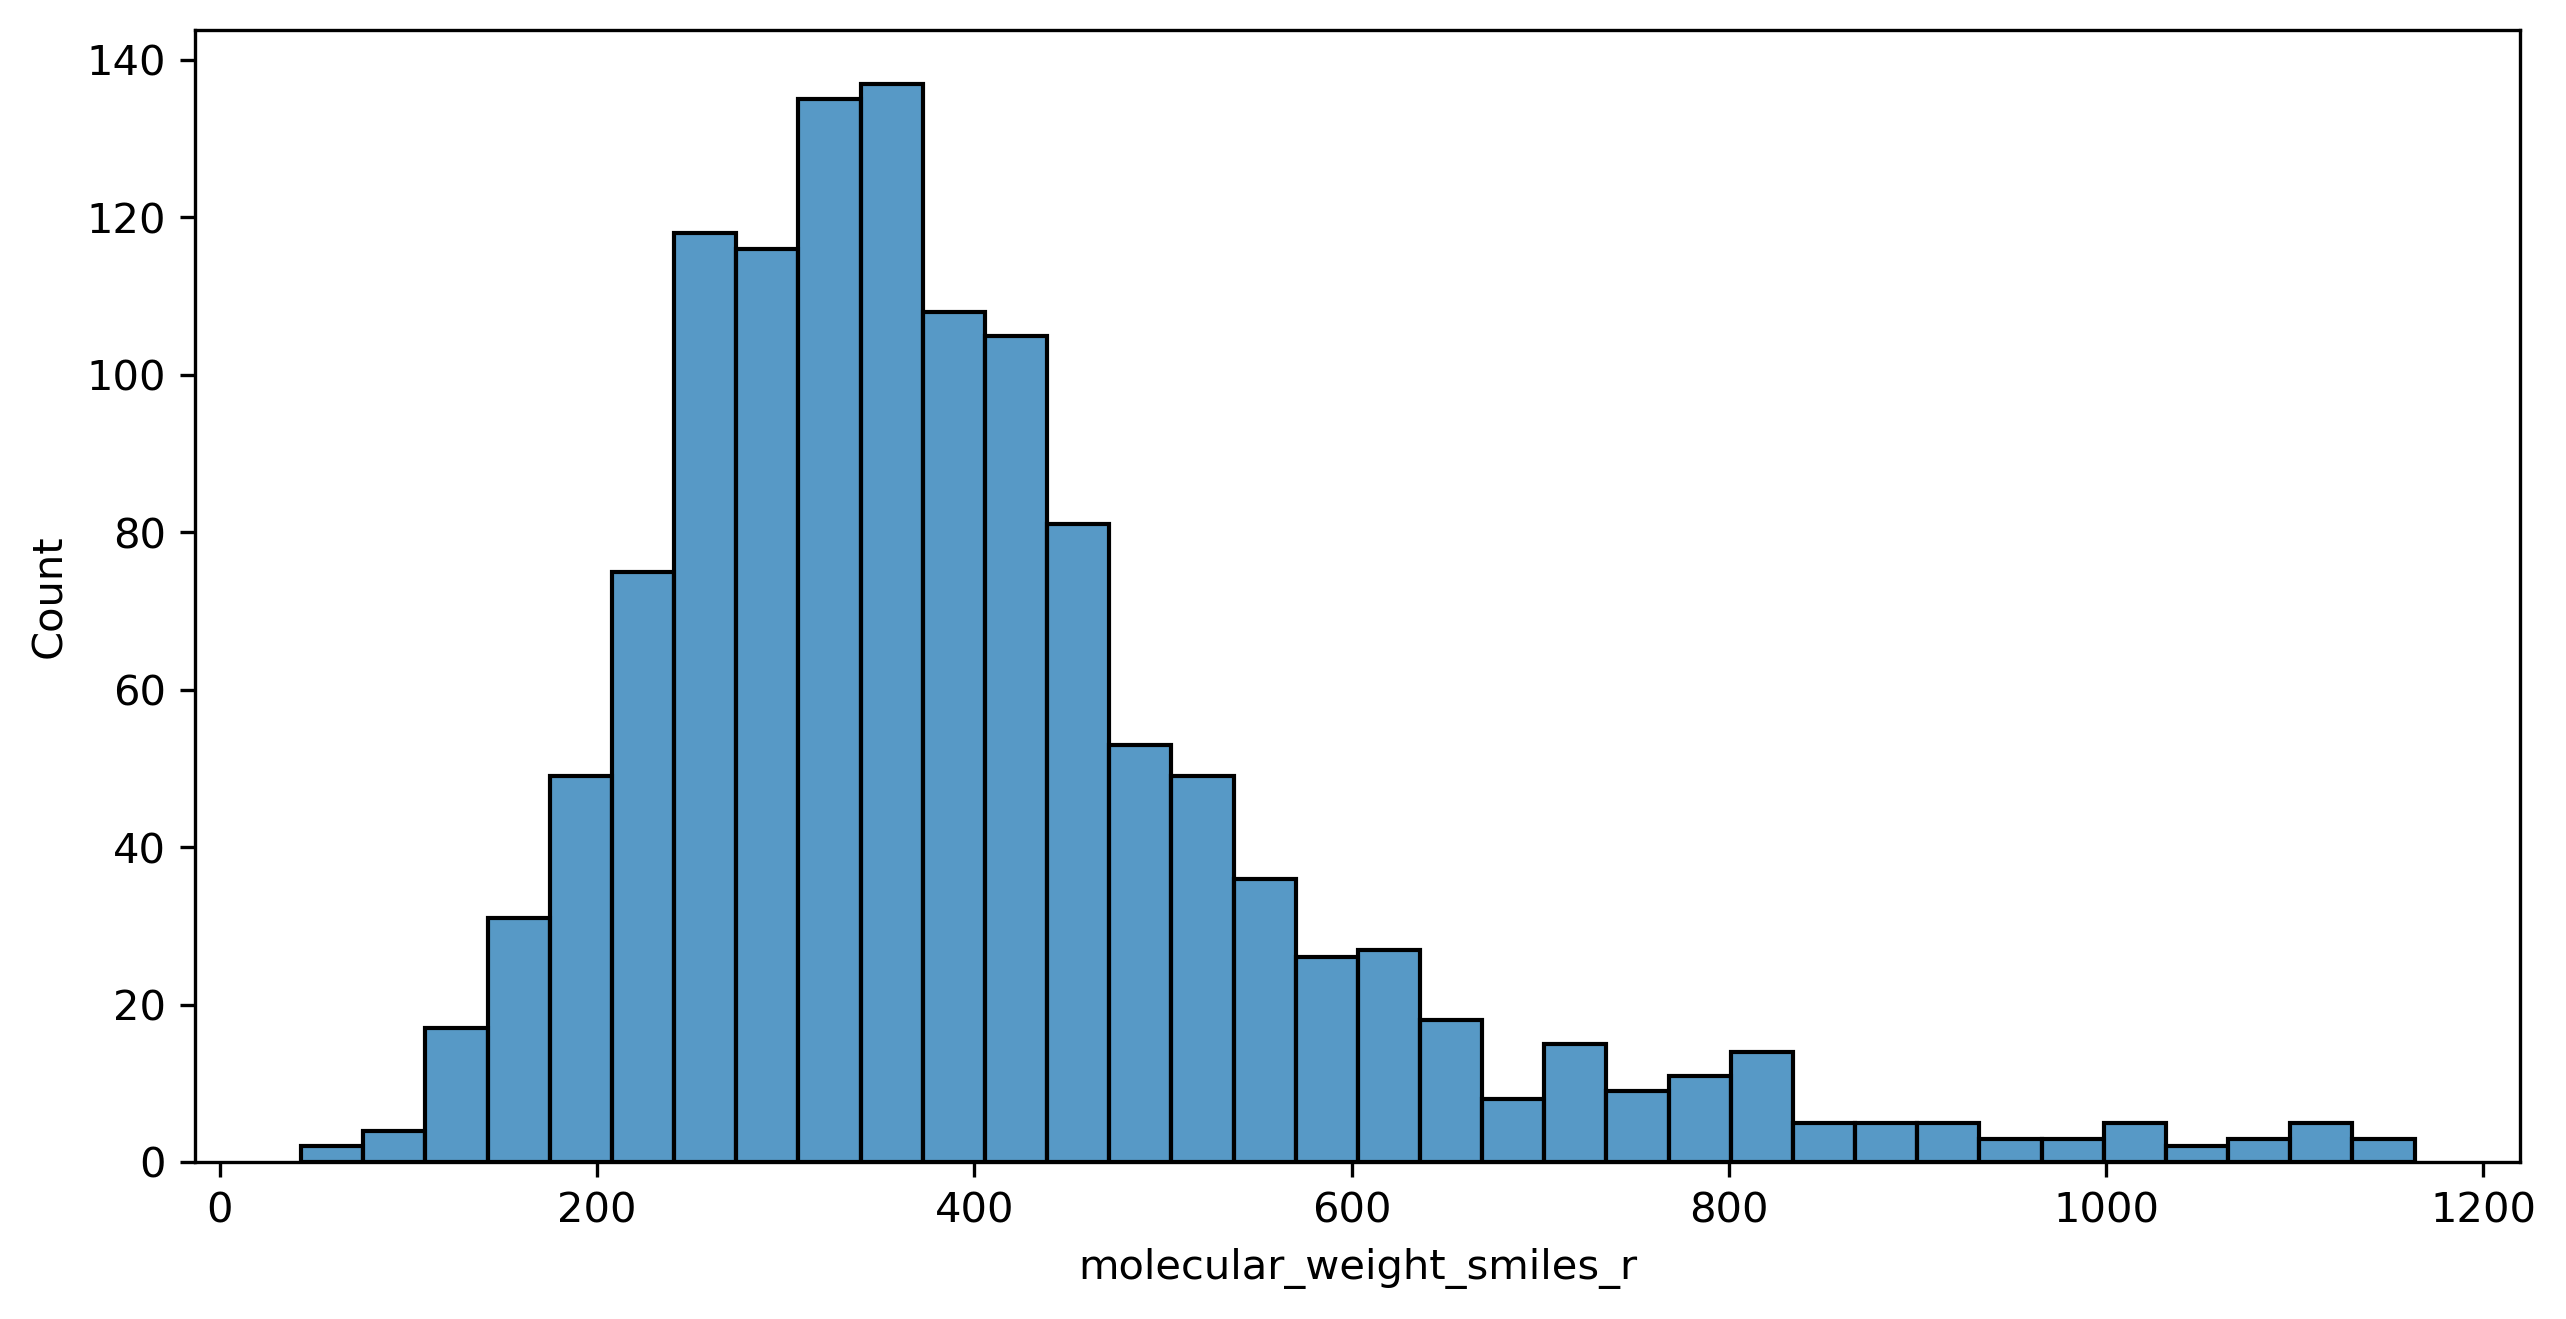

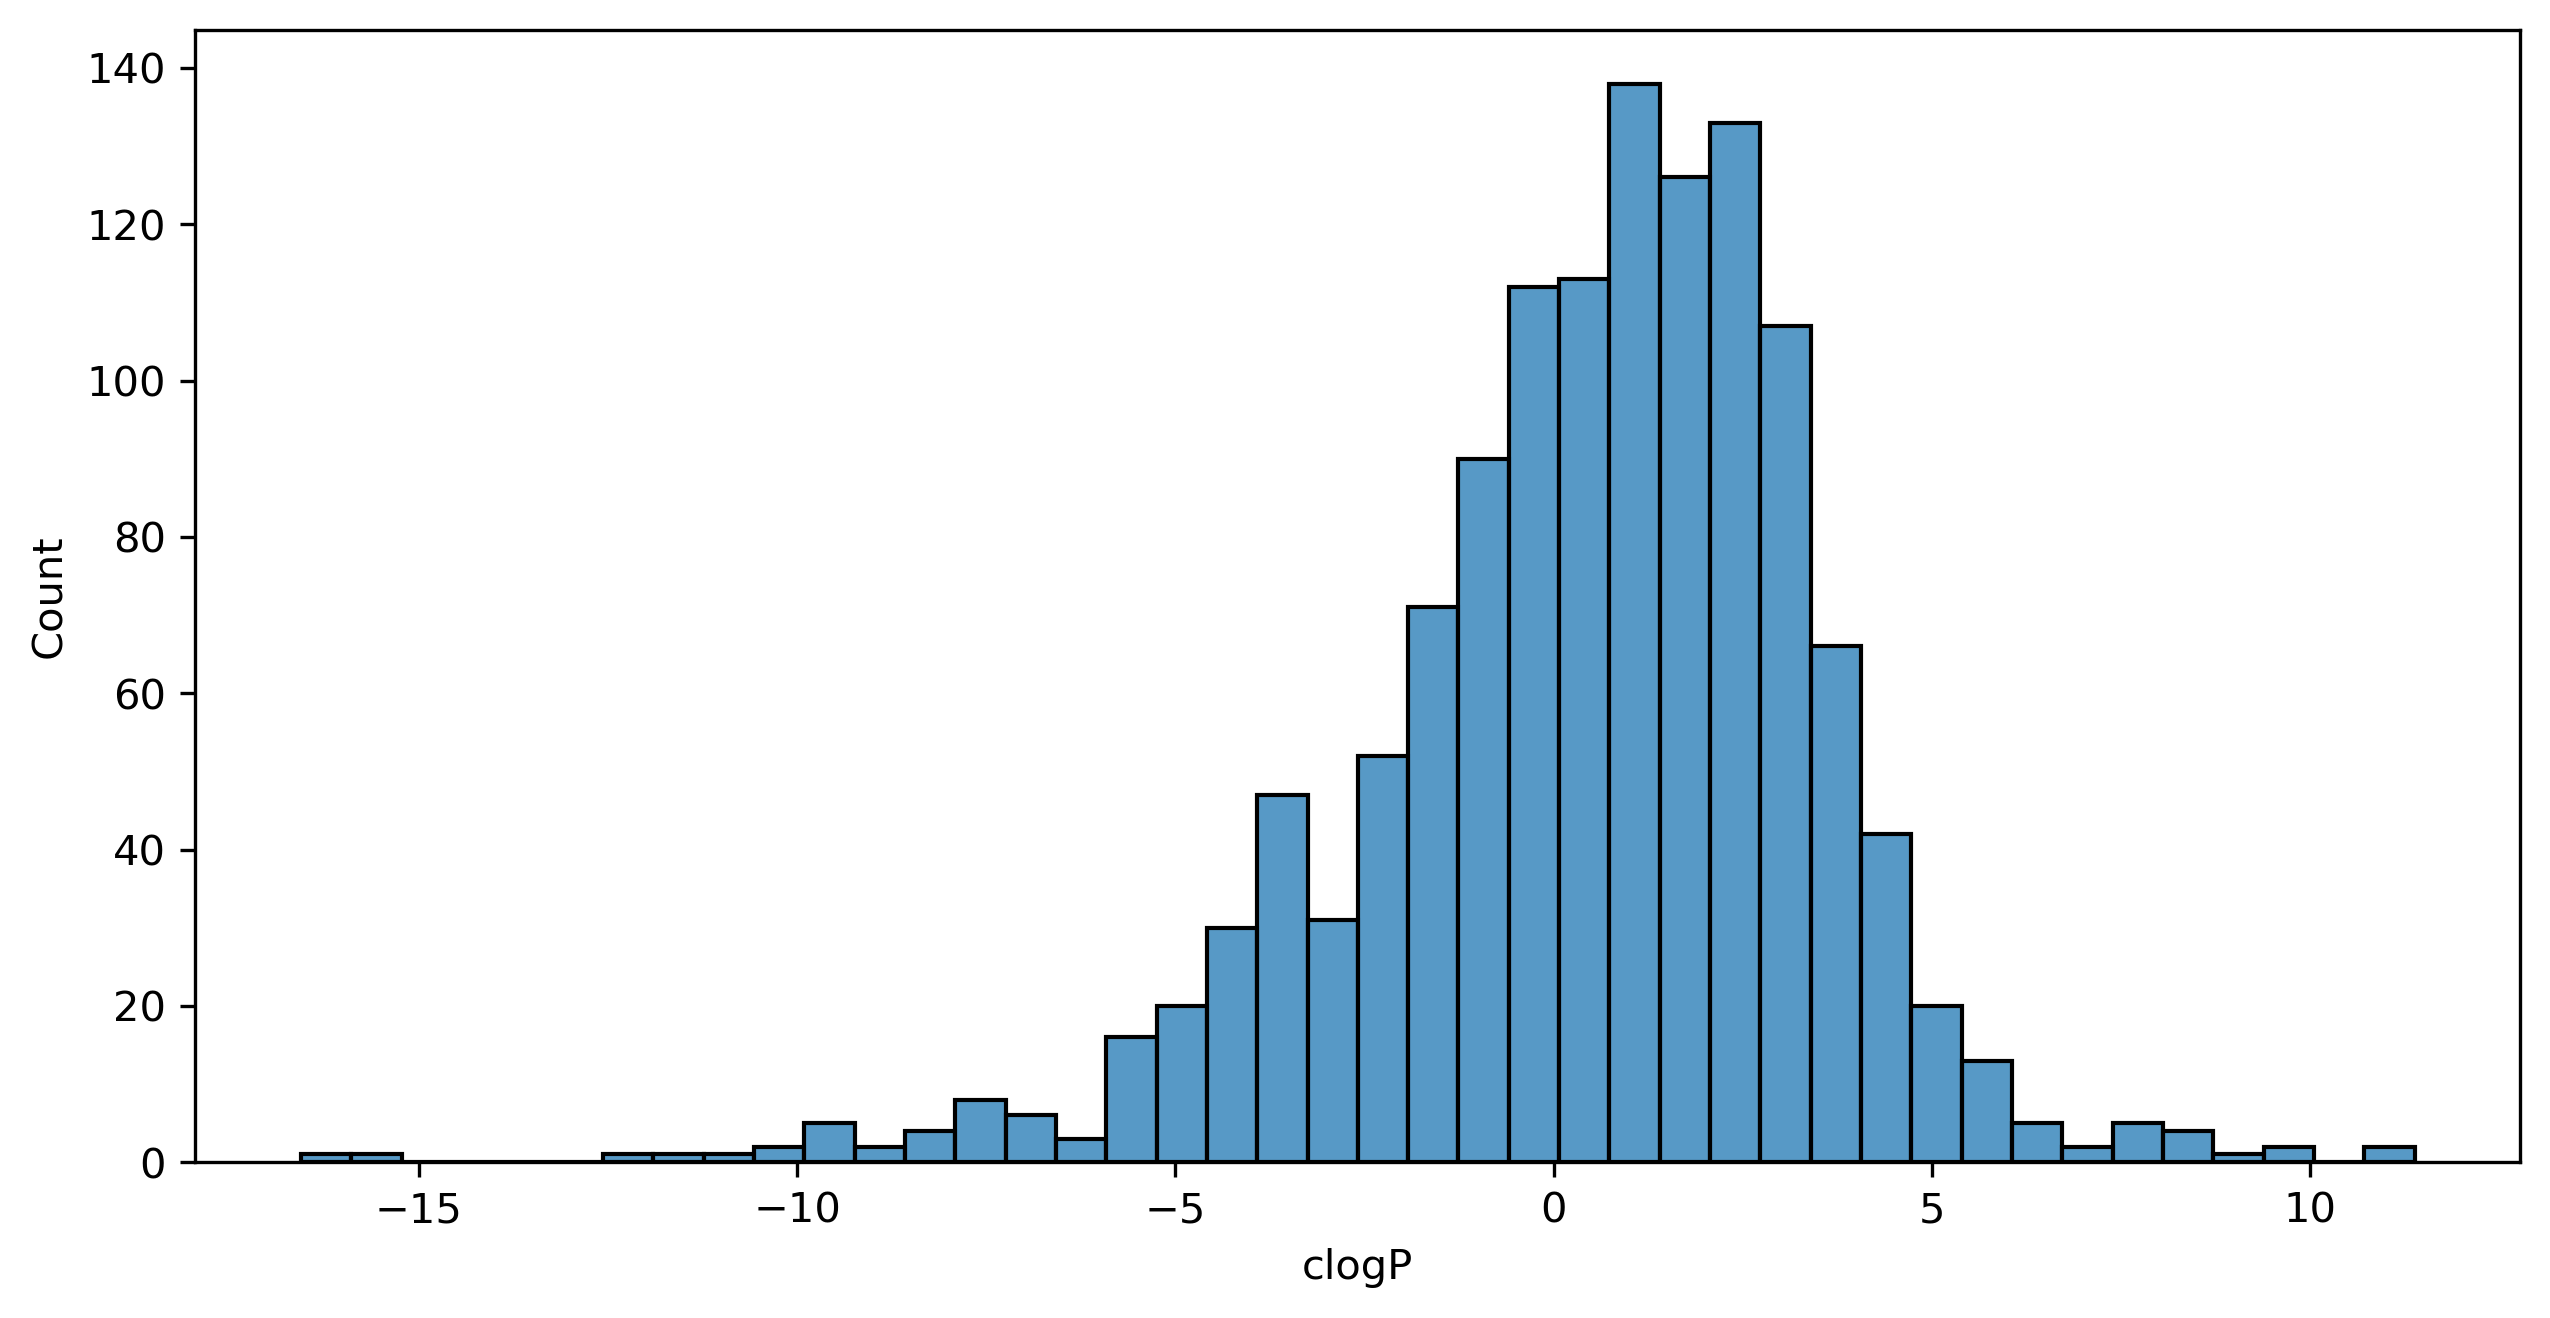

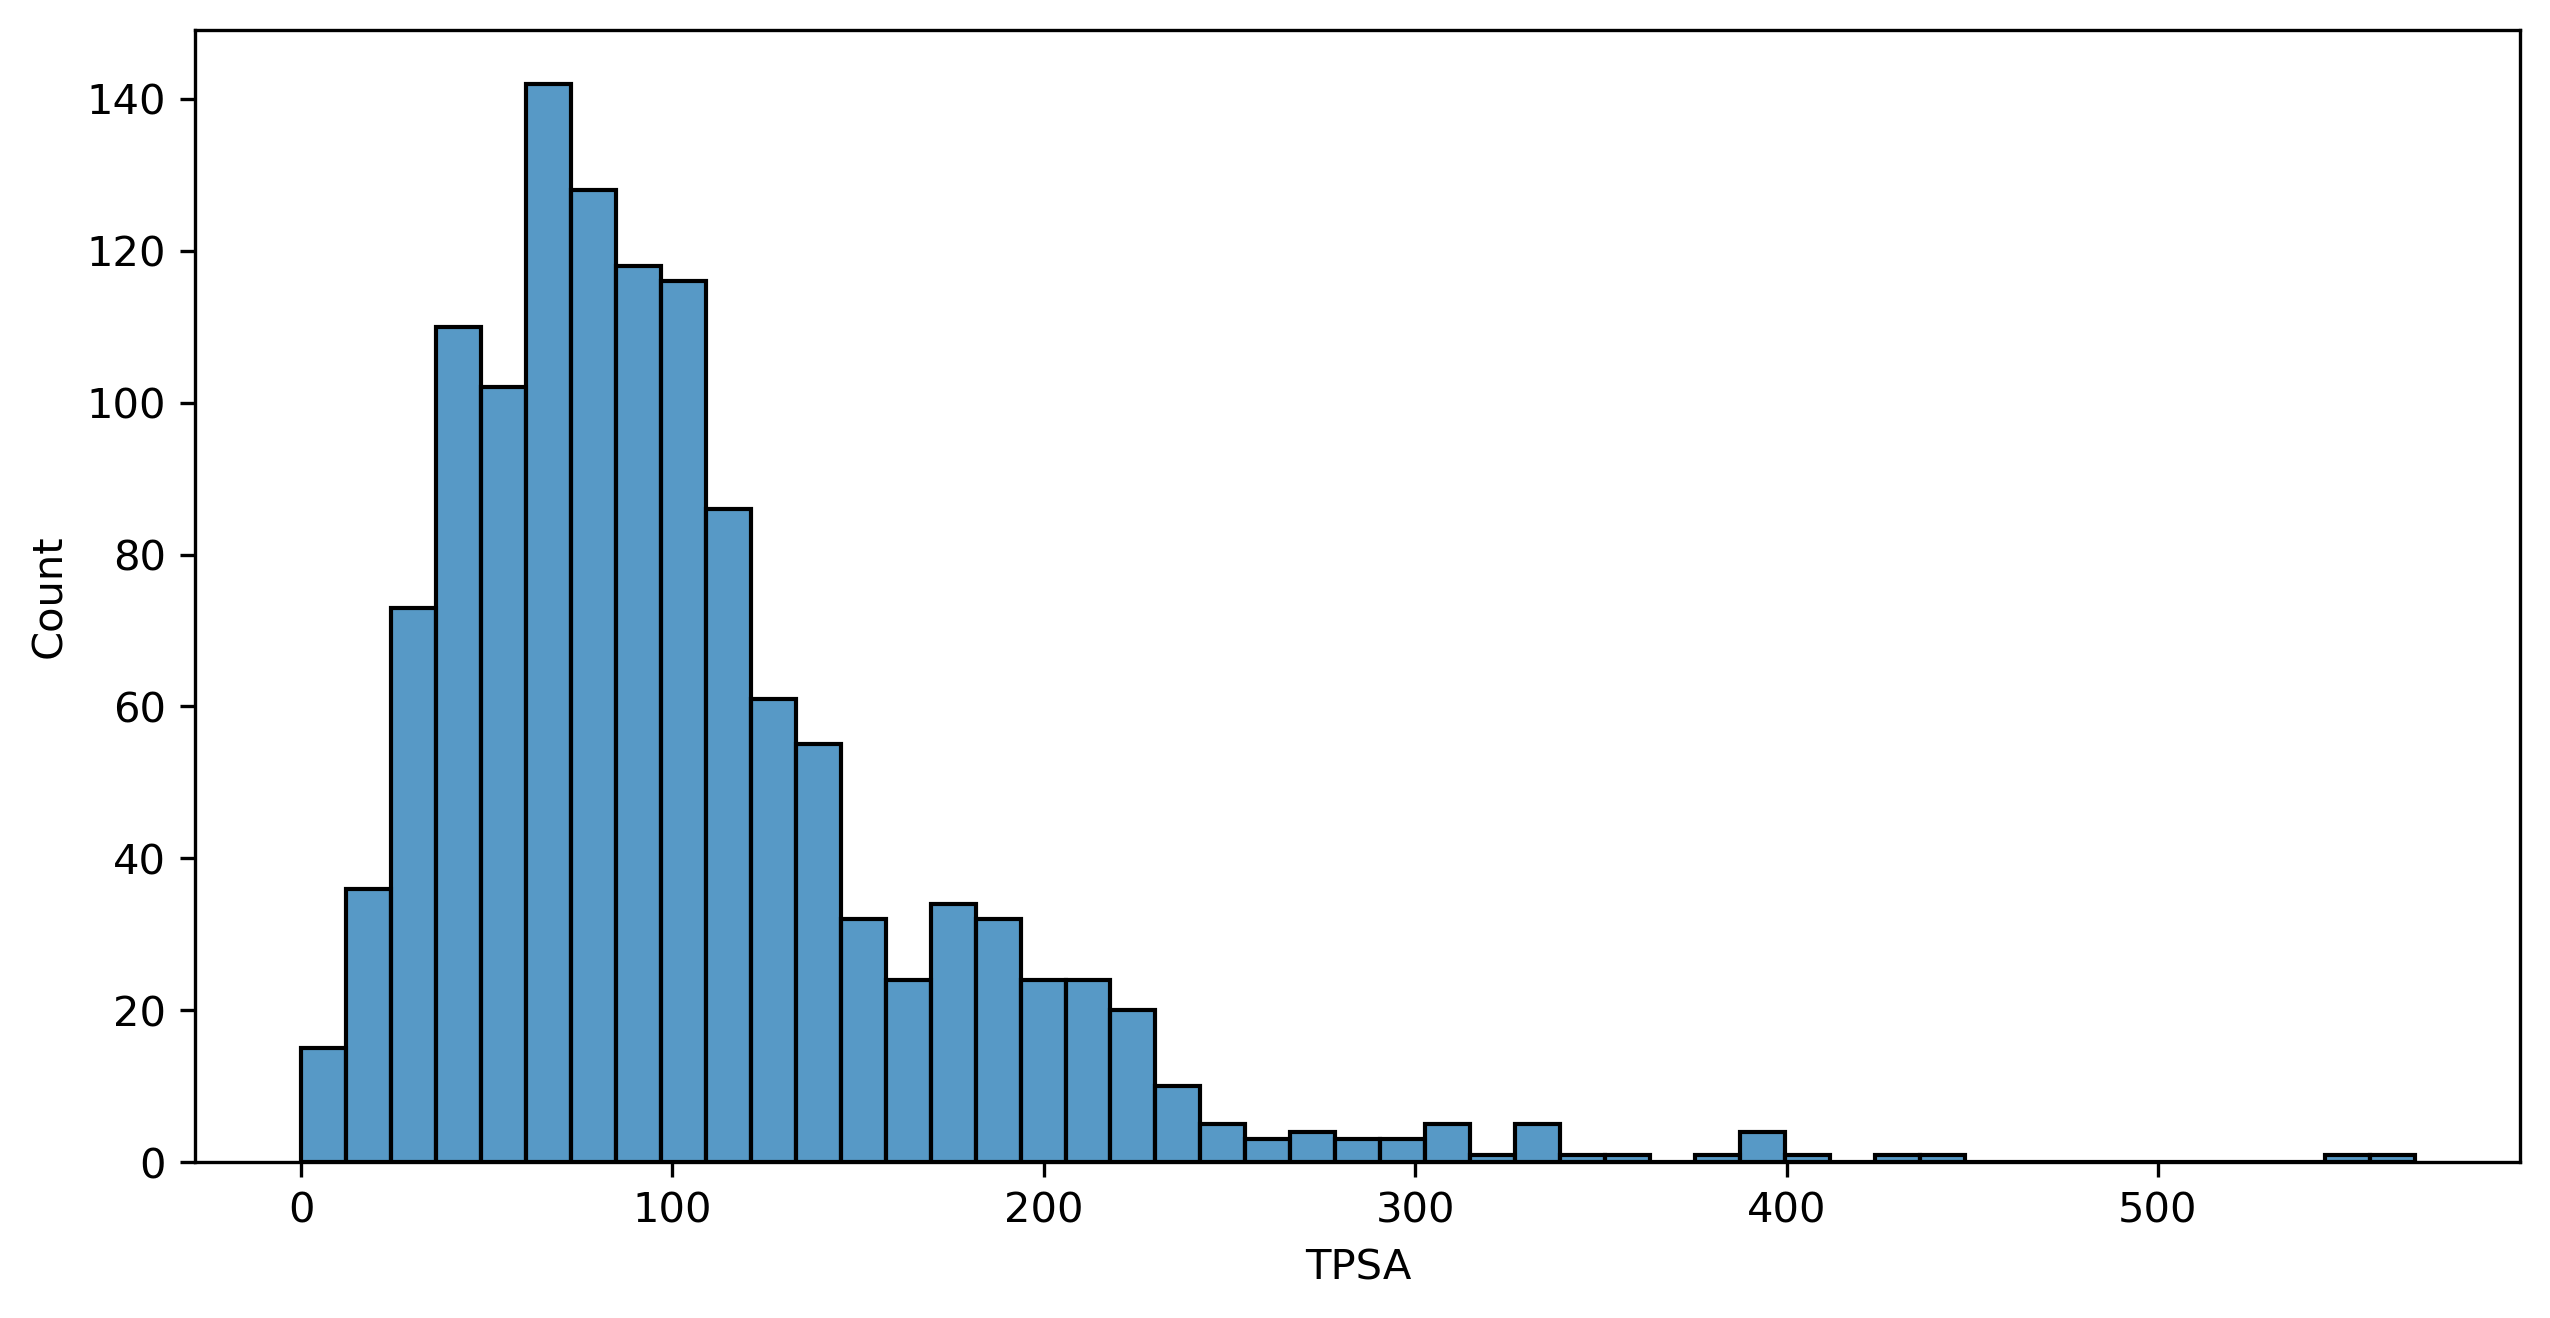

In [17]:
for column in ["molecular_weight_smiles_r","clogP","TPSA"]:
    
    plt.figure(figsize=(10,5), dpi= 300)
    sns.histplot(data=human_lombardo, x=column)
    plt.show()

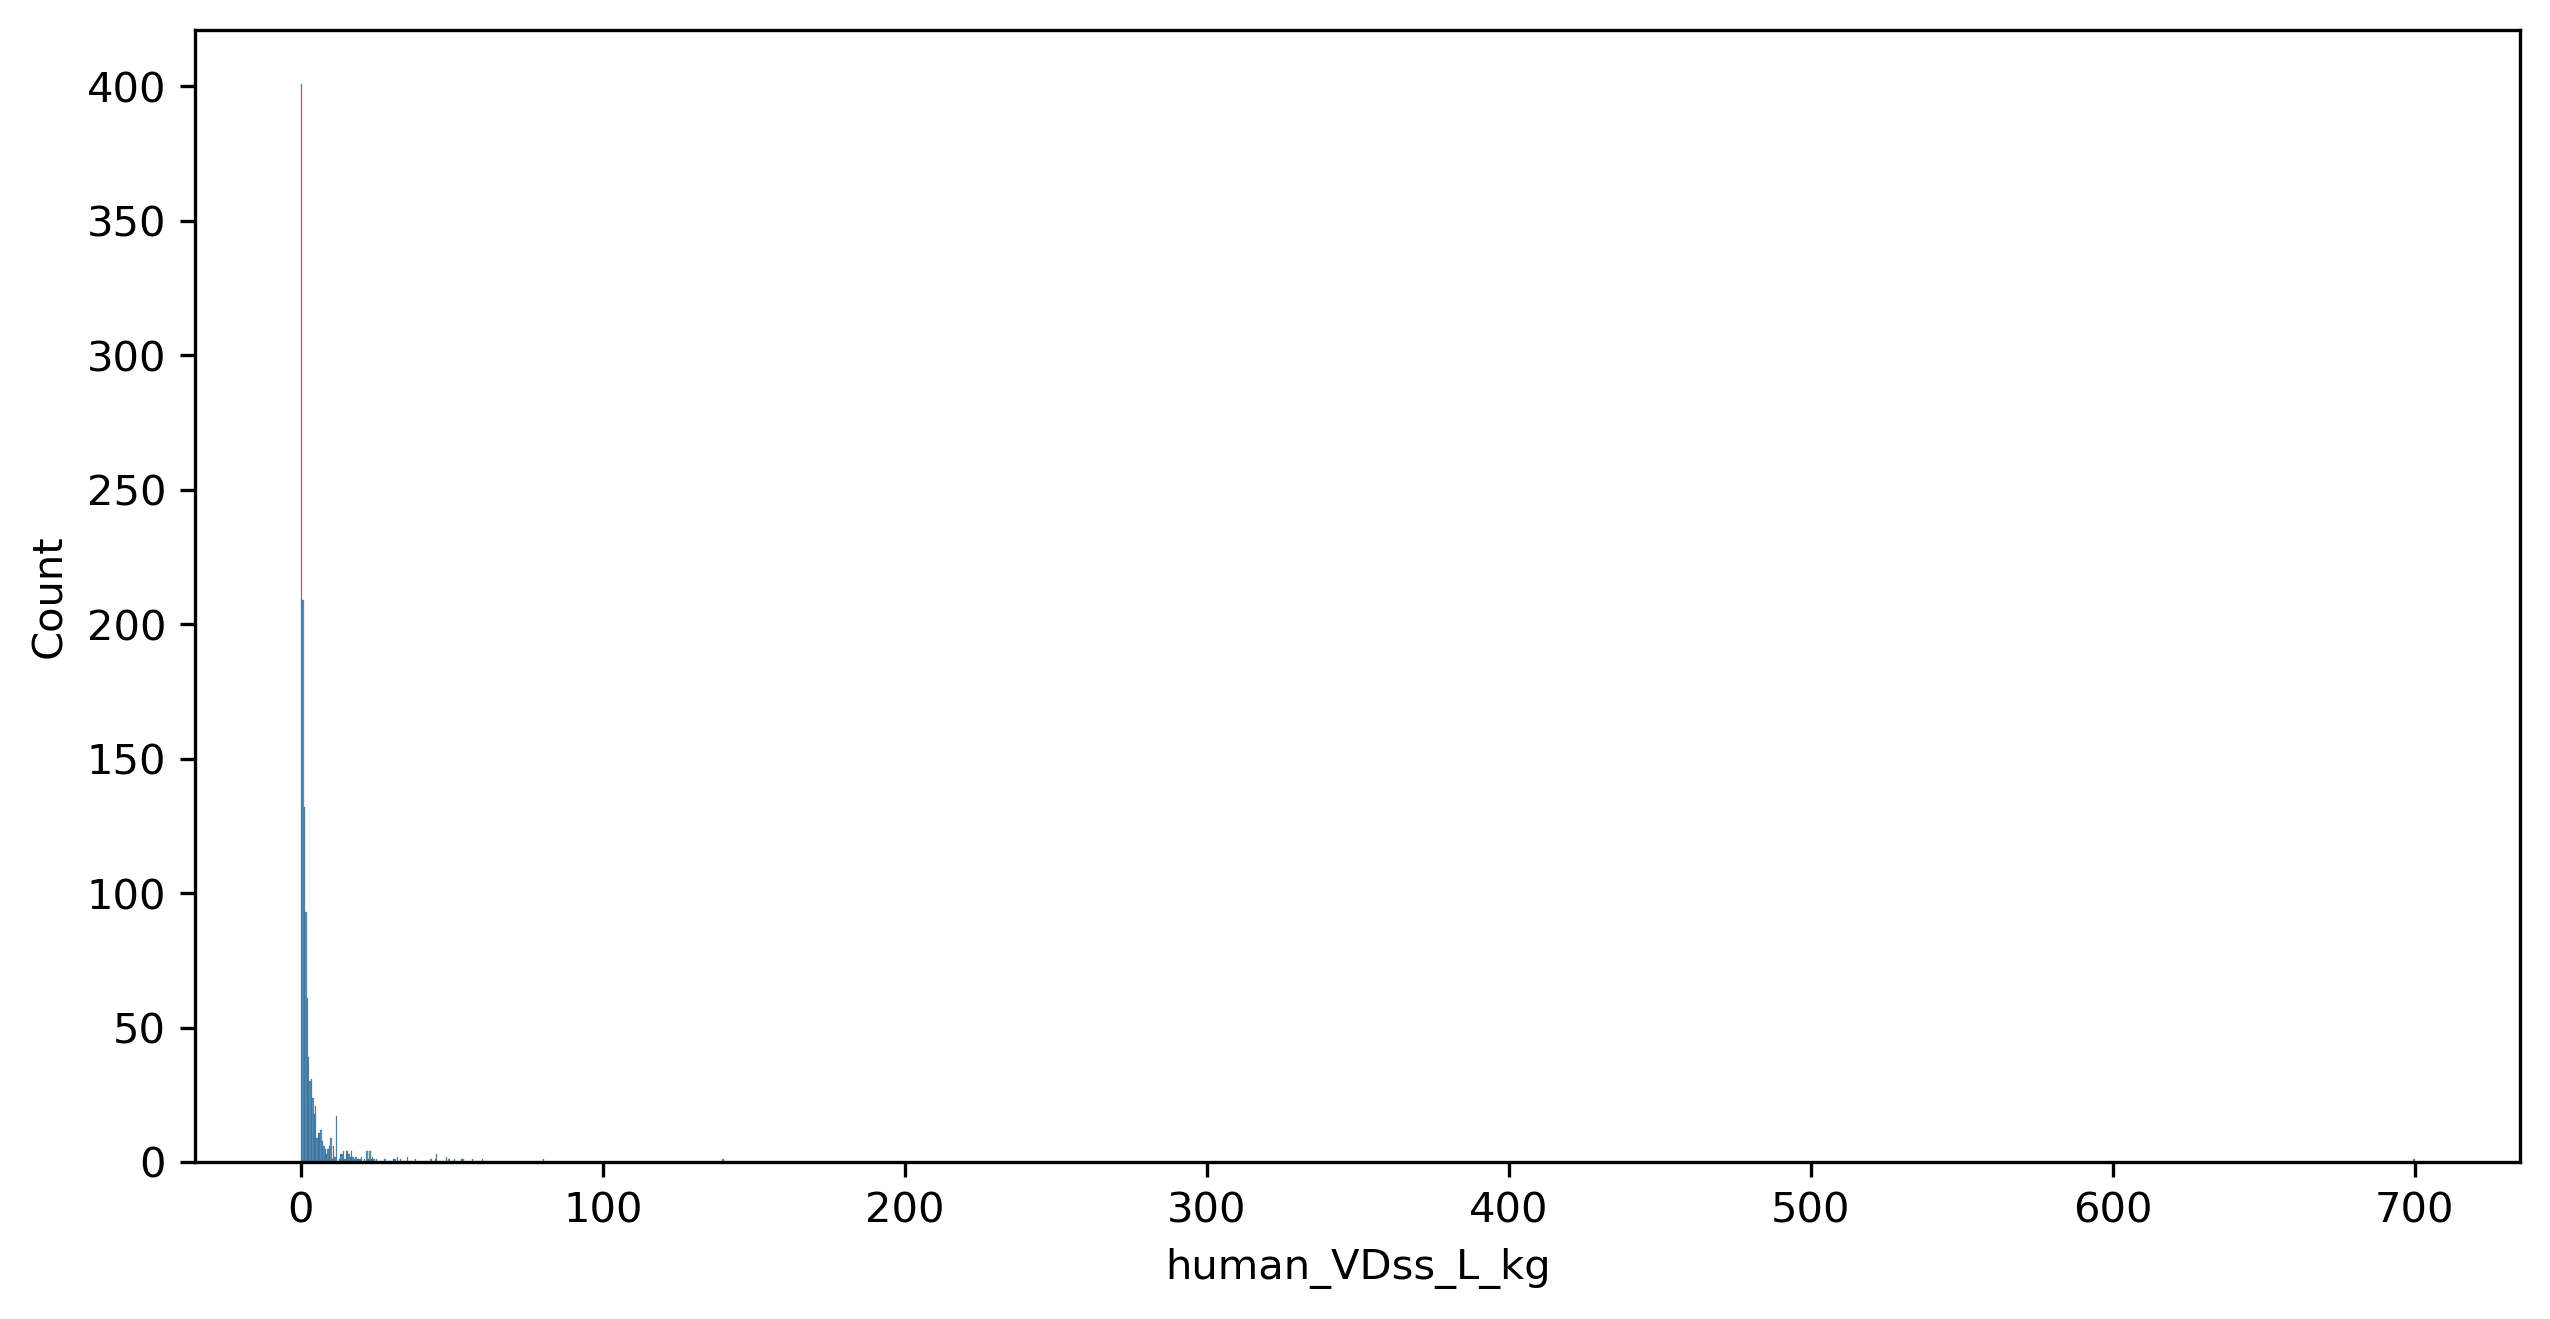

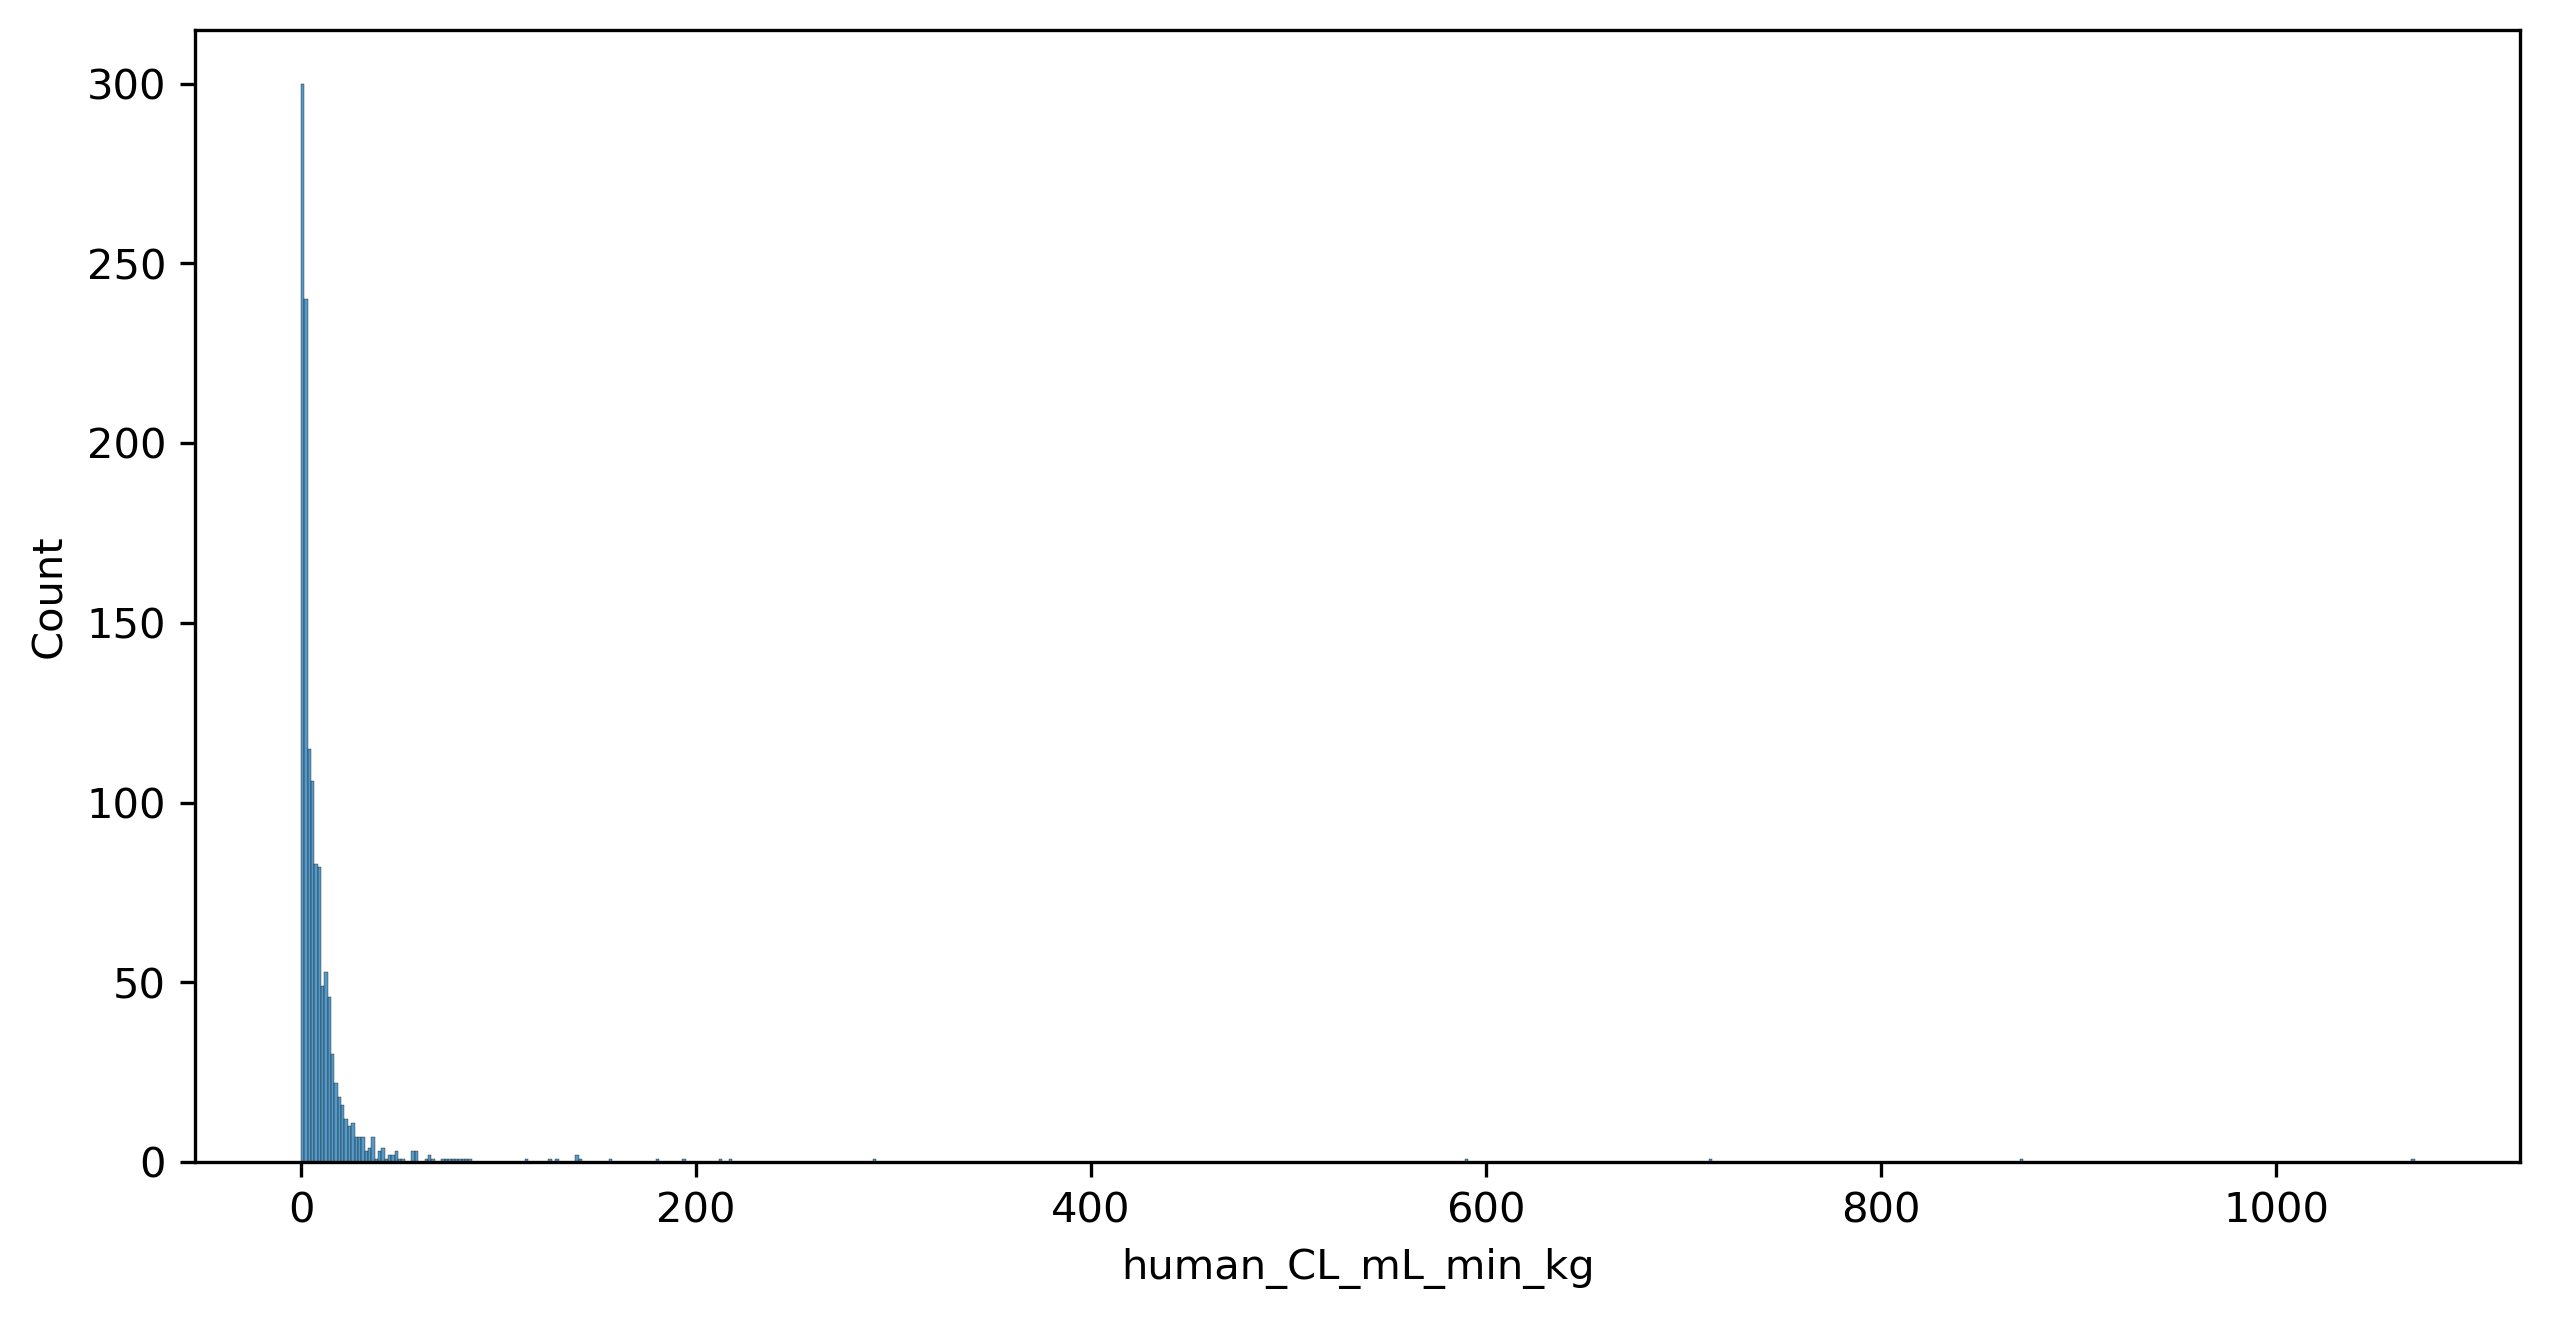

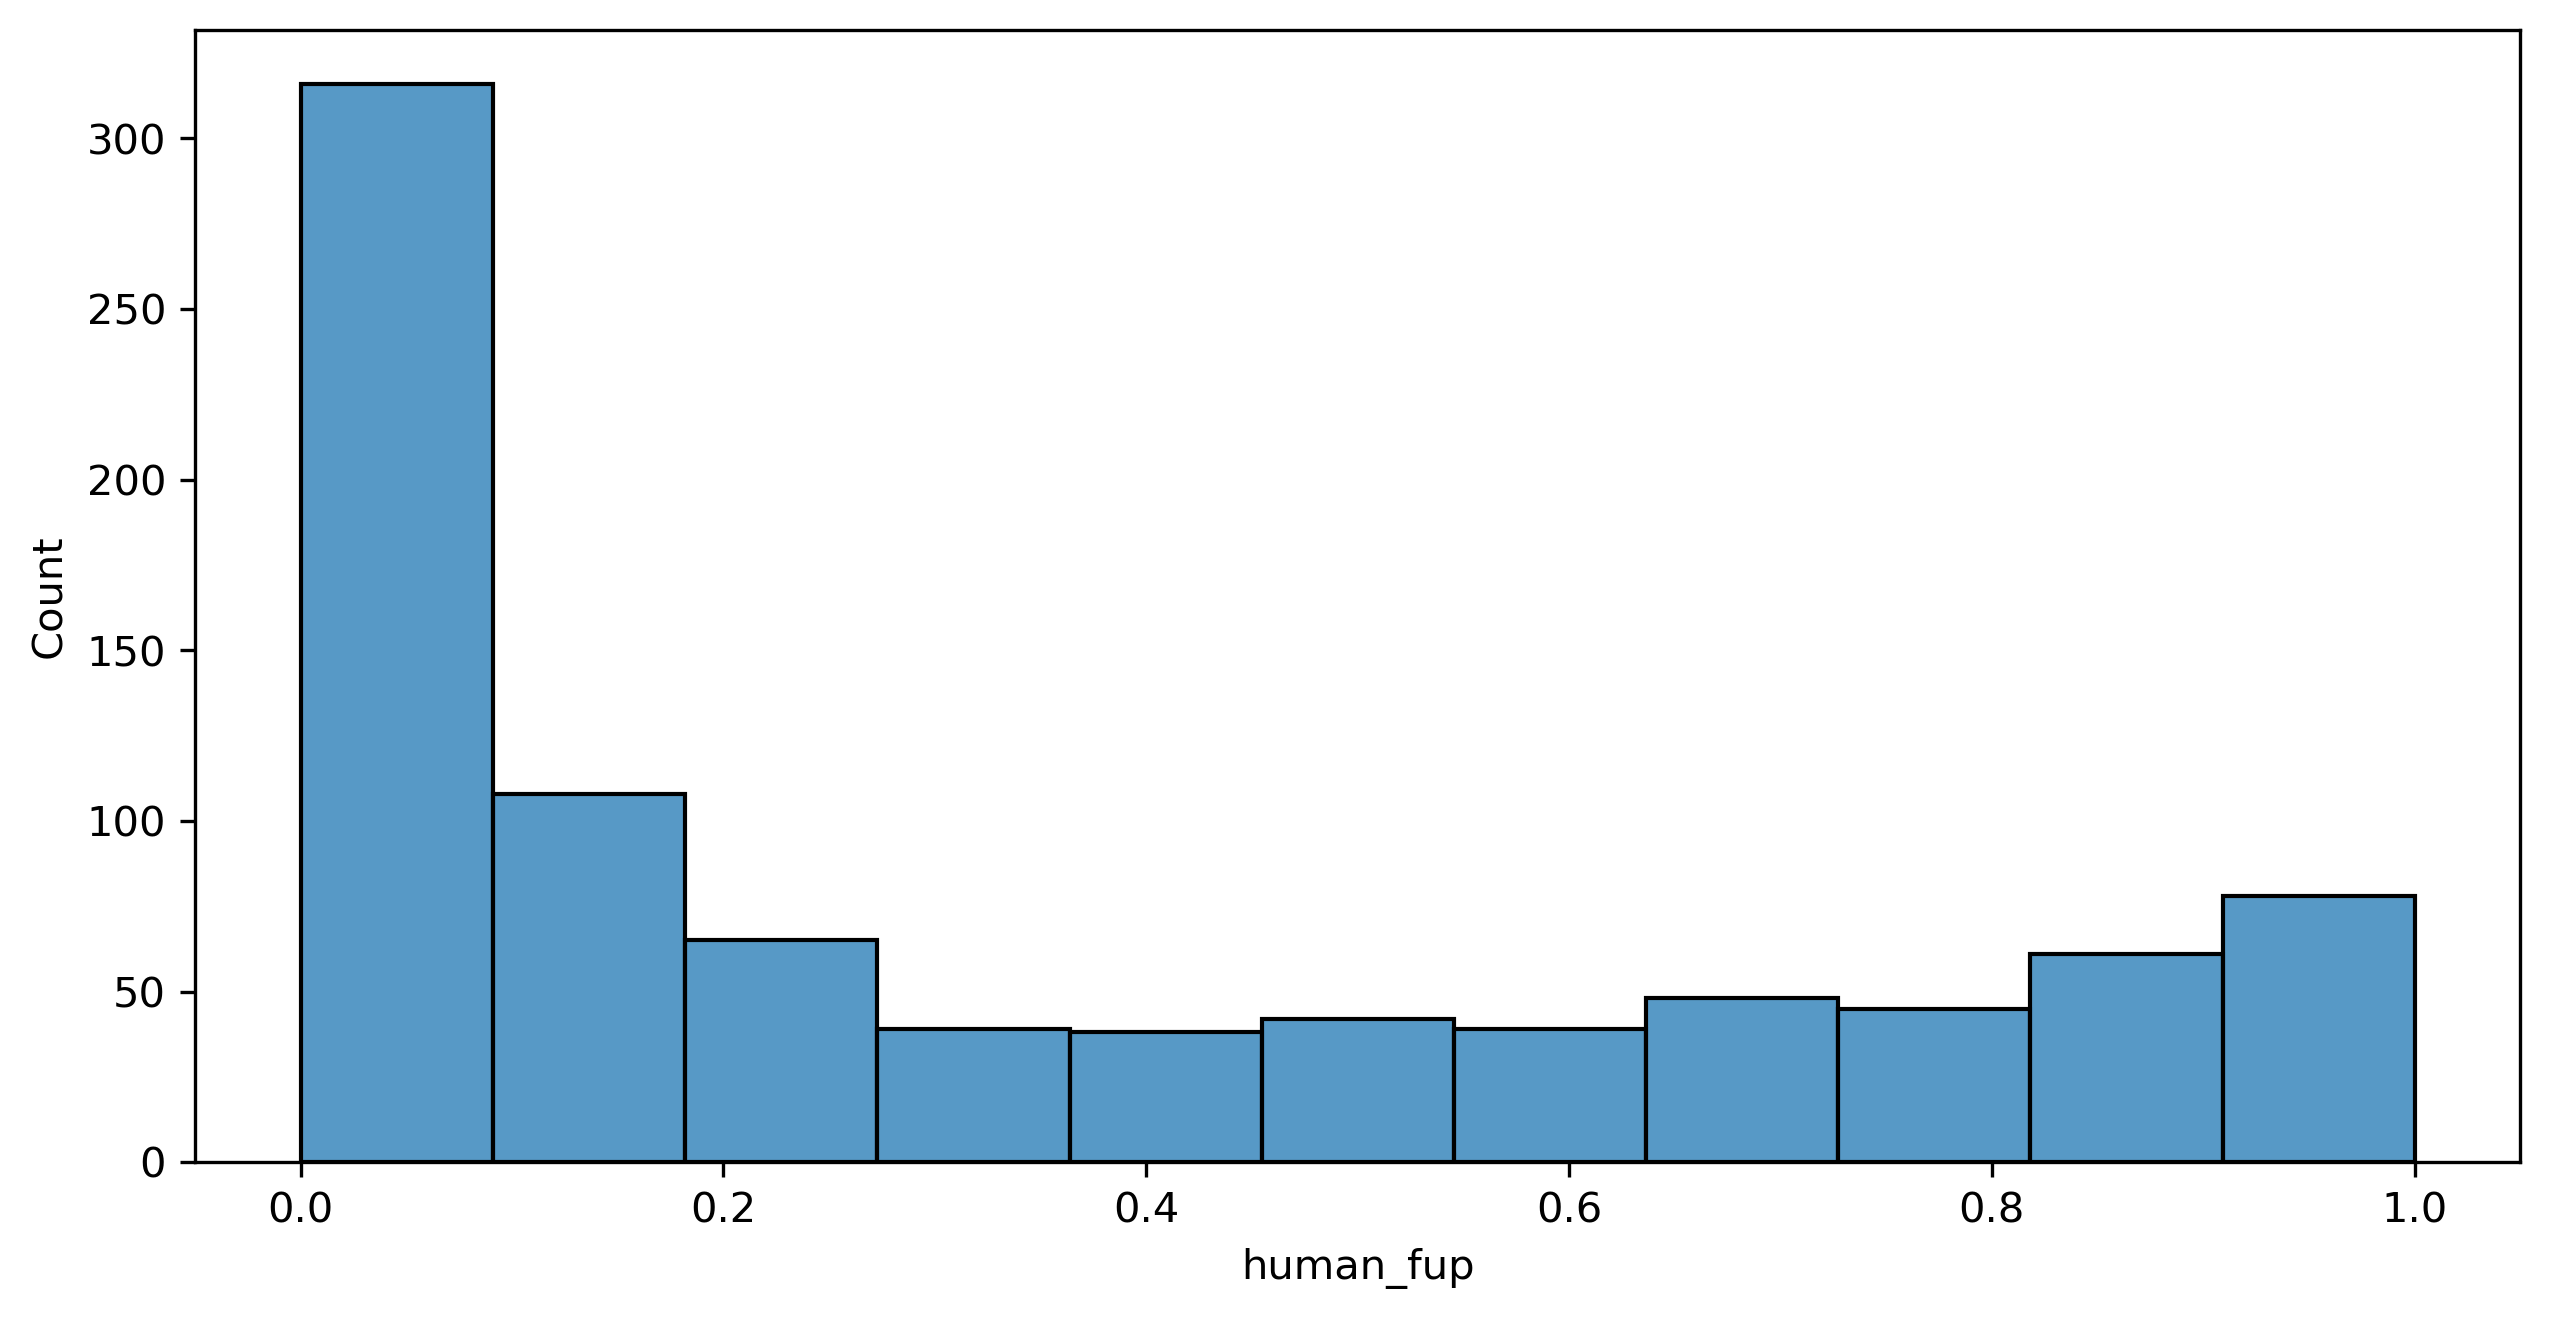

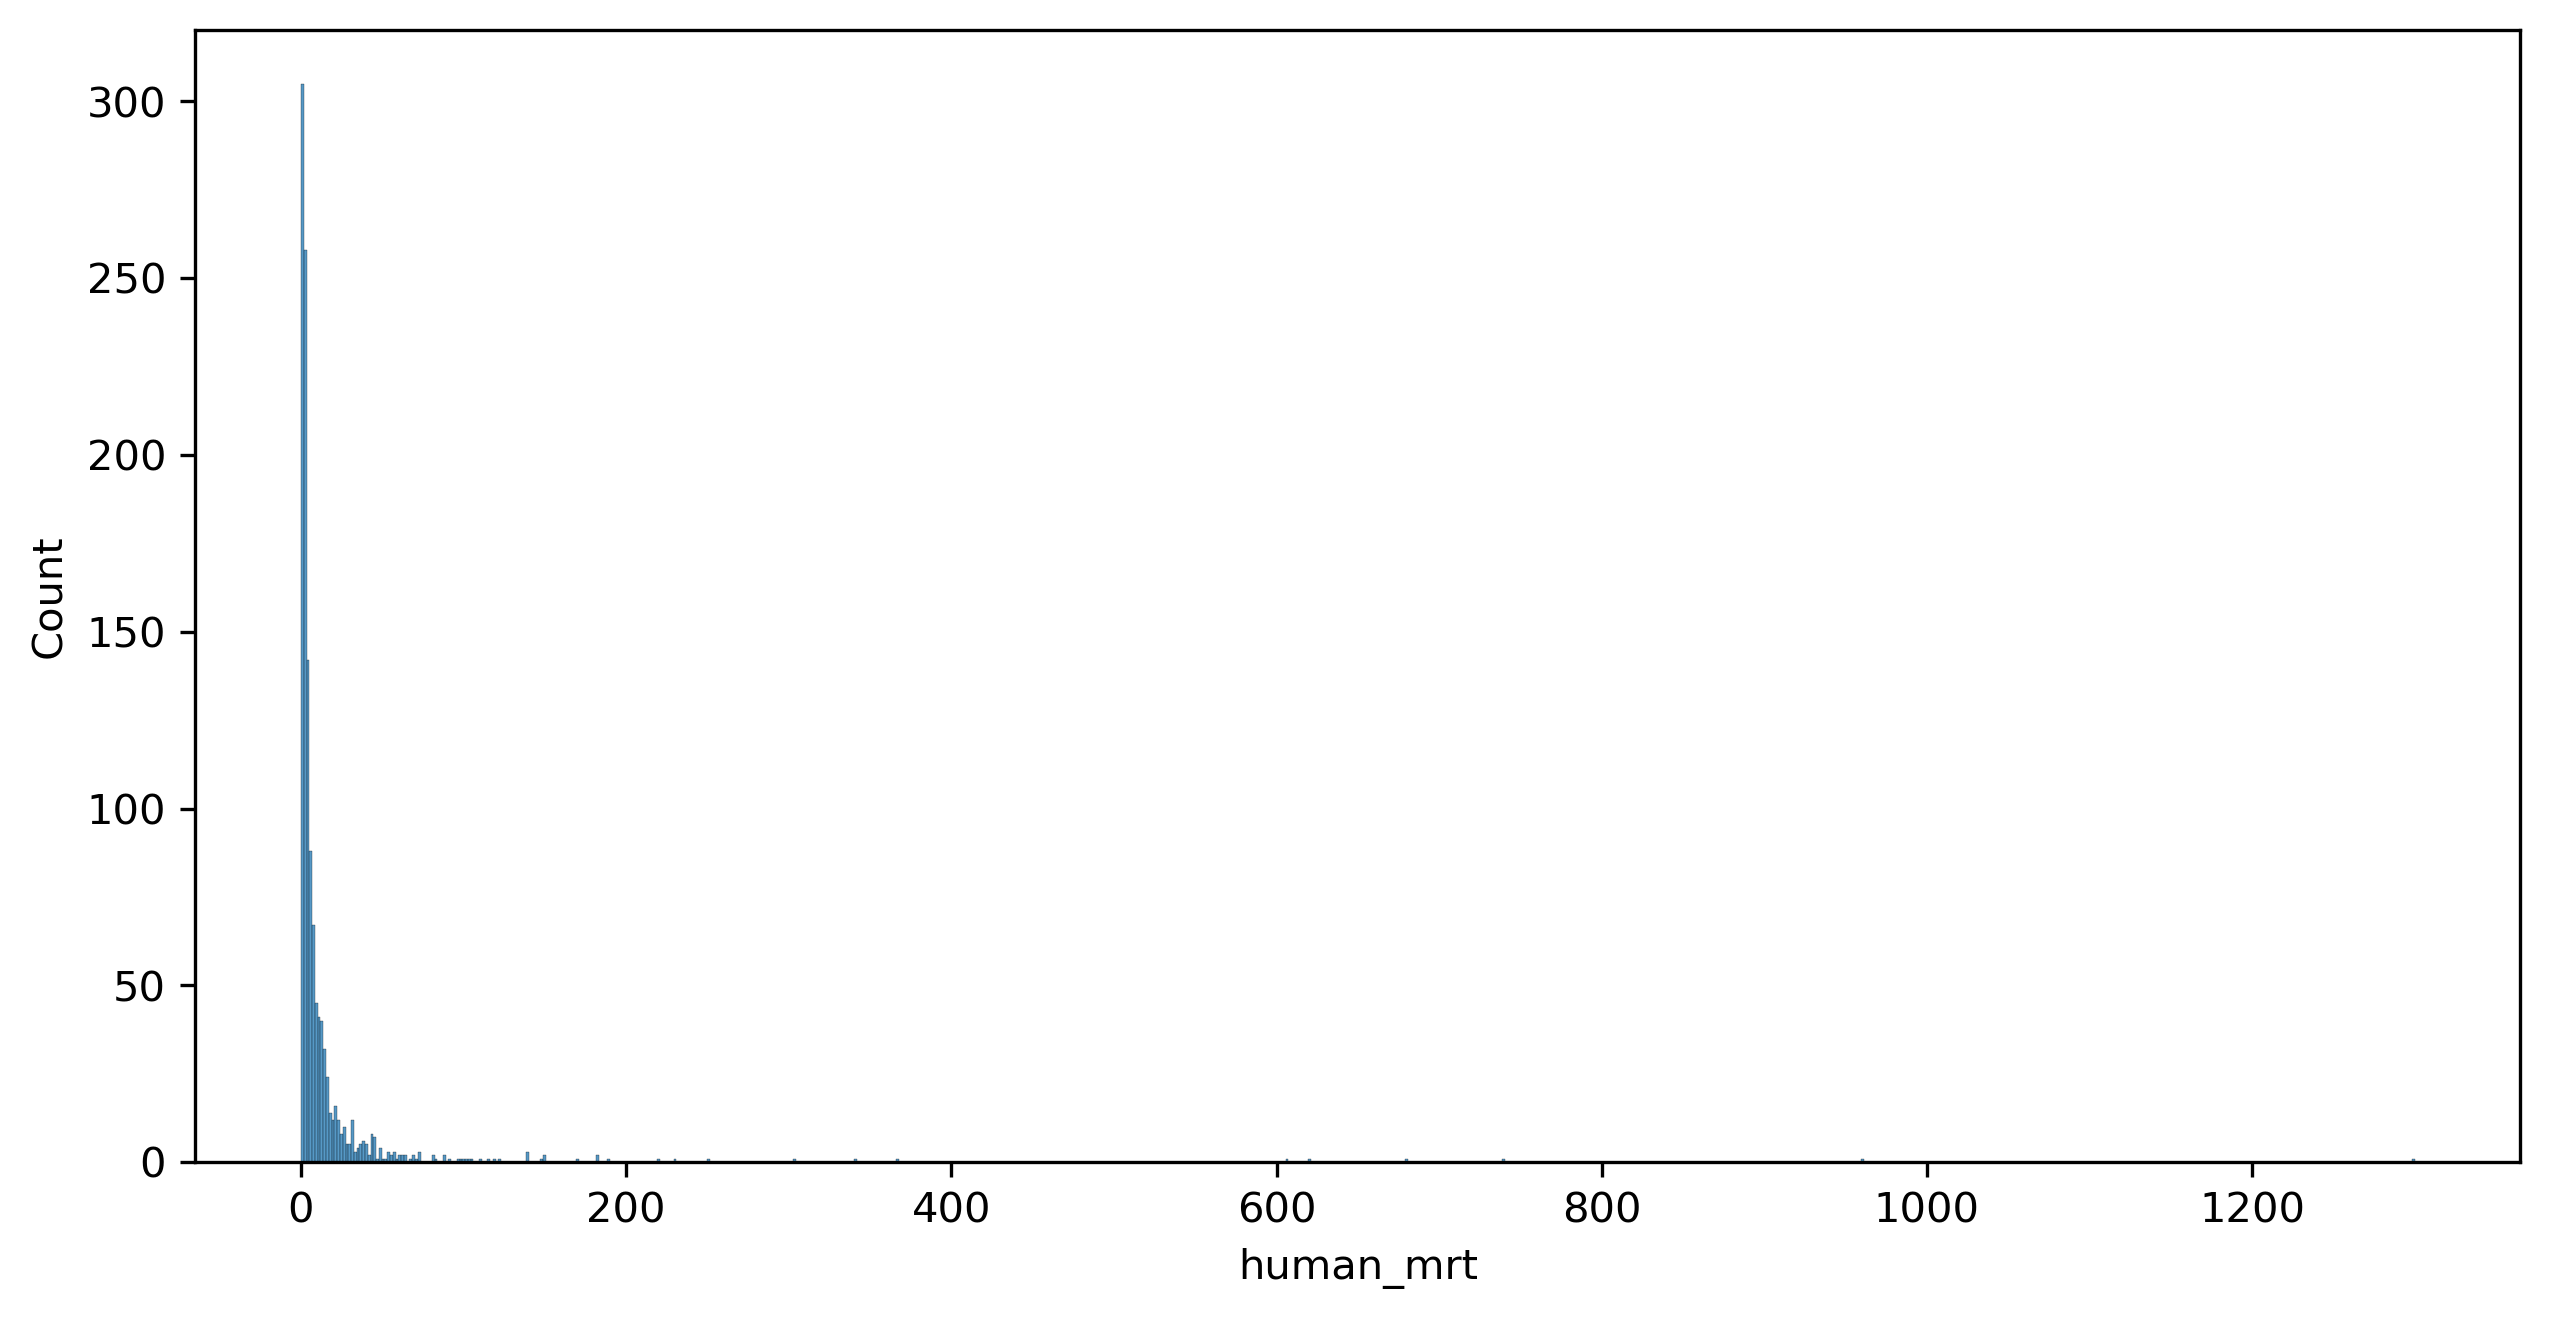

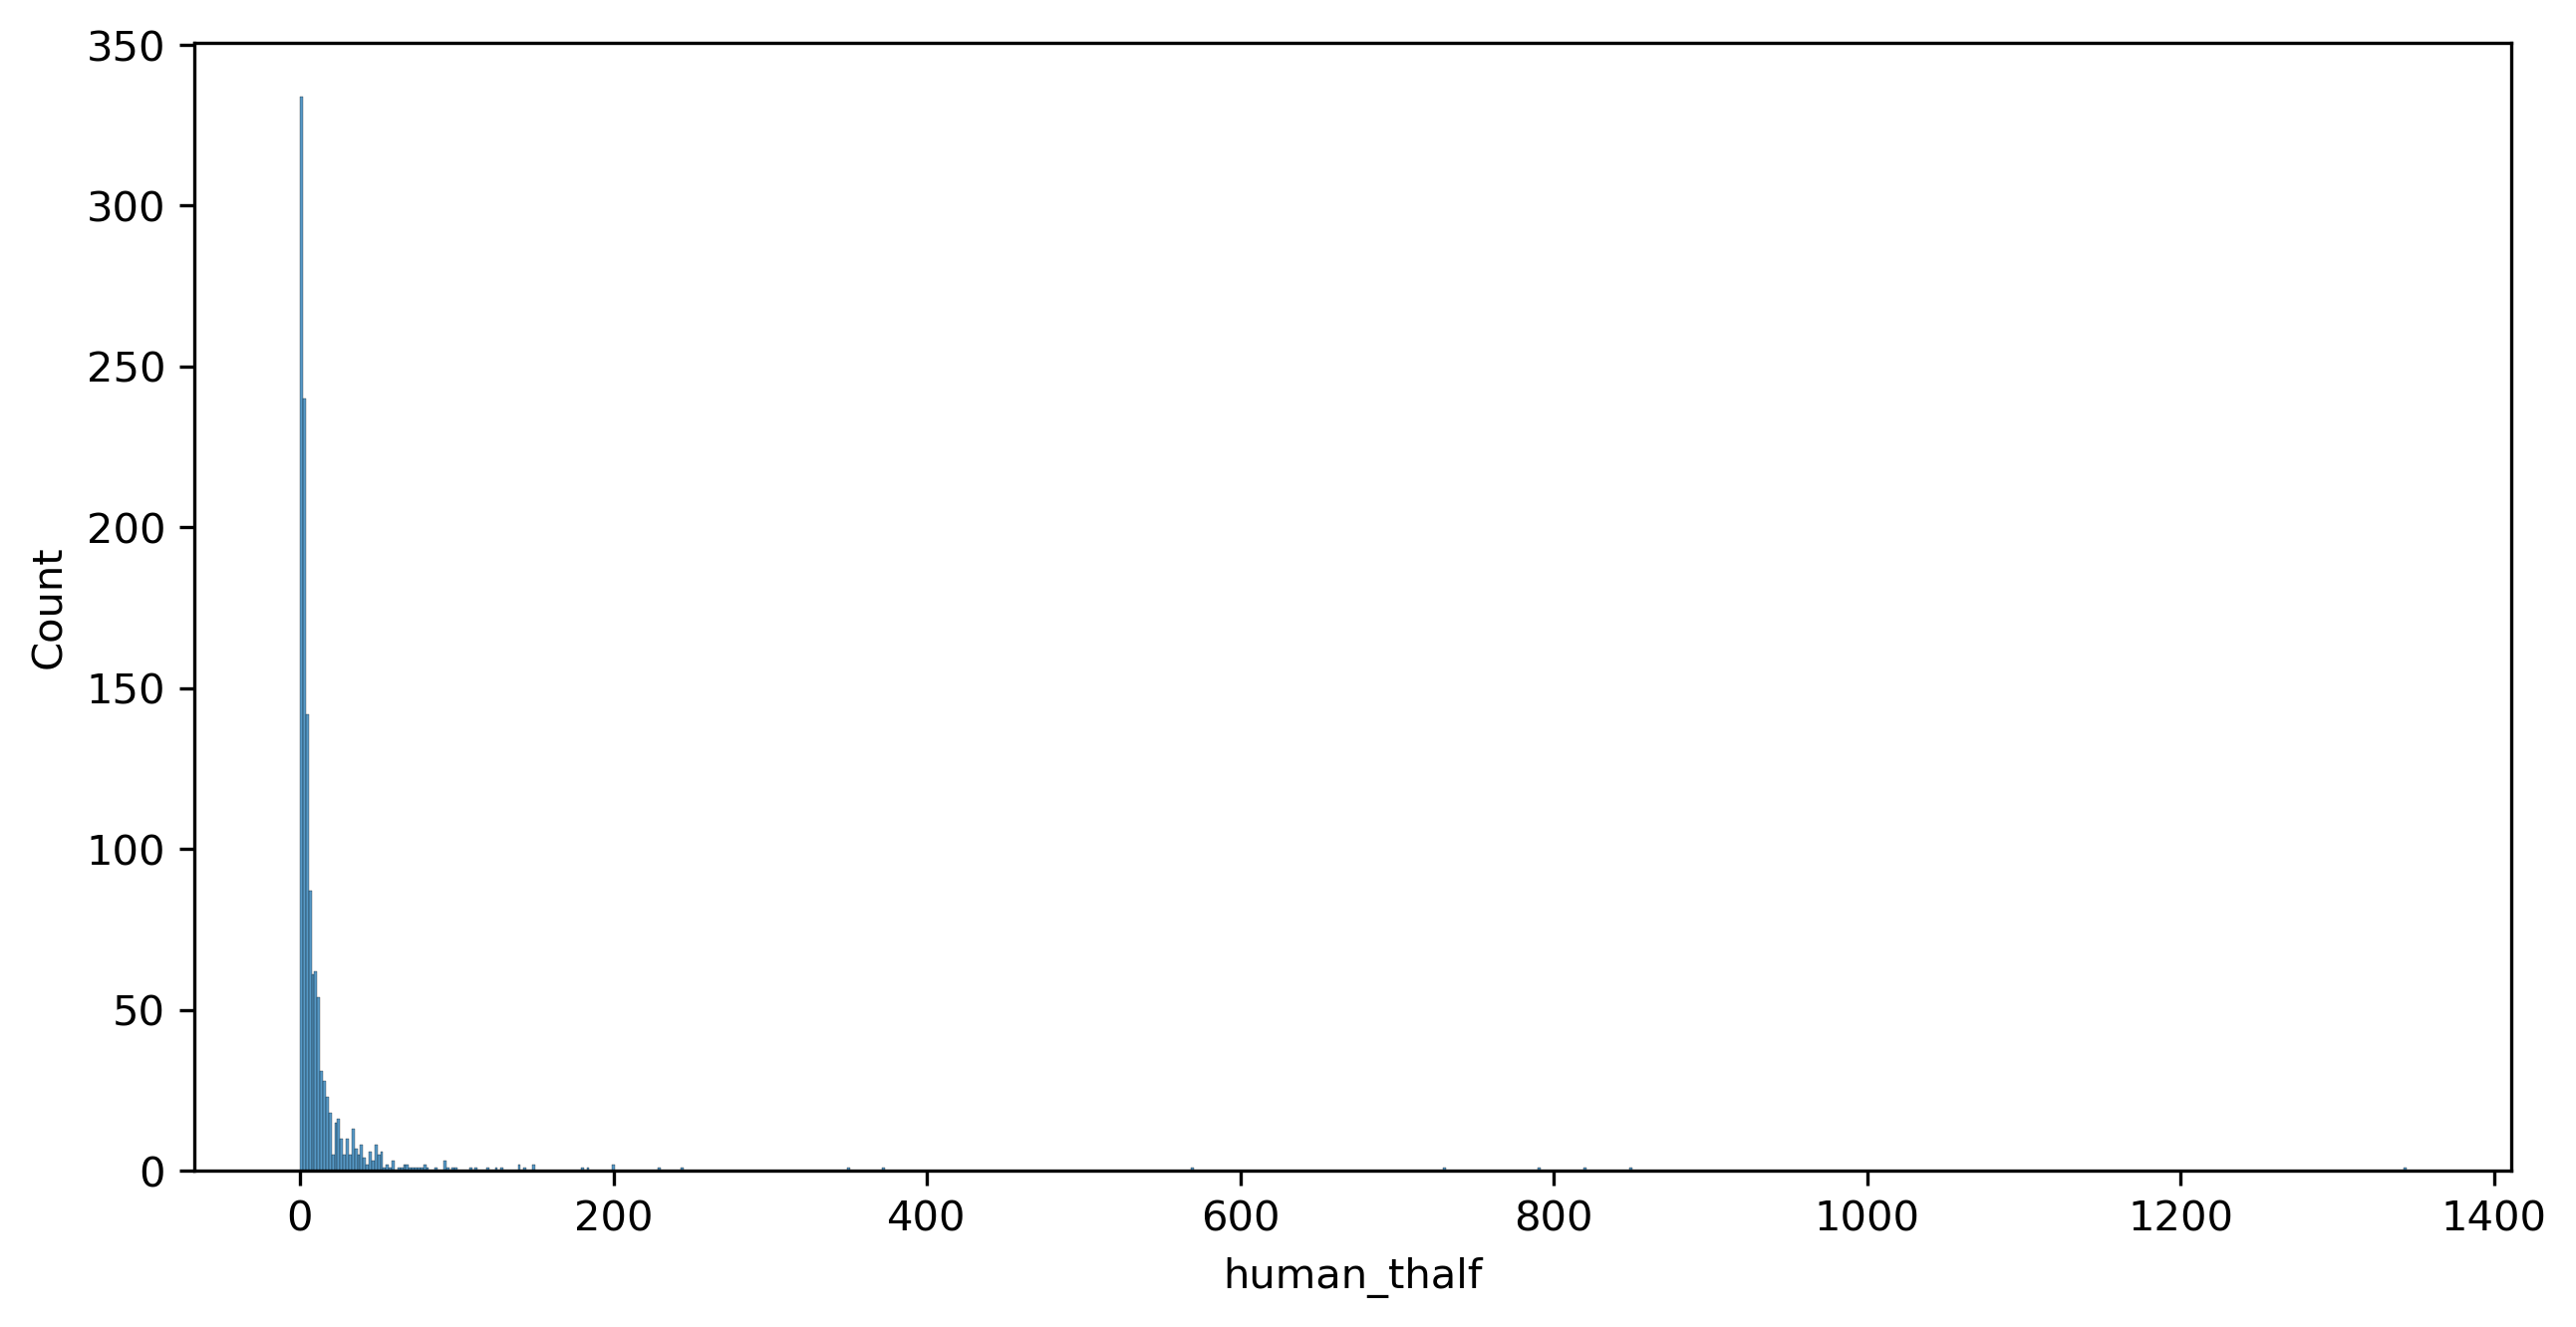

In [18]:
for column in ['human_VDss_L_kg', 'human_CL_mL_min_kg', 'human_fup',
       'human_mrt', 'human_thalf']:
    
    temp=human_lombardo.dropna(subset=[column])    
    plt.figure(figsize=(10,5), dpi= 300)
    sns.histplot(data=temp, x=column)
    plt.show()

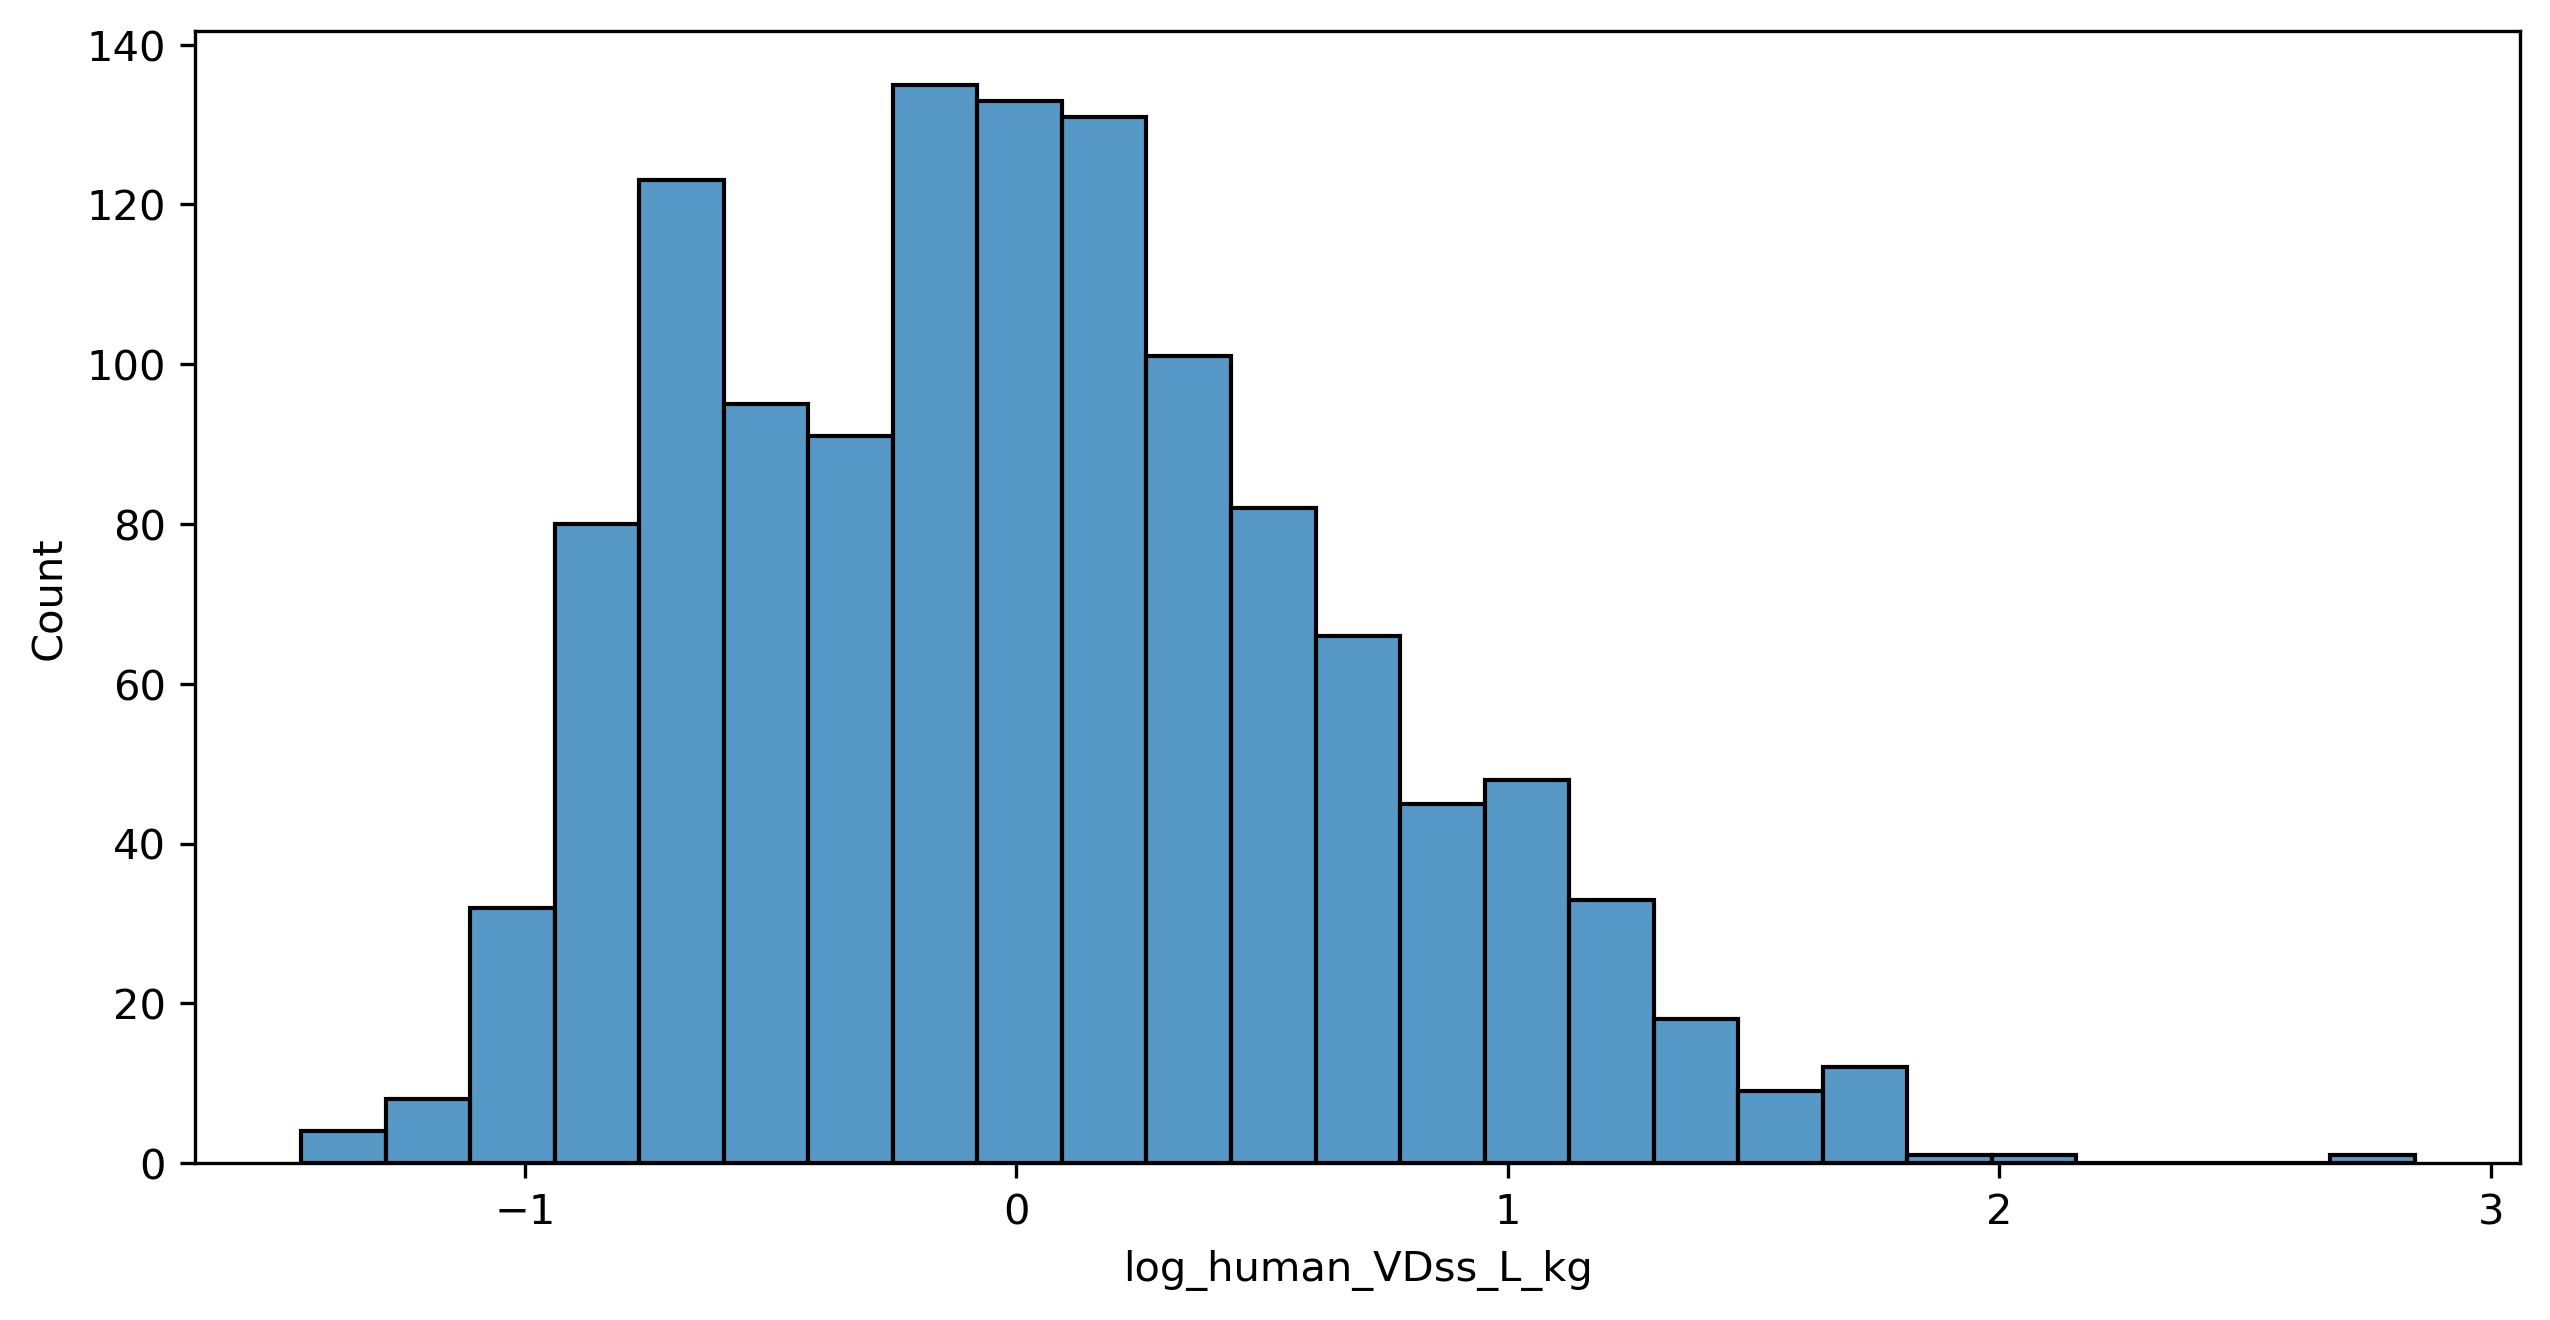

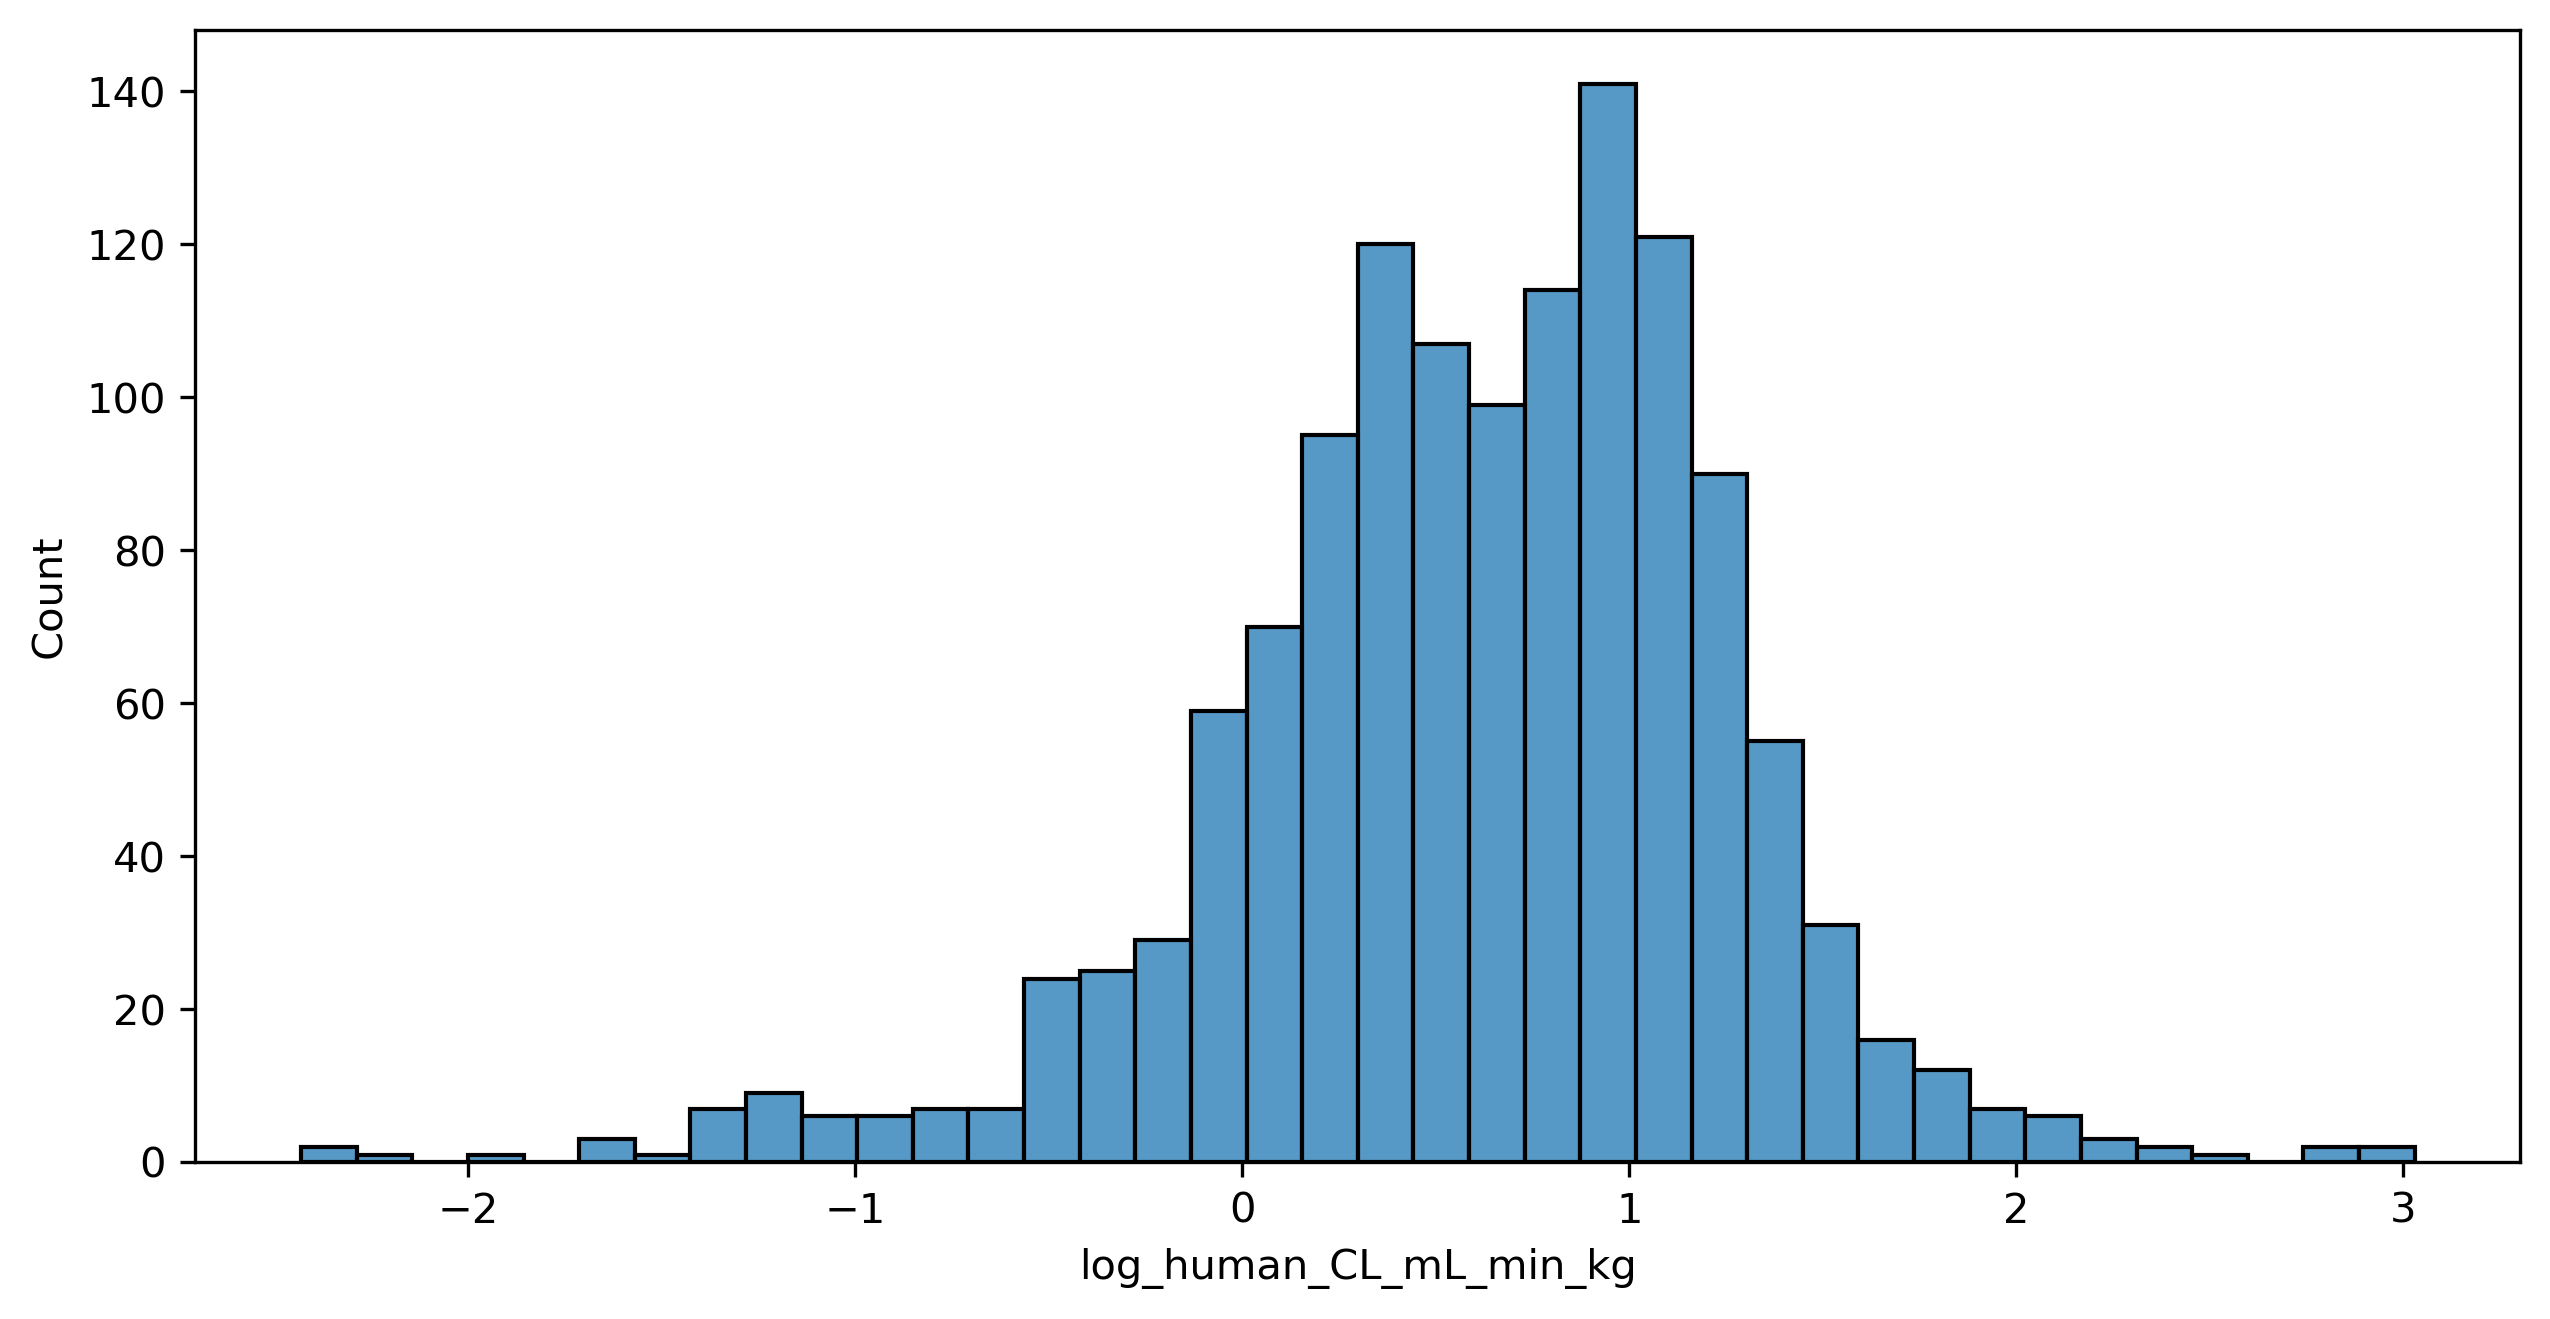

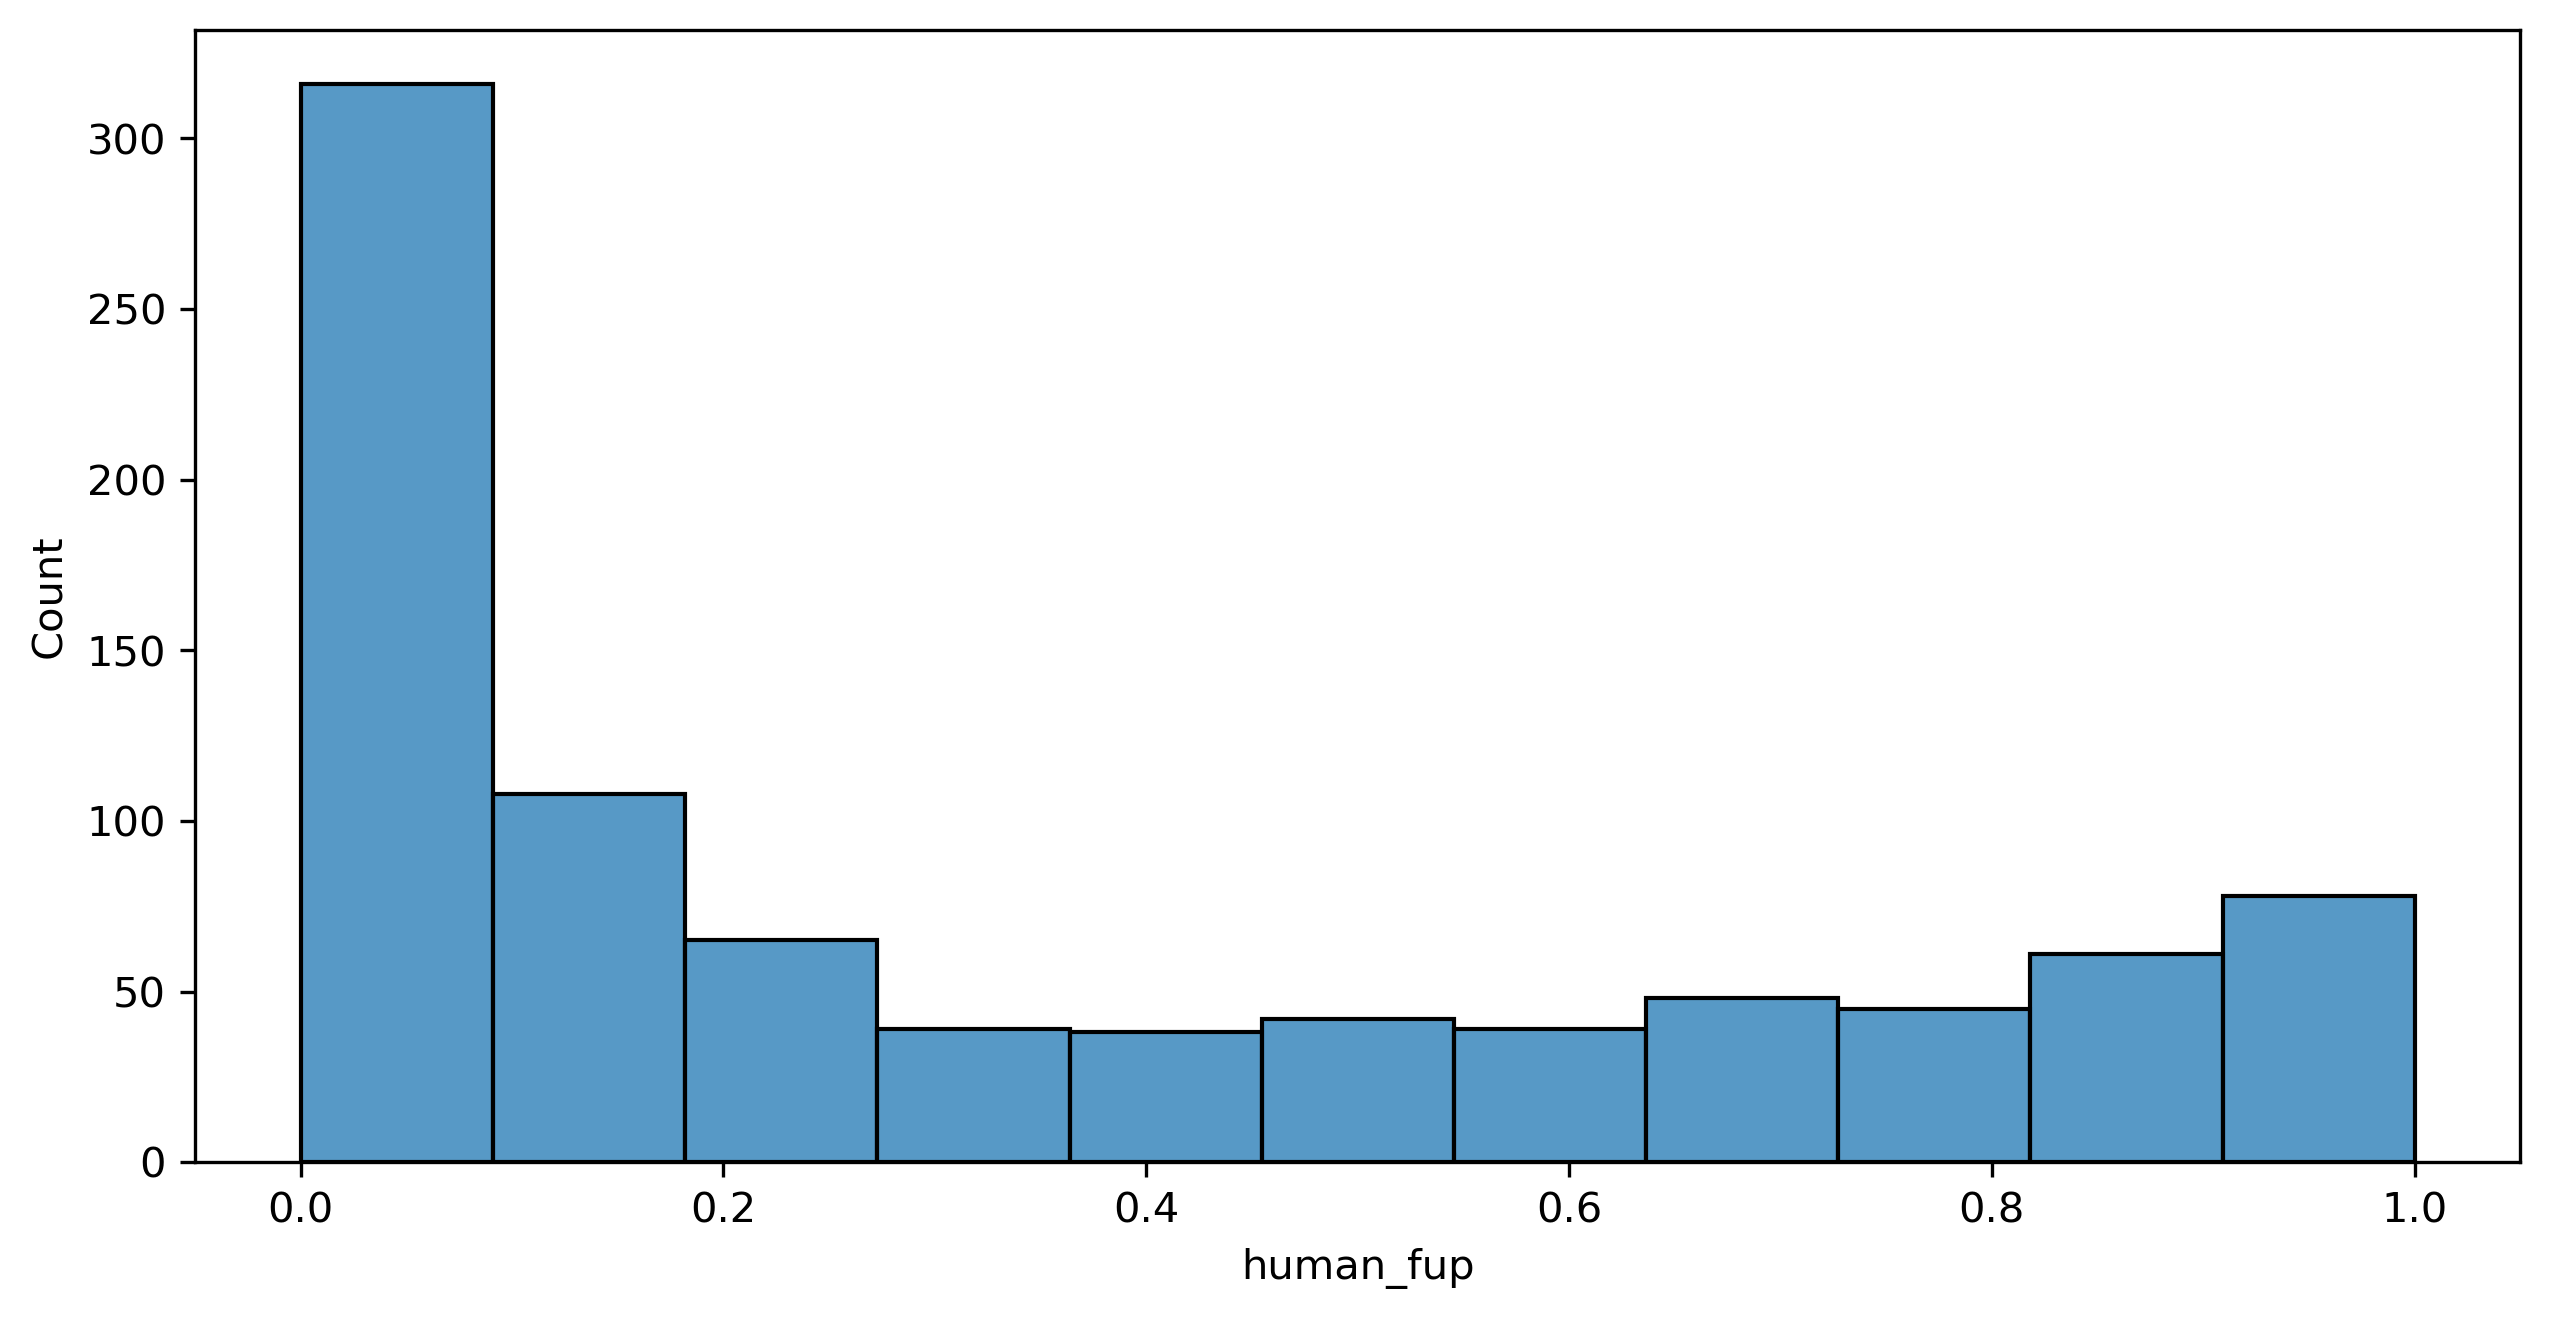

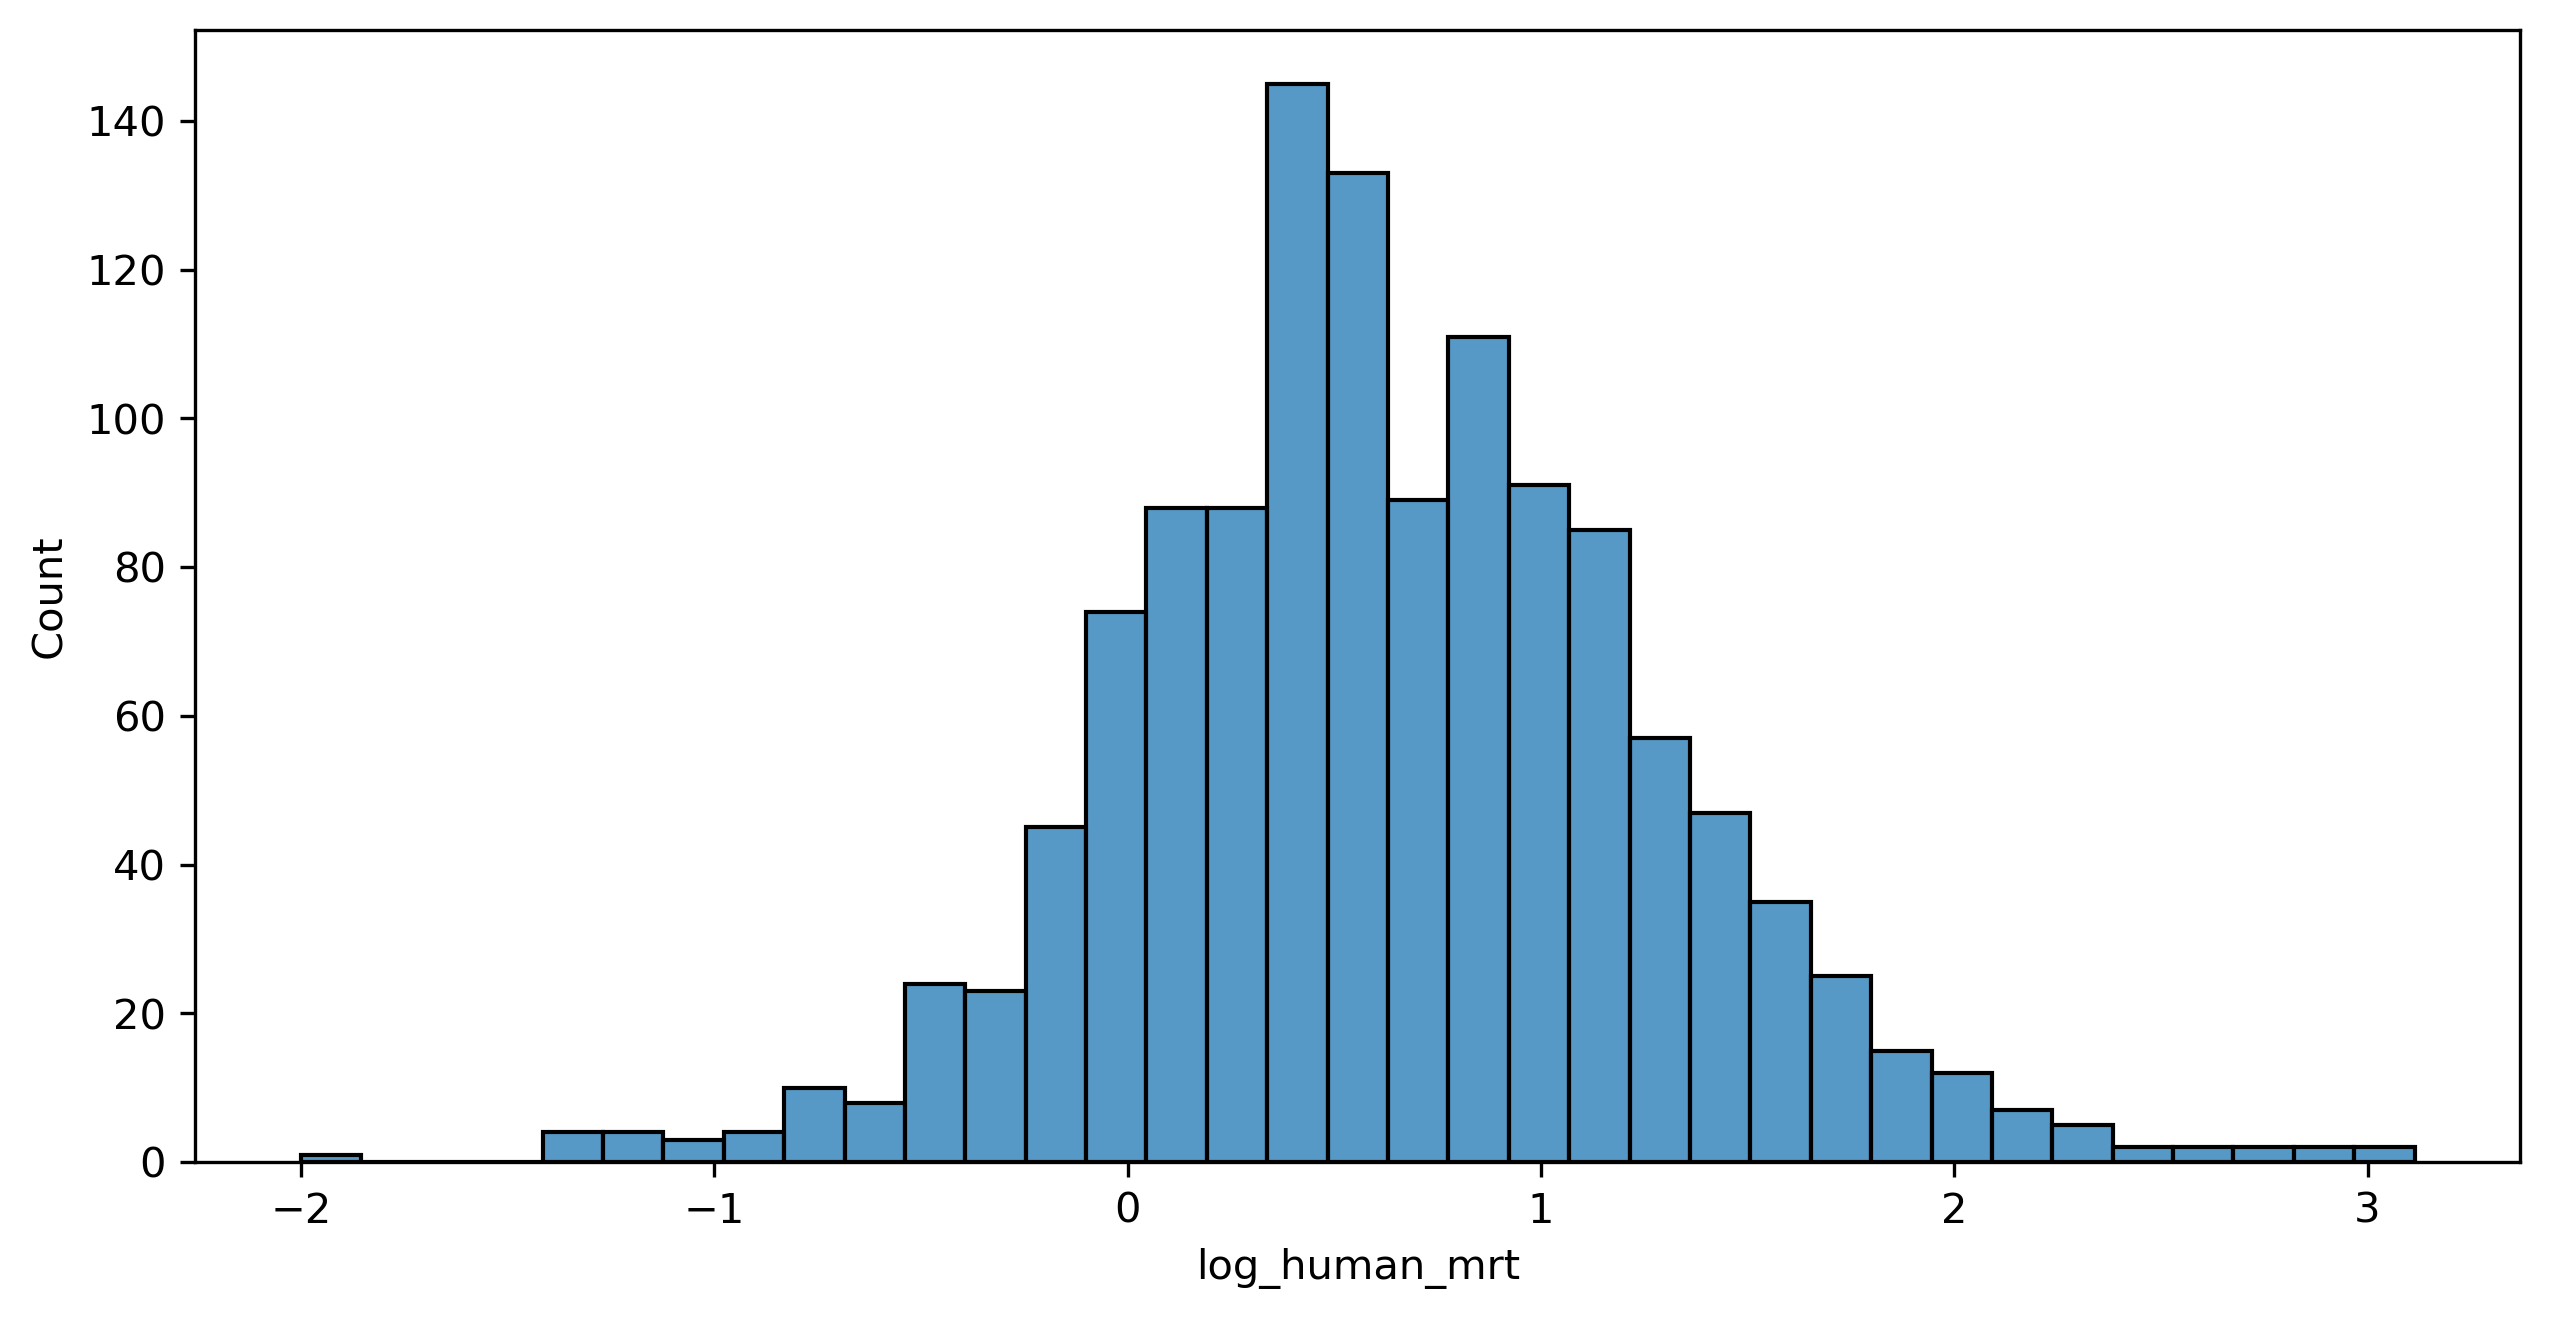

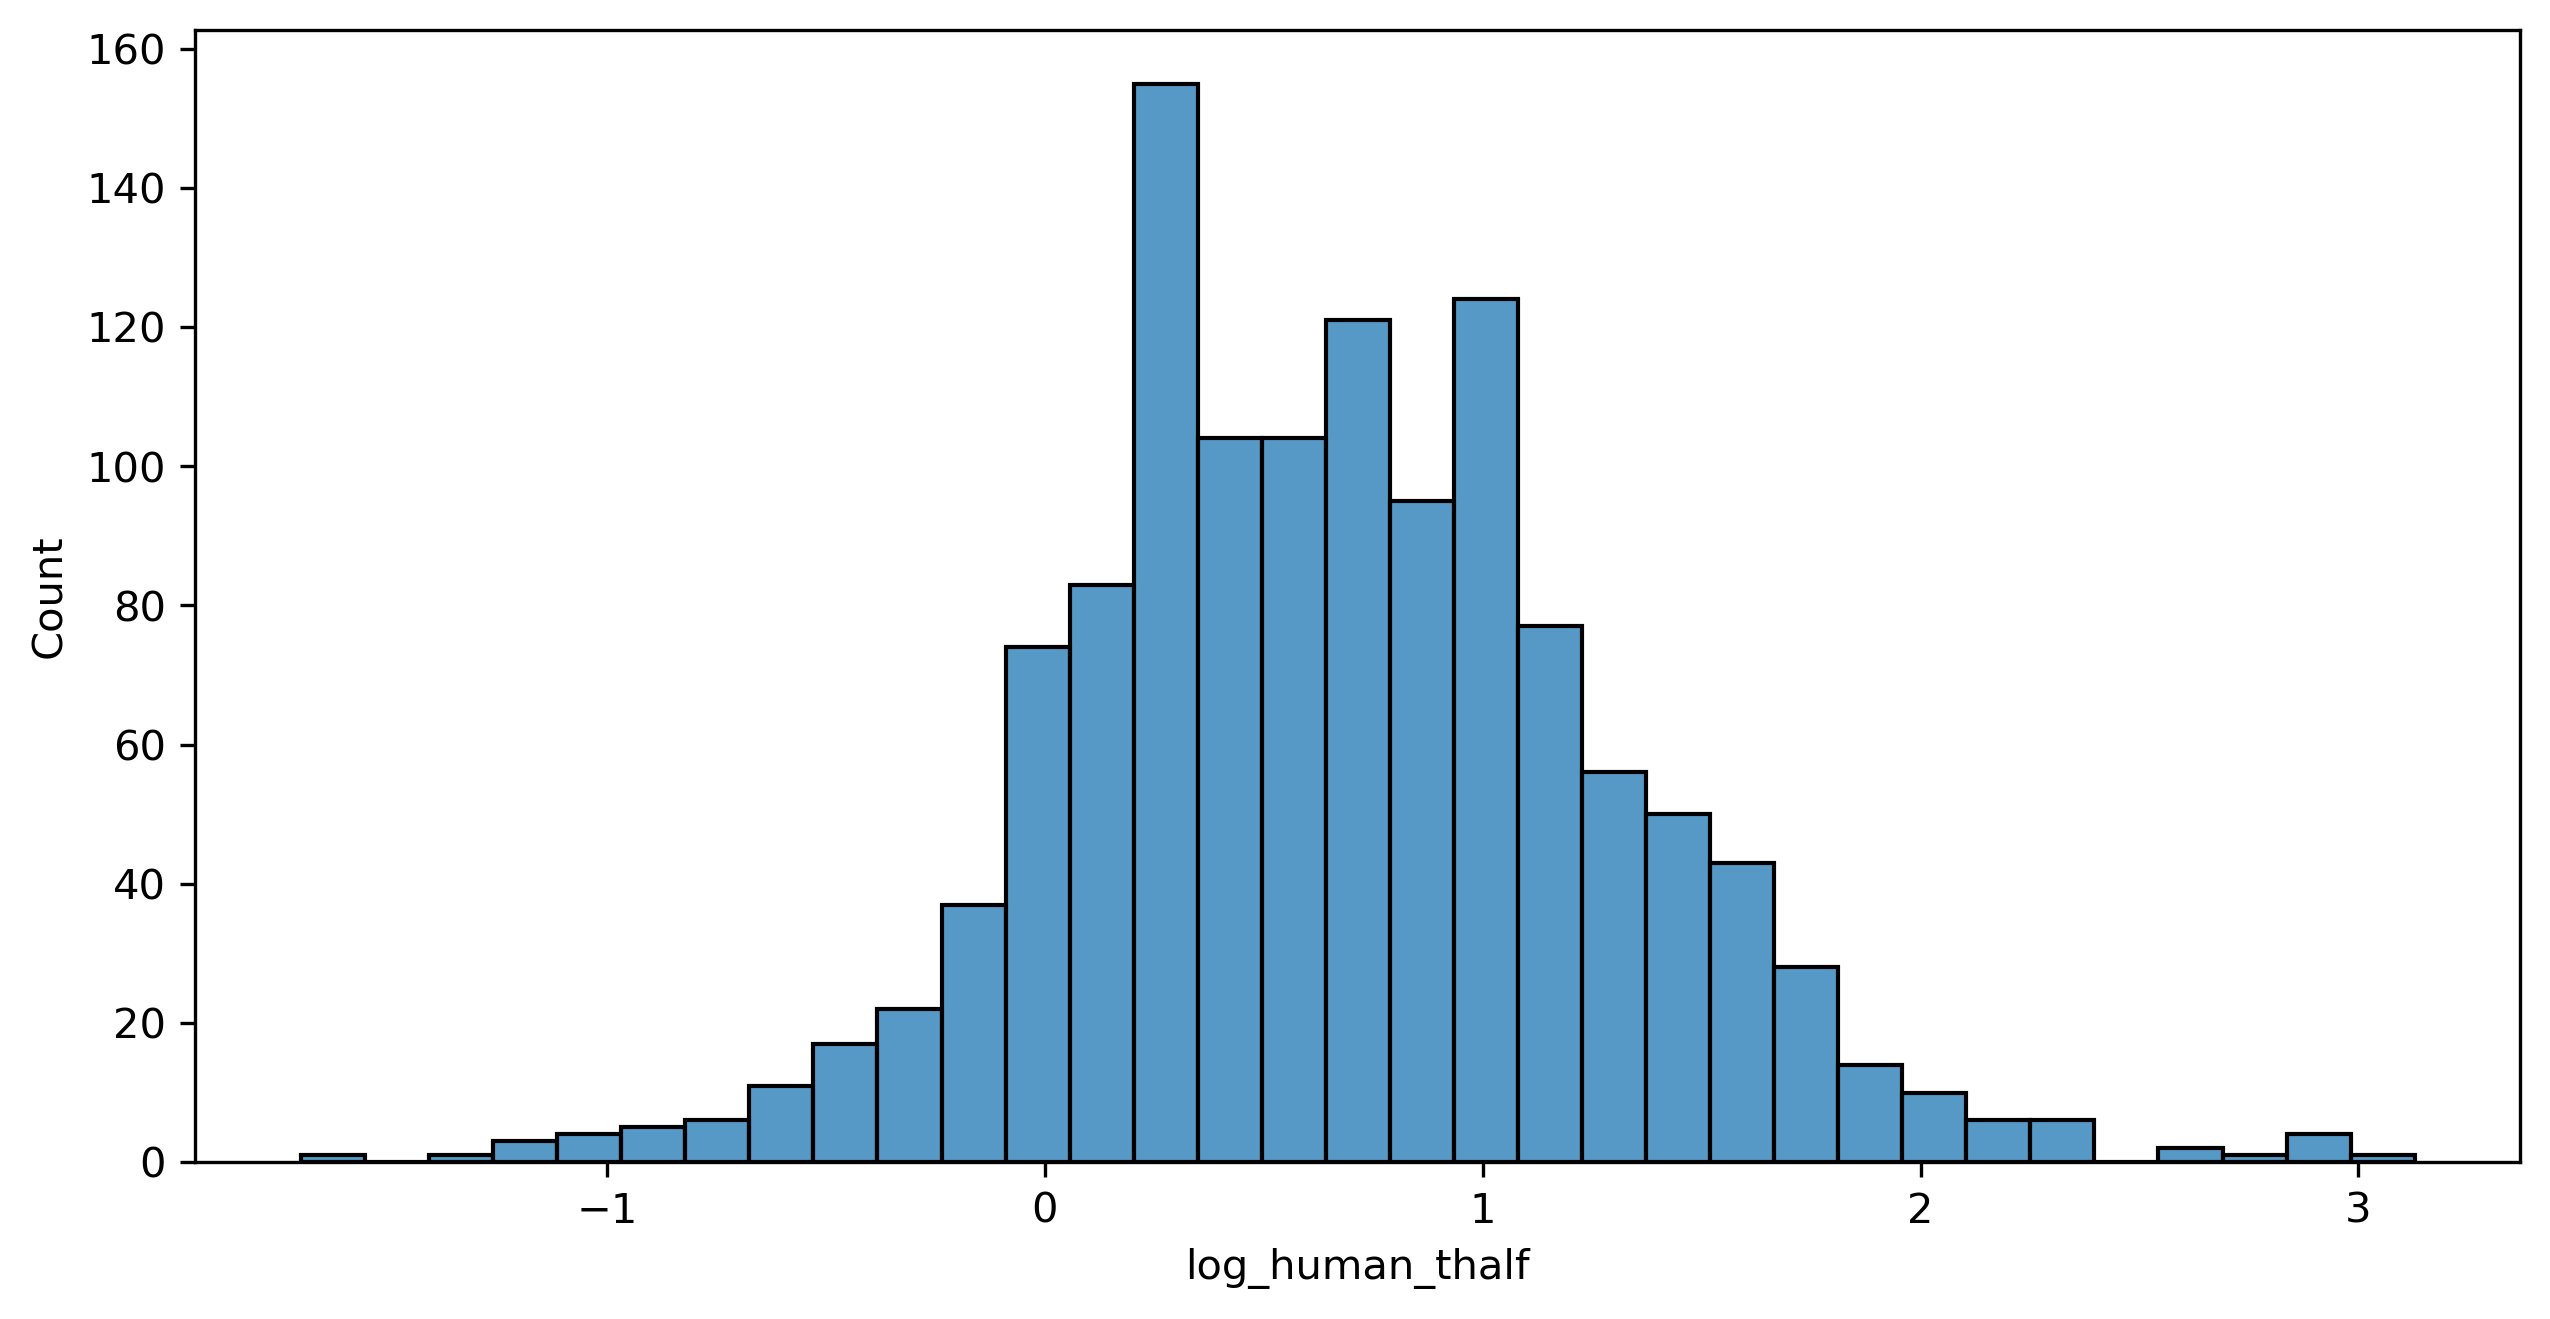

In [19]:
for column in ['human_VDss_L_kg', 'human_CL_mL_min_kg', 'human_fup',
       'human_mrt', 'human_thalf']:
    
    temp=human_lombardo.dropna(subset=[column])    
    plt.figure(figsize=(10,5), dpi= 300)
    
    if (column!="human_fup"):
        sns.histplot(data=human_lombardo, x="log_" + column)
    else:
        sns.histplot(data=human_lombardo, x=column)    
    plt.show()

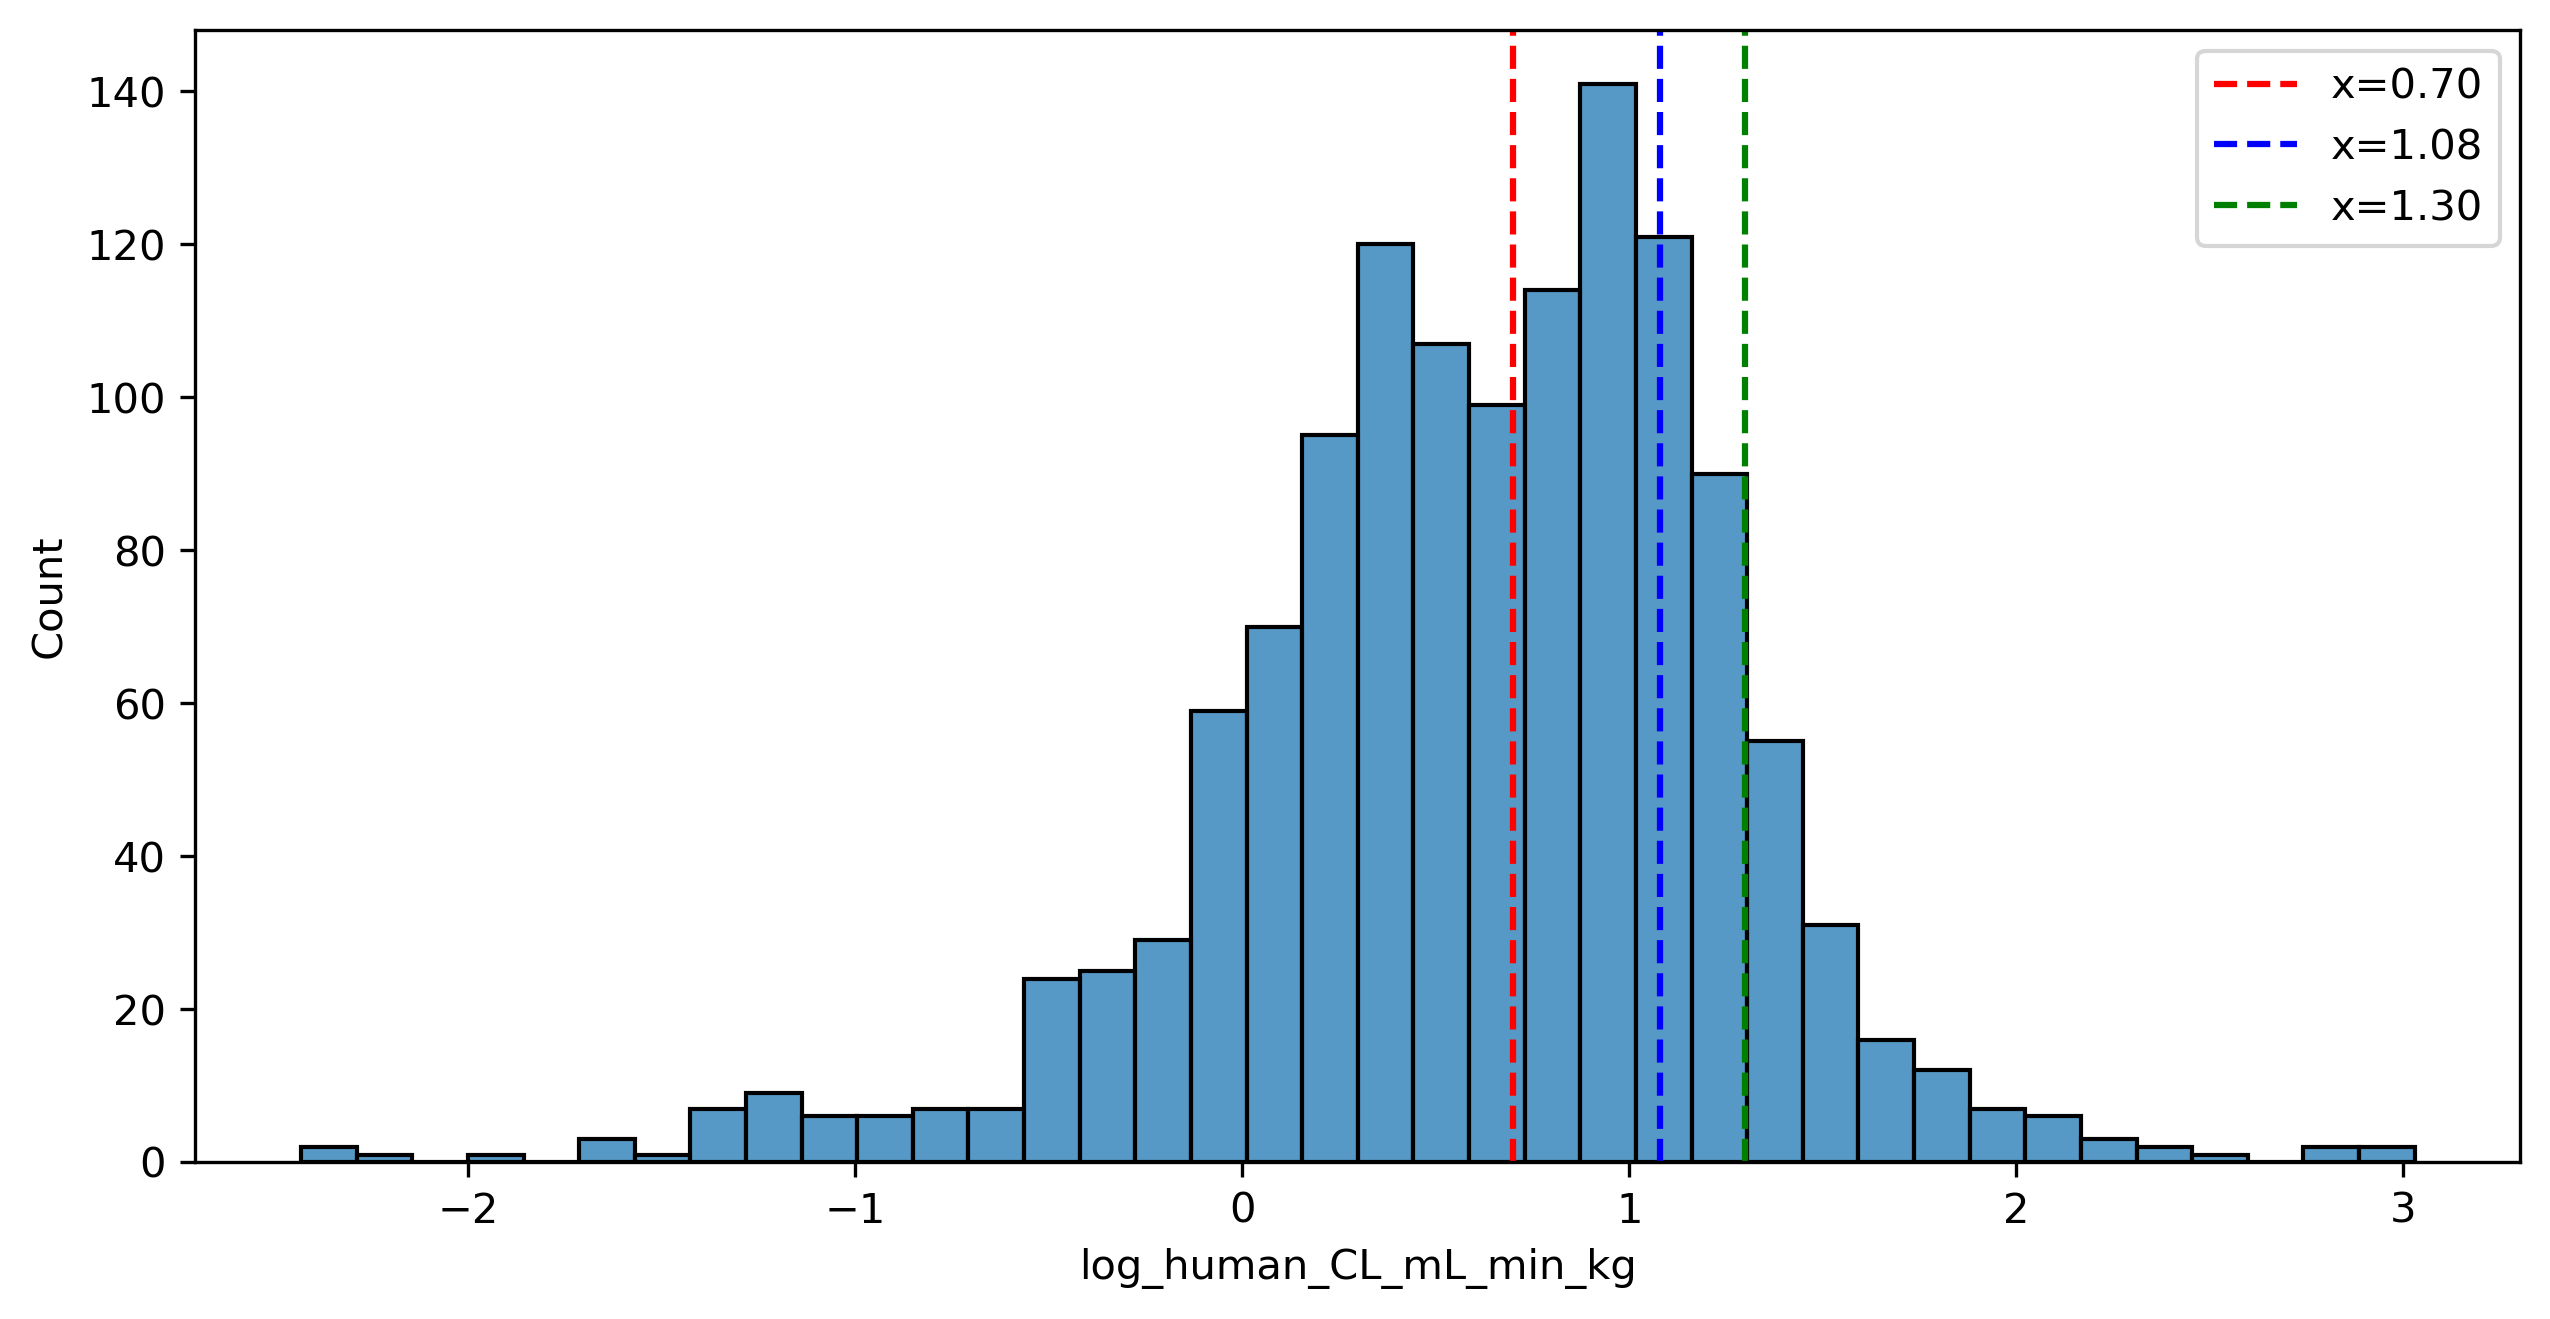

In [20]:
for column in ['human_CL_mL_min_kg']:
    
    temp = human_lombardo.dropna(subset=[column])    
    plt.figure(figsize=(10,5), dpi=300)
    
    if column != "human_fup":
        sns.histplot(data=human_lombardo, x="log_" + column)
        
        # Add vertical dashed lines
        plt.axvline(x=0.70, color='red', linestyle='--', label='x=0.70')
        plt.axvline(x=1.08, color='blue', linestyle='--', label='x=1.08')
        plt.axvline(x=1.30, color='green', linestyle='--', label='x=1.30')
    else:
        sns.histplot(data=human_lombardo, x=column)
        
    plt.legend()
    plt.show()


In [21]:
animal

,CHEMISTRY,NAME,human_CL_mL_min_kg,rat_CL_mL_min_kg,dog_CL_mL_min_kg,monkey_CL_mL_min_kg,human_VDss_L_kg,rat_VDss_L_kg,dog_VDss_L_kg,monkey_VDss_L_kg,human_fup,rat_fup,dog_fup,monkey_fup,smiles_r,InChICode_standardised,molecular_weight_smiles_r
0,Fc1c[nH]c(=O)[nH]c1=O,5-Fluorouracil,26.0,33.0,NaN,NaN,0.23,0.25,NaN,NaN,0.6400,0.690,NaN,NaN,O=c1[n-]cc(F)c(=O)[n-]1,"InChI=1S/C4H3FN2O2/c5-2-1-6-4(9)7-3(2)8/h1H,(H...",128.003303
1,[nH]1cnc(=S)c(c12)[nH]cn2,6-Mercaptopurine,15.0,NaN,NaN,15.2,1.00,NaN,NaN,0.9,0.8500,NaN,NaN,NaN,S=c1nc[n-]c2nc[n-]c12,InChI=1S/C5H3N4S/c10-5-3-4(7-1-6-3)8-2-9-5/h1-...,150.001114
2,CO[C@@H]1[C@H](NC)C[C@@H](O2)n(c3c4n5[C@]12C)c...,7-Hydroxystaurosporine,0.0,65.0,10.20,NaN,0.15,16.70,6.09,NaN,0.0022,NaN,0.0074,NaN,C[NH2+][C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3c...,InChI=1S/C28H26N4O4/c1-28-25(35-3)15(29-2)12-1...,483.202682
3,C1OC(=O)[C@](O)(CC)c(c12)cc3n(c2=O)Cc4c3nc5c(c...,9-Aminocamptothecin,6.5,150.0,NaN,NaN,2.20,5.00,NaN,NaN,0.0030,NaN,NaN,NaN,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(N)cccc...,InChI=1S/C20H17N3O4/c1-2-20(26)13-7-16-17-10(6...,363.121906
4,OC[C@@H]1C=C[C@@H](C1)n(cn2)c(c23)nc(N)nc3NC4CC4,Abacavir,13.0,30.0,NaN,NaN,0.84,NaN,NaN,NaN,0.5000,NaN,NaN,NaN,Nc1nc([NH2+]C2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)...,InChI=1S/C14H18N6O/c15-14-18-12(17-9-2-3-9)11-...,287.161486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,OC[C@@H](O)[C@@H](O)[C@H]1[C@H](NC(=O)C)[C@H](...,Zamivir,1.6,31.7,NaN,NaN,0.23,0.80,NaN,NaN,0.8600,NaN,NaN,NaN,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,InChI=1S/C12H20N4O7/c1-4(18)15-8-5(16-12(13)14...,332.133199
367,[N-]=[N+]=N[C@H]1C[C@@H](O[C@@H]1CO)n2cc(C)c(=...,Zidovudine,25.0,25.1,14.00,NaN,1.80,0.86,1.00,NaN,0.8000,0.687,0.8270,0.707,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,InChI=1S/C10H13N5O4/c1-5-3-15(10(18)12-9(5)17)...,266.089477
368,OP(=O)(O)C(O)(P(=O)(O)O)Cn1ccnc1,Zoledronic Acid,2.2,NaN,4.13,NaN,0.60,NaN,0.28,NaN,0.7800,NaN,NaN,NaN,O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-],"InChI=1S/C5H10N2O7P2/c8-5(15(9,10)11,16(12,13)...",267.967218
369,O=C1OC[C@@H](N1)Cc(cc2)cc(c23)c(c[nH]3)CCN(C)C,Zolmitriptan,6.7,29.4,NaN,NaN,1.80,3.53,NaN,NaN,0.7500,NaN,NaN,NaN,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,InChI=1S/C16H21N3O2/c1-19(2)6-5-12-9-17-15-4-3...,288.170653


In [22]:
animal["molecular_weight_smiles_r"] = animal["smiles_r"].apply(mol_wt)
animal["clogP"] = animal["smiles_r"].apply(get_clogp)
animal["TPSA"] = animal["smiles_r"].apply(get_tpsa)
animal

,CHEMISTRY,NAME,human_CL_mL_min_kg,rat_CL_mL_min_kg,dog_CL_mL_min_kg,monkey_CL_mL_min_kg,human_VDss_L_kg,rat_VDss_L_kg,dog_VDss_L_kg,monkey_VDss_L_kg,human_fup,rat_fup,dog_fup,monkey_fup,smiles_r,InChICode_standardised,molecular_weight_smiles_r,clogP,TPSA
0,Fc1c[nH]c(=O)[nH]c1=O,5-Fluorouracil,26.0,33.0,NaN,NaN,0.23,0.25,NaN,NaN,0.6400,0.690,NaN,NaN,O=c1[n-]cc(F)c(=O)[n-]1,"InChI=1S/C4H3FN2O2/c5-2-1-6-4(9)7-3(2)8/h1H,(H...",128.003303,-1.53950,62.34
1,[nH]1cnc(=S)c(c12)[nH]cn2,6-Mercaptopurine,15.0,NaN,NaN,15.2,1.00,NaN,NaN,0.9,0.8500,NaN,NaN,NaN,S=c1nc[n-]c2nc[n-]c12,InChI=1S/C5H3N4S/c10-5-3-4(7-1-6-3)8-2-9-5/h1-...,150.001114,0.27369,53.98
2,CO[C@@H]1[C@H](NC)C[C@@H](O2)n(c3c4n5[C@]12C)c...,7-Hydroxystaurosporine,0.0,65.0,10.20,NaN,0.15,16.70,6.09,NaN,0.0022,NaN,0.0074,NaN,C[NH2+][C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3c...,InChI=1S/C28H26N4O4/c1-28-25(35-3)15(29-2)12-1...,483.202682,2.81870,94.26
3,C1OC(=O)[C@](O)(CC)c(c12)cc3n(c2=O)Cc4c3nc5c(c...,9-Aminocamptothecin,6.5,150.0,NaN,NaN,2.20,5.00,NaN,NaN,0.0030,NaN,NaN,NaN,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(N)cccc...,InChI=1S/C20H17N3O4/c1-2-20(26)13-7-16-17-10(6...,363.121906,1.66180,107.44
4,OC[C@@H]1C=C[C@@H](C1)n(cn2)c(c23)nc(N)nc3NC4CC4,Abacavir,13.0,30.0,NaN,NaN,0.84,NaN,NaN,NaN,0.5000,NaN,NaN,NaN,Nc1nc([NH2+]C2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)...,InChI=1S/C14H18N6O/c15-14-18-12(17-9-2-3-9)11-...,287.161486,-0.12470,106.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,OC[C@@H](O)[C@@H](O)[C@H]1[C@H](NC(=O)C)[C@H](...,Zamivir,1.6,31.7,NaN,NaN,0.23,0.80,NaN,NaN,0.8600,NaN,NaN,NaN,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,InChI=1S/C12H20N4O7/c1-4(18)15-8-5(16-12(13)14...,332.133199,-7.03960,205.16
367,[N-]=[N+]=N[C@H]1C[C@@H](O[C@@H]1CO)n2cc(C)c(=...,Zidovudine,25.0,25.1,14.00,NaN,1.80,0.86,1.00,NaN,0.8000,0.687,0.8270,0.707,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,InChI=1S/C10H13N5O4/c1-5-3-15(10(18)12-9(5)17)...,266.089477,-0.56718,131.39
368,OP(=O)(O)C(O)(P(=O)(O)O)Cn1ccnc1,Zoledronic Acid,2.2,NaN,4.13,NaN,0.60,NaN,0.28,NaN,0.7800,NaN,NaN,NaN,O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-],"InChI=1S/C5H10N2O7P2/c8-5(15(9,10)11,16(12,13)...",267.967218,-3.64340,164.43
369,O=C1OC[C@@H](N1)Cc(cc2)cc(c23)c(c[nH]3)CCN(C)C,Zolmitriptan,6.7,29.4,NaN,NaN,1.80,3.53,NaN,NaN,0.7500,NaN,NaN,NaN,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,InChI=1S/C16H21N3O2/c1-19(2)6-5-12-9-17-15-4-3...,288.170653,0.50580,58.56


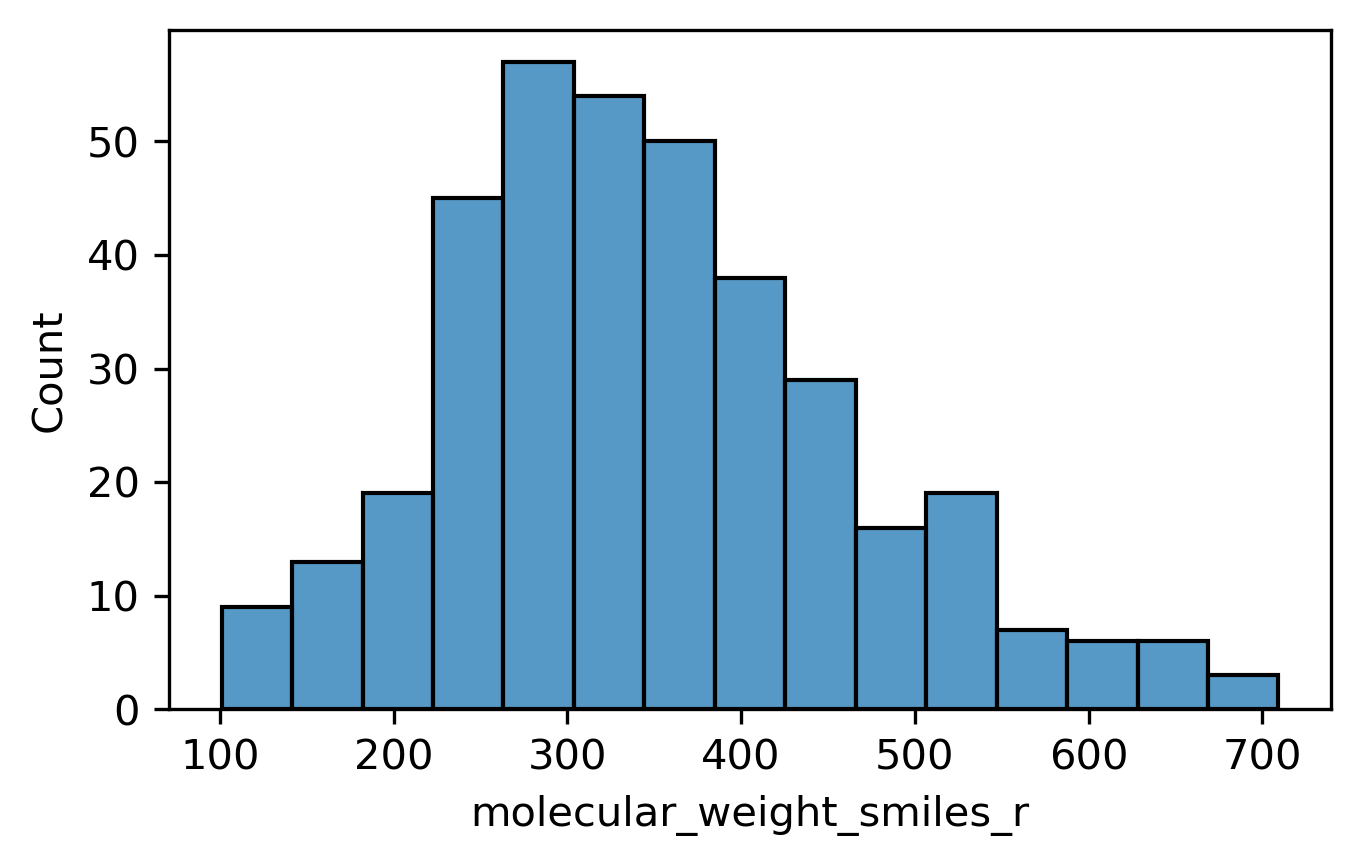

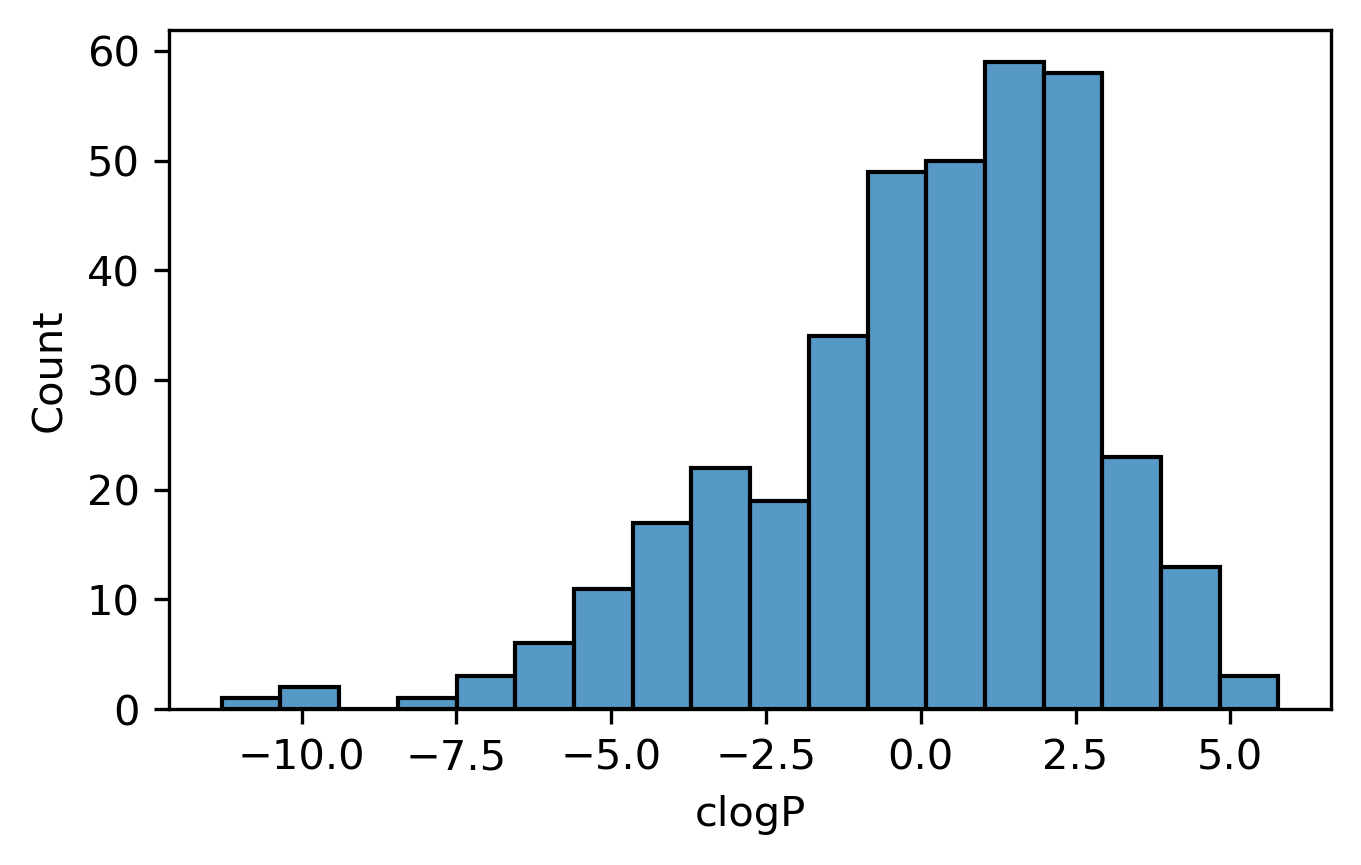

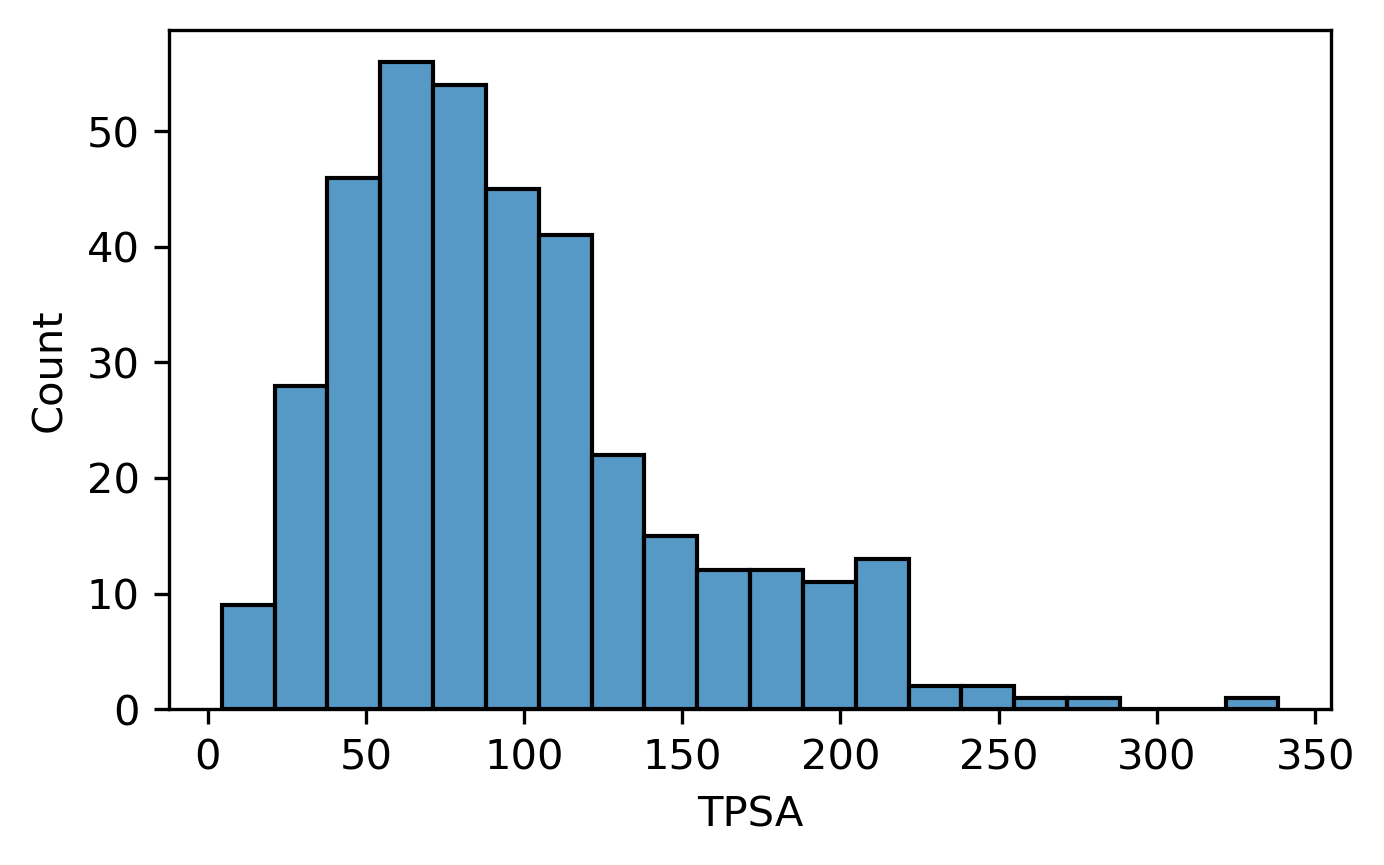

In [23]:
for column in ["molecular_weight_smiles_r","clogP","TPSA"]:
    
    plt.figure(figsize=(5,3), dpi= 300)
    sns.histplot(data=animal, x=column)
    plt.show()

In [24]:
animal[["molecular_weight_smiles_r","clogP","TPSA"]].describe()

,molecular_weight_smiles_r,clogP,TPSA
count,371.000000,371.000000,371.000000
mean,349.104030,0.030196,96.296685
std,116.935286,2.762515,53.976145
min,101.047678,-11.291400,4.440000
25%,267.177947,-1.362300,57.970000
50%,337.190993,0.556000,86.180000
75%,420.671155,2.085370,120.210000
max,709.270691,5.778000,338.420000


In [25]:
dog = animal[["InChICode_standardised", "smiles_r", "dog_VDss_L_kg" , "dog_CL_mL_min_kg", "dog_fup"]].dropna(subset=["dog_VDss_L_kg" , "dog_CL_mL_min_kg", "dog_fup"], how="all").reset_index(drop=True)
dog.loc[dog["dog_CL_mL_min_kg"] == '#REF!', "dog_CL_mL_min_kg"] = np.nan
dog["dog_CL_mL_min_kg"] = dog["dog_CL_mL_min_kg"].astype("float")
dog

dog=  dog[["smiles_r", "dog_VDss_L_kg" , "dog_CL_mL_min_kg", "dog_fup"]]
for endpoint in [ "dog_VDss_L_kg" , "dog_CL_mL_min_kg" ]:
    print("Transformed endpoint to log base 10")
    dog["log_" + endpoint] = np.log10(dog[endpoint])
dog

Transformed endpoint to log base 10
Transformed endpoint to log base 10


,smiles_r,dog_VDss_L_kg,dog_CL_mL_min_kg,dog_fup,log_dog_VDss_L_kg,log_dog_CL_mL_min_kg
0,C[NH2+][C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3c...,6.09,10.20,0.0074,0.784617,1.008600
1,CC[NH+](CC)CCNC(=O)c1ccc(NC(C)=O)cc1,1.90,6.40,0.9135,0.278754,0.806180
2,CC(=O)Nc1ccc([O-])cc1,0.58,4.00,0.8900,-0.236572,0.602060
3,[NH3+]C(C(=O)[O-])[C@@H]1CC(Cl)=NO1,0.58,1.40,NaN,-0.236572,0.146128
4,CC1=[NH+]C(=O)[C@](CC[NH+](C(C)C)C(C)C)(c2cccc...,1.30,12.00,0.6180,0.113943,1.079181
...,...,...,...,...,...,...
259,CC(c1ncncc1F)[C@](O)(Cn1cncn1)c1ccc(F)cc1F,0.88,1.50,0.4900,-0.055517,0.176091
260,O=C(CCCCCCC(O)=NO)Nc1ccccc1,0.60,54.70,0.4581,-0.221849,1.737987
261,CC(=O)CC(c1ccccc1)c1c([O-])c2ccccc2oc1=O,0.28,0.30,NaN,-0.552842,-0.522879
262,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,1.00,14.00,0.8270,0.000000,1.146128


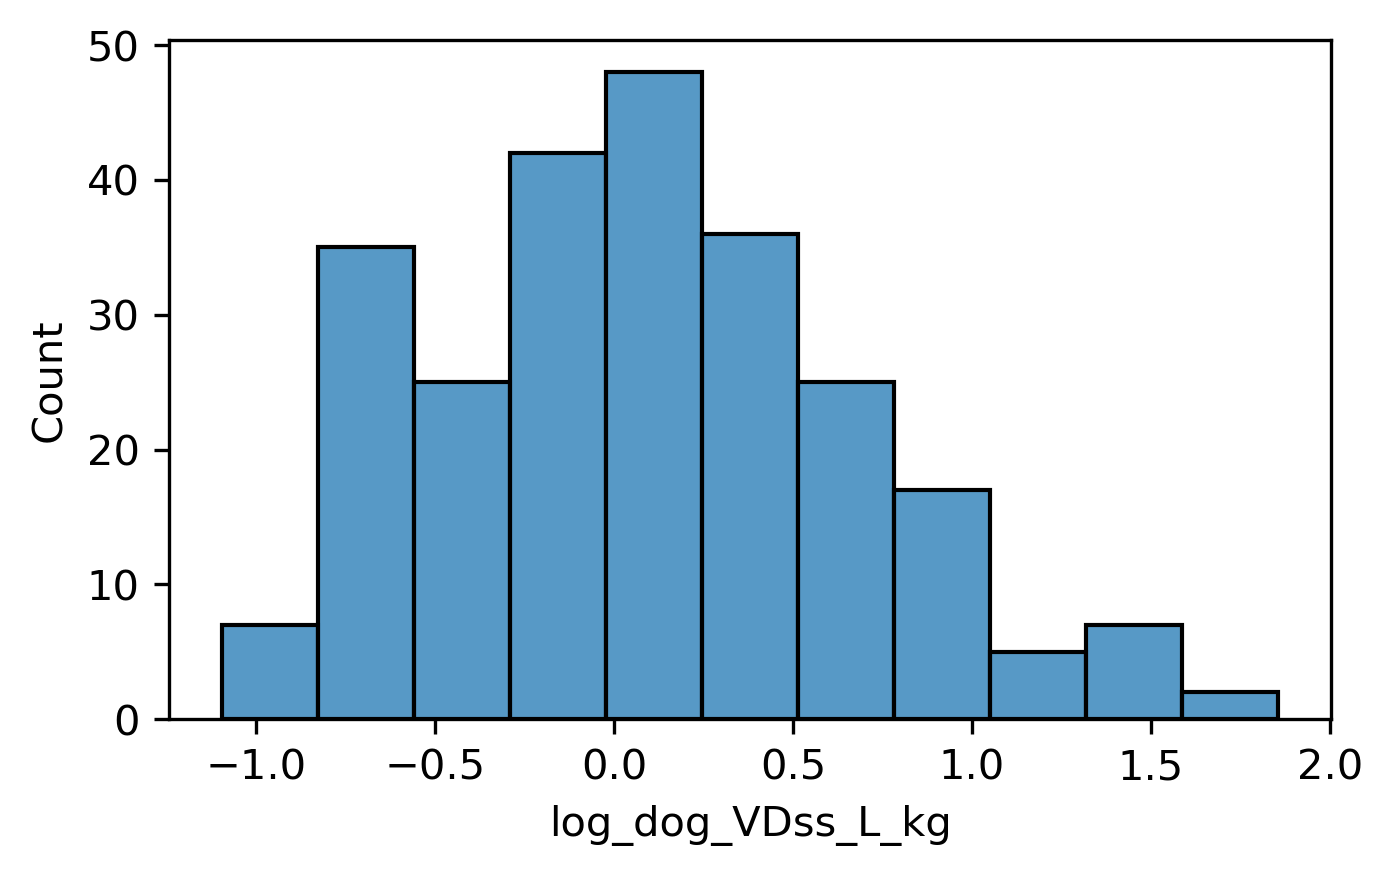

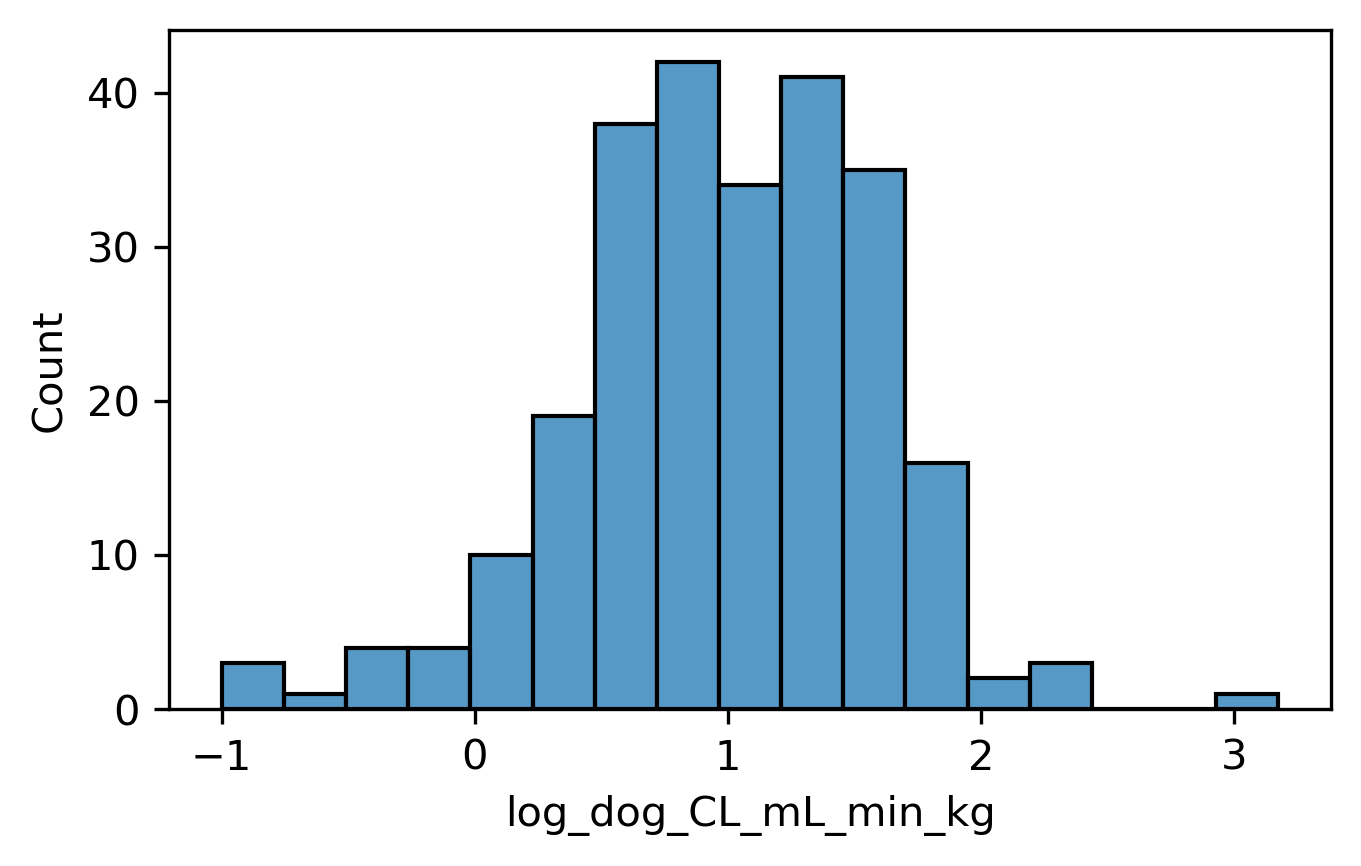

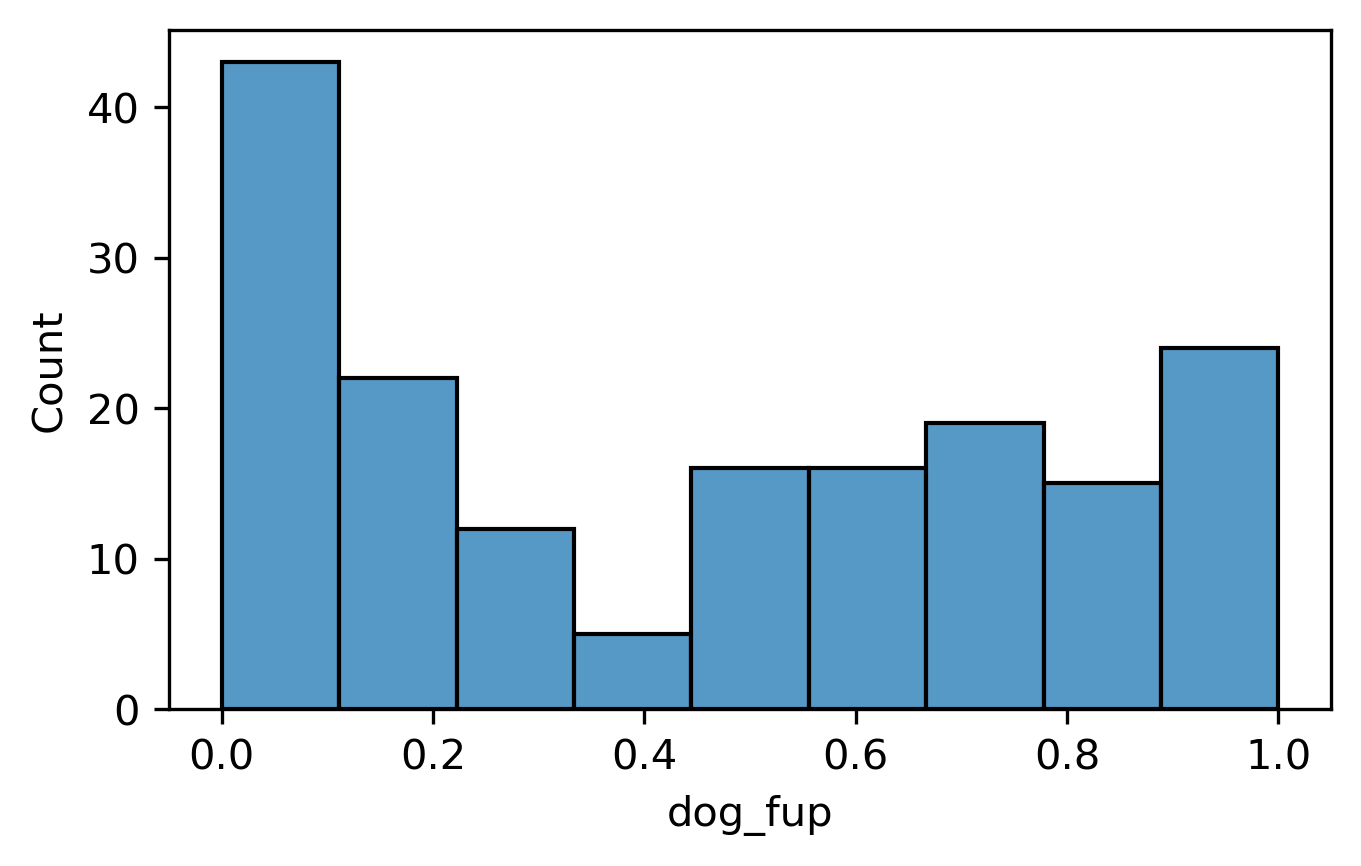

In [26]:
for column in ["dog_VDss_L_kg" , "dog_CL_mL_min_kg", "dog_fup"]:
    
    plt.figure(figsize=(5,3), dpi= 300)
    if (column!="dog_fup"):
        sns.histplot(data=dog, x="log_" + column)
    else:
        sns.histplot(data=dog, x=column)
    plt.show()

In [27]:
rat = animal[["InChICode_standardised",  "smiles_r", "rat_VDss_L_kg", "rat_CL_mL_min_kg", "rat_fup"]].dropna(subset=["rat_VDss_L_kg", "rat_CL_mL_min_kg", "rat_fup"], how="all").reset_index(drop=True)


rat=  rat[["smiles_r", "rat_VDss_L_kg" , "rat_CL_mL_min_kg", "rat_fup"]]
for endpoint in [ "rat_VDss_L_kg" , "rat_CL_mL_min_kg" ]:
    print("Transformed endpoint to log base 10")
    rat["log_" + endpoint] = np.log10(rat[endpoint])
rat

Transformed endpoint to log base 10
Transformed endpoint to log base 10


,smiles_r,rat_VDss_L_kg,rat_CL_mL_min_kg,rat_fup,log_rat_VDss_L_kg,log_rat_CL_mL_min_kg
0,O=c1[n-]cc(F)c(=O)[n-]1,0.25,33.0,0.690,-0.602060,1.518514
1,C[NH2+][C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3c...,16.70,65.0,NaN,1.222716,1.812913
2,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(N)cccc...,5.00,150.0,NaN,0.698970,2.176091
3,Nc1nc([NH2+]C2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)...,NaN,30.0,NaN,NaN,1.477121
4,CC[NH+](CC)CCNC(=O)c1ccc(NC(C)=O)cc1,2.90,28.0,0.580,0.462398,1.447158
...,...,...,...,...,...,...
319,CCN(C(C)=O)c1cccc(-c2ccnc3c(C#N)cnn23)c1,1.72,20.7,NaN,0.235528,1.315970
320,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,0.80,31.7,NaN,-0.096910,1.501059
321,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,0.86,25.1,0.687,-0.065502,1.399674
322,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,3.53,29.4,NaN,0.547775,1.468347


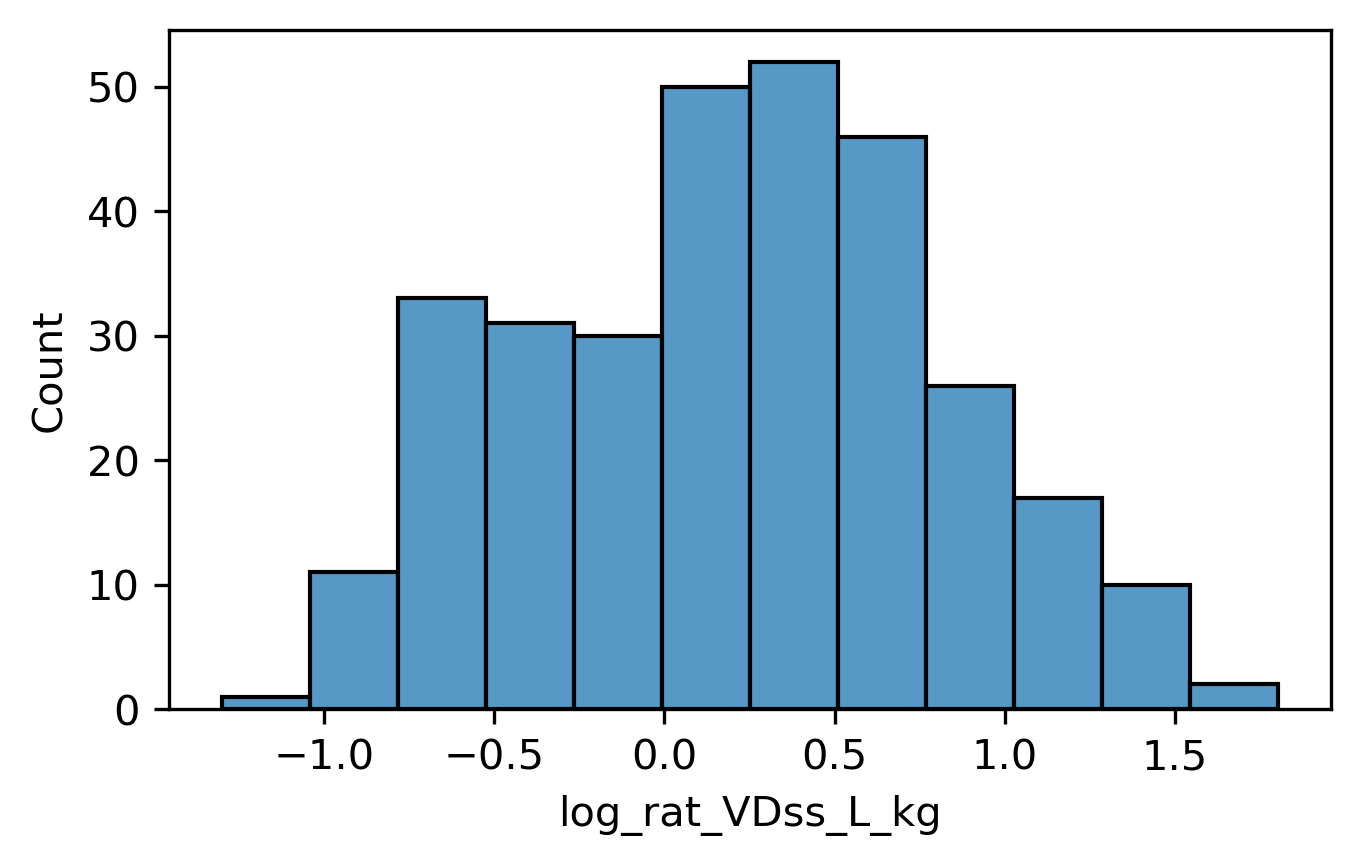

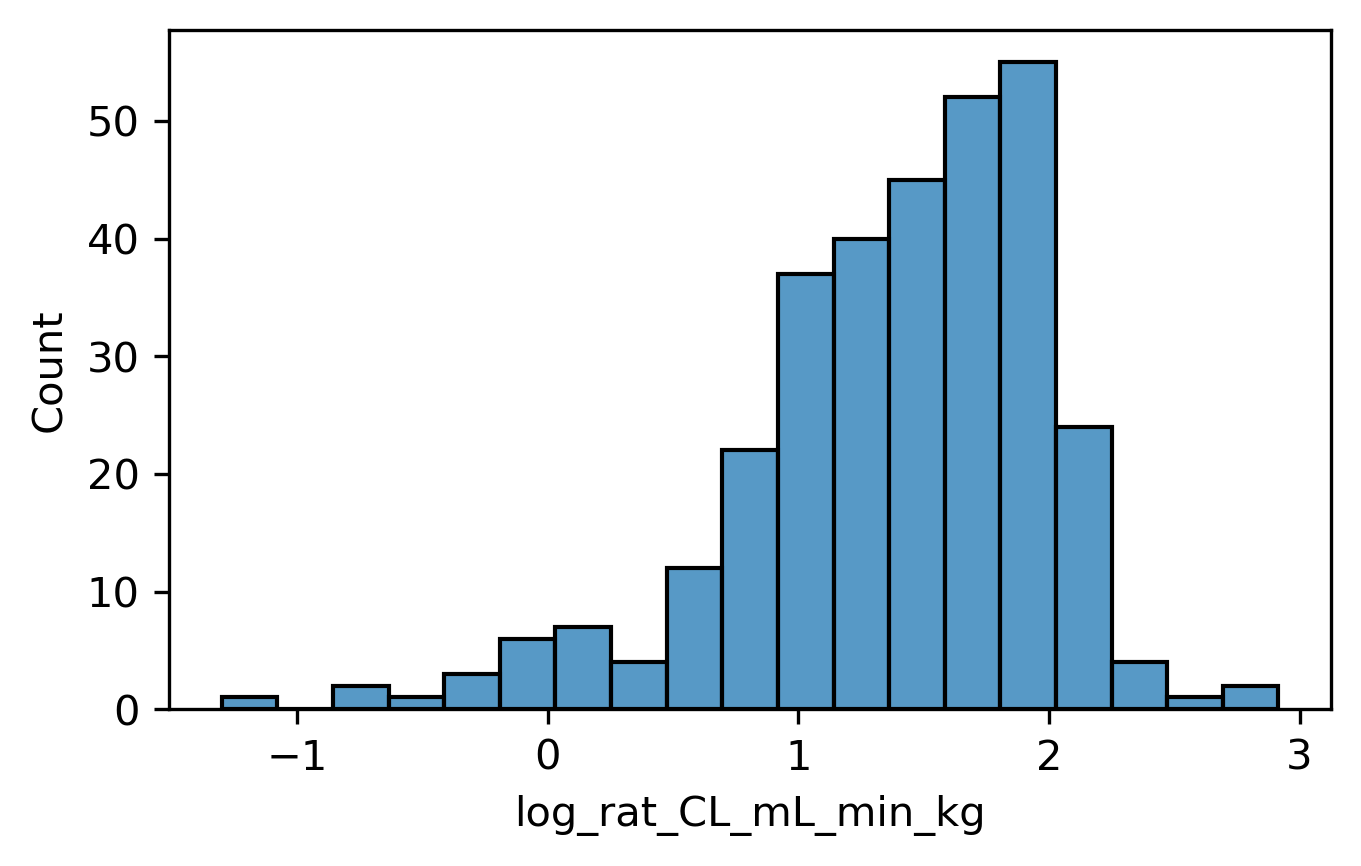

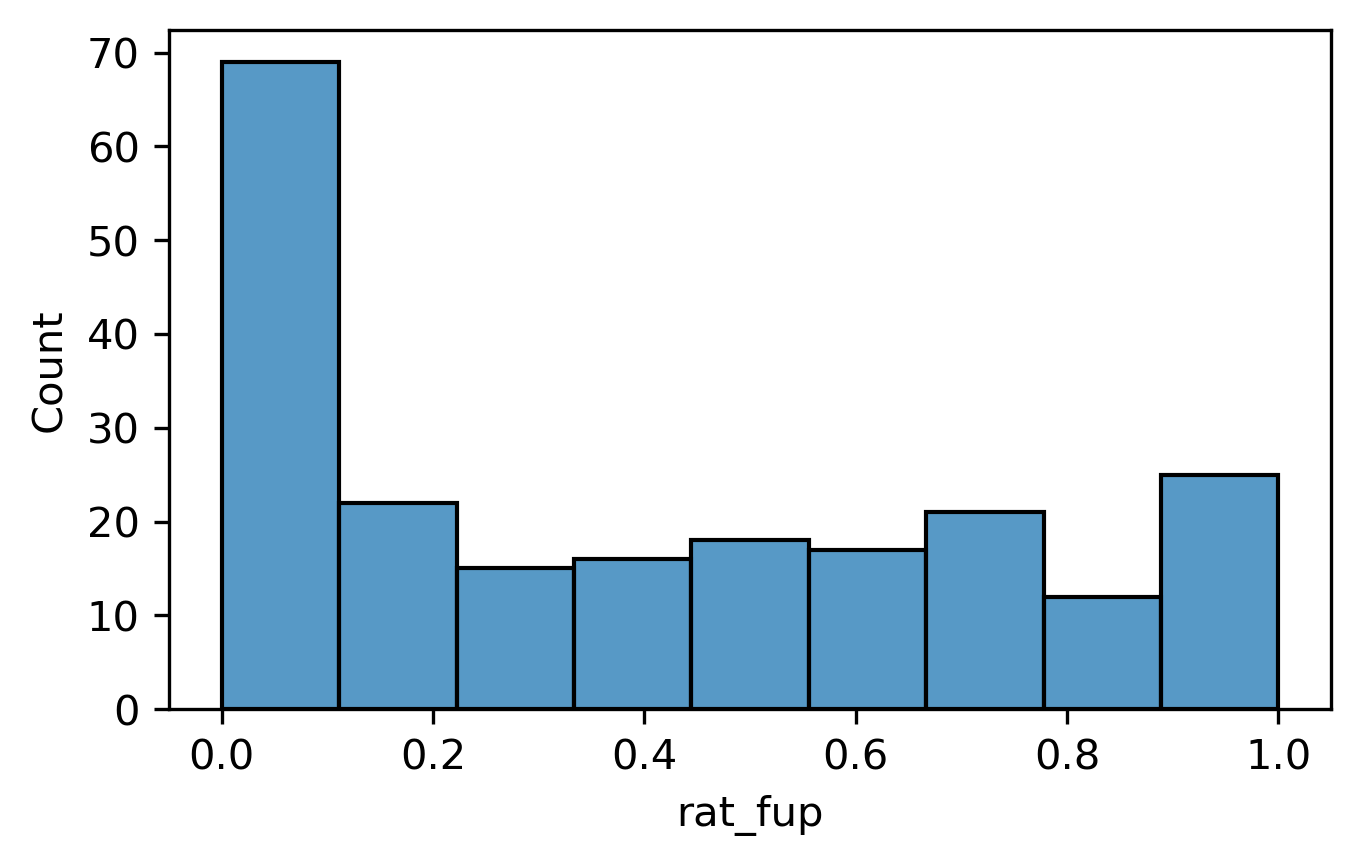

In [28]:
for column in ["rat_VDss_L_kg" , "rat_CL_mL_min_kg", "rat_fup"]:
    
    plt.figure(figsize=(5,3), dpi= 300)
    if (column!="rat_fup"):
        sns.histplot(data=rat, x="log_" + column)
    else:
        sns.histplot(data=rat, x=column)
    plt.show()

In [29]:
monkey = animal[["InChICode_standardised",  "smiles_r", "monkey_VDss_L_kg", "monkey_CL_mL_min_kg", "monkey_fup"]].dropna(subset=[ "monkey_VDss_L_kg", "monkey_CL_mL_min_kg", "monkey_fup"], how="all").reset_index(drop=True)

monkey=  monkey[["smiles_r", "monkey_VDss_L_kg" , "monkey_CL_mL_min_kg", "monkey_fup"]]
for endpoint in [ "monkey_VDss_L_kg" , "monkey_CL_mL_min_kg" ]:
    print("Transformed endpoint to log base 10")
    monkey["log_" + endpoint] = np.log10(monkey[endpoint])
monkey

Transformed endpoint to log base 10
Transformed endpoint to log base 10


,smiles_r,monkey_VDss_L_kg,monkey_CL_mL_min_kg,monkey_fup,log_monkey_VDss_L_kg,log_monkey_CL_mL_min_kg
0,S=c1nc[n-]c2nc[n-]c12,0.90,15.2,NaN,-0.045757,1.181844
1,CC(=O)Nc1ccc([O-])cc1,NaN,7.3,NaN,NaN,0.863323
2,[NH3+]C(C(=O)[O-])[C@@H]1CC(Cl)=NO1,0.61,2.3,NaN,-0.214670,0.361728
3,CC1=[NH+]C(=O)[C@](CC[NH+](C(C)C)C(C)C)(c2cccc...,1.60,20.0,0.6556,0.204120,1.301030
4,Nc1nc(=O)c2ncn(COCCO)c2[n-]1,0.90,8.8,NaN,-0.045757,0.944483
...,...,...,...,...,...,...
123,COc1ccc(C(C[NH+](C)C)C2(O)CCCCC2)cc1,3.50,41.0,0.7080,0.544068,1.612784
124,COc1ccc(CC[NH+](C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C...,5.35,22.8,0.3410,0.728354,1.357935
125,N#C[C@@H]1CCC[NH+]1C(=O)C[NH2+]C12CC3CC(CC(O)(...,0.70,25.0,0.9597,-0.154902,1.397940
126,Nc1ccn([C@H]2CC[C@@H](CO)O2)c(=O)n1,0.98,10.3,NaN,-0.008774,1.012837


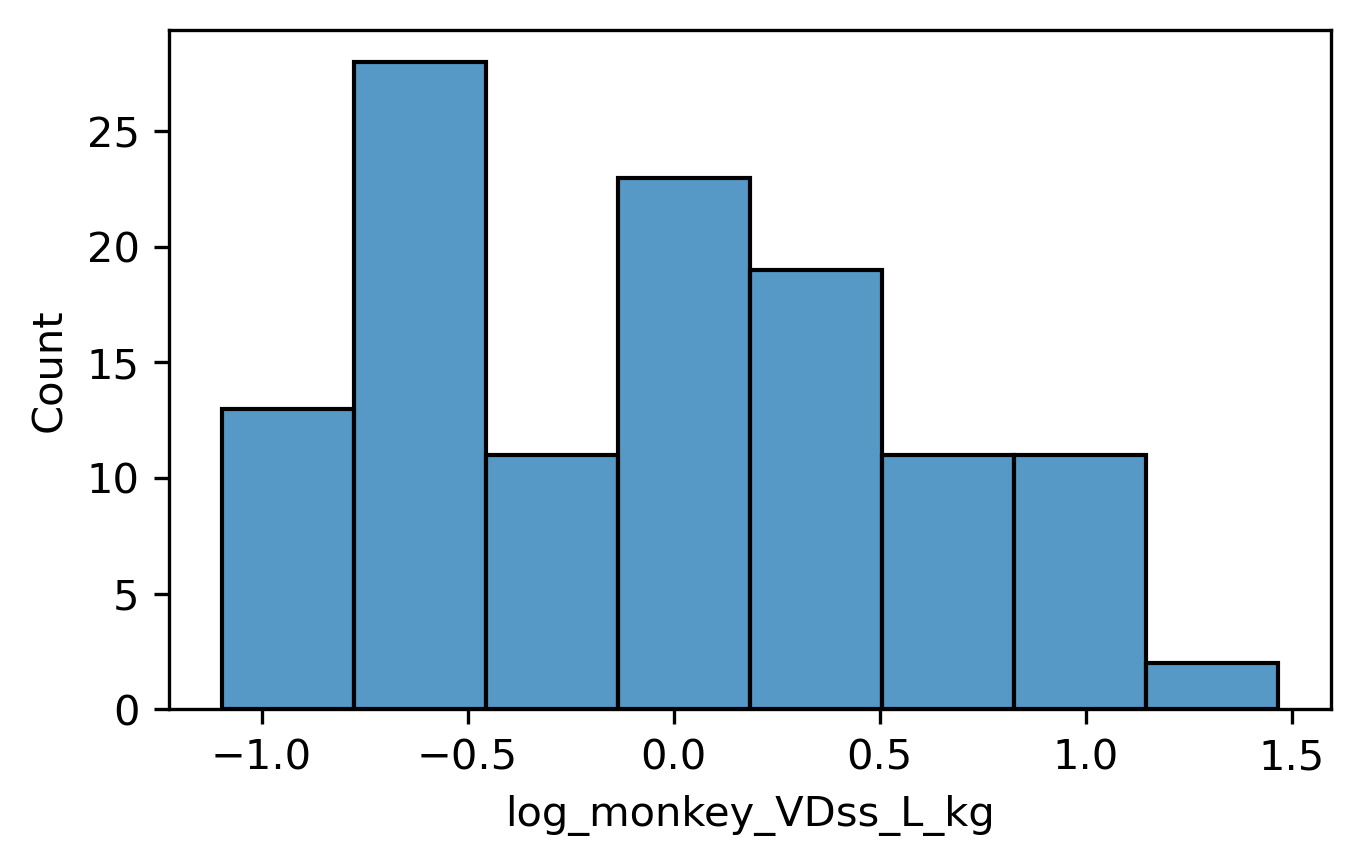

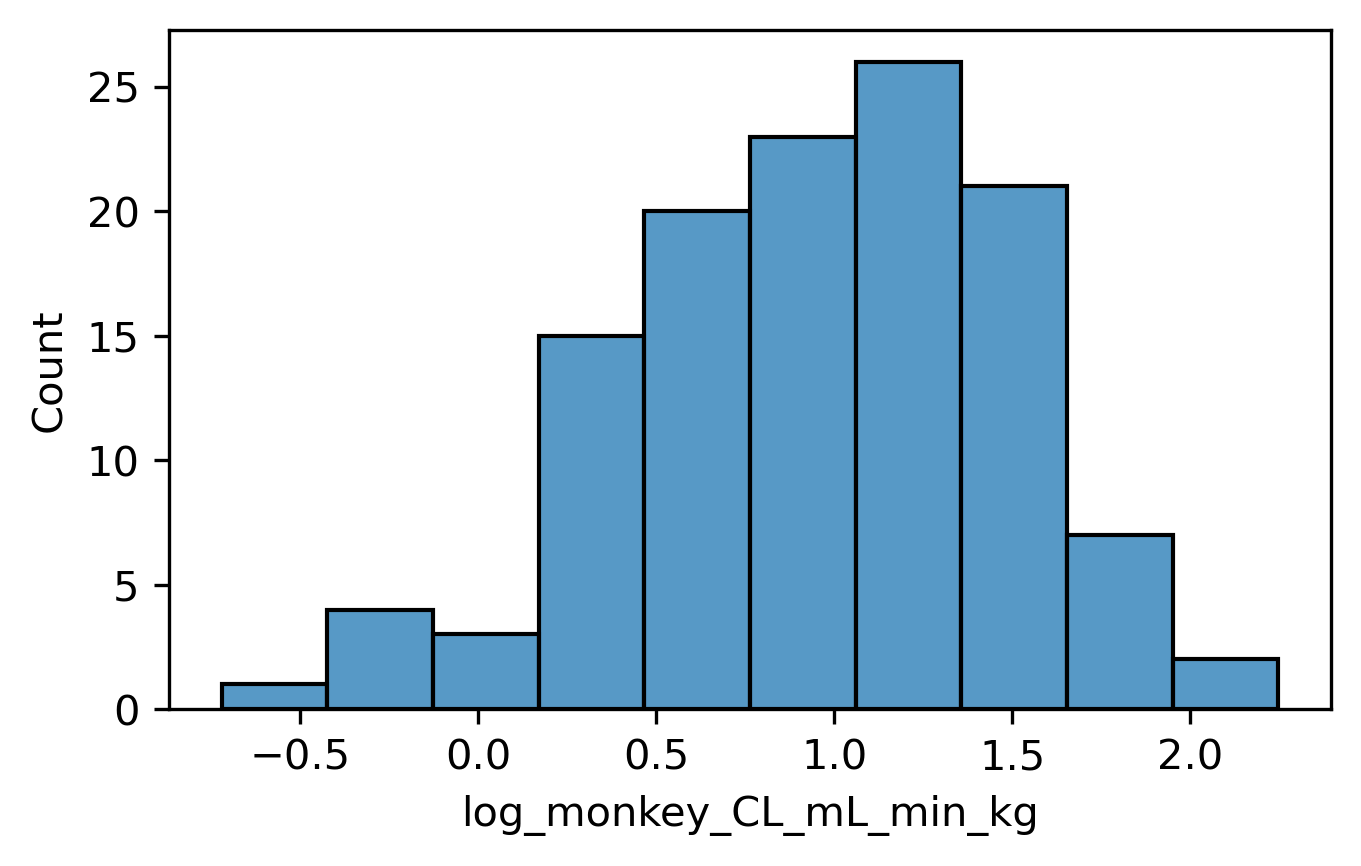

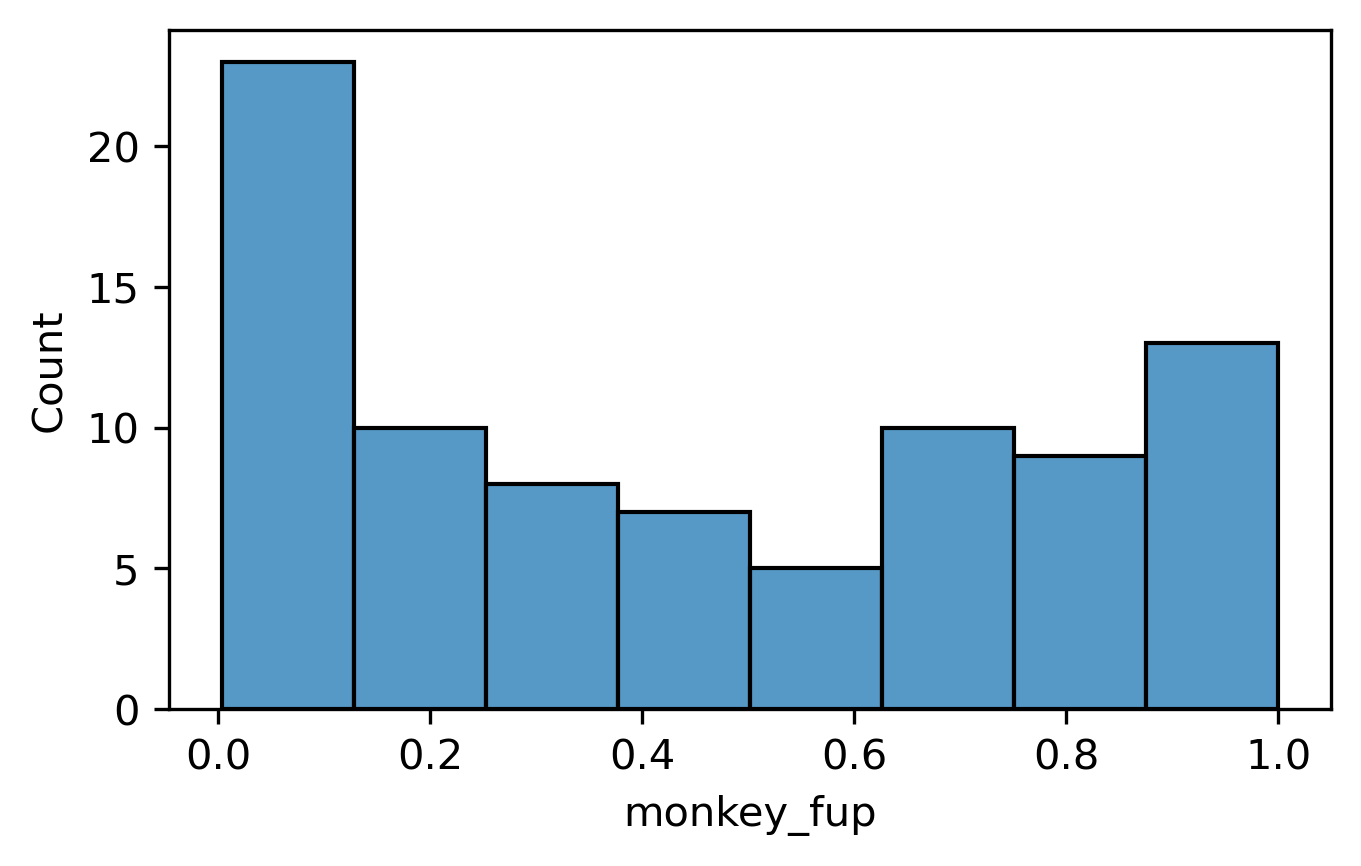

In [30]:
for column in ["monkey_VDss_L_kg" , "monkey_CL_mL_min_kg", "monkey_fup"]:
    
    plt.figure(figsize=(5,3), dpi= 300)
    if (column!="monkey_fup"):
        sns.histplot(data=monkey, x="log_" + column)
    else:
        sns.histplot(data=monkey, x=column)
    plt.show()

In [4]:
import pandas as pd
kegg= pd.read_csv("08_KEGG_DRUG_ATC_PROPERTIES_PED_FP.csv")
kegg = kegg[["KEGG_code", "ATC_label_class","ATC_full_code","BigGroup_ATC_class"]]
kegg = kegg.drop_duplicates().reset_index(drop=True)
kegg

,KEGG_code,ATC_label_class,ATC_full_code,BigGroup_ATC_class
0,D05864,Caries prophylactic agents,A01AA02,ALIMENTARY TRACT AND METABOLISM
1,D05864,Fluoride,A12CD02,ALIMENTARY TRACT AND METABOLISM
2,D05241,Caries prophylactic agents,A01AA03,ALIMENTARY TRACT AND METABOLISM
3,D00008,Antiinfectives and antiseptics for local oral...,A01AB02,ALIMENTARY TRACT AND METABOLISM
4,D00008,Other antiseptics and disinfectants,D08AX01,DERMATOLOGICALS
...,...,...,...,...
5494,D04567,Iodine (131I) compounds,V09XA02,VARIOUS
5495,D02464,Various diagnostic radiopharmaceuticals,V09XX04,VARIOUS
5496,D08504,Various pain palliation radiopharmaceuticals,V10BX02,VARIOUS
5497,D05795,Various pain palliation radiopharmaceuticals,V10BX02,VARIOUS


In [5]:
import pandas as pd
identifiers= pd.read_csv("08_structure_links5_1_9.csv")
identifiers = identifiers[["Drug Groups", "InChI", "KEGG Drug ID" ]]
identifiers = identifiers.drop_duplicates().reset_index(drop=True)
identifiers

,Drug Groups,InChI,KEGG Drug ID
0,approved; investigational,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,D03136
1,approved; investigational,InChI=1S/C59H84N16O12/c1-6-63-57(86)48-14-10-2...,D08113
2,approved,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...,D00573
3,approved,InChI=1S/C96H135N19O16/c1-50(2)36-71(105-79(11...,D04369
4,approved,InChI=1S/C46H64N14O12S2/c47-35(62)15-14-29-40(...,D00291
...,...,...,...
2606,approved; withdrawn,InChI=1S/C24H30Cl2FN3O3/c1-2-33-24(32)22(16-18...,NaN
2607,approved,InChI=1S/C10H14N5O8P/c11-9-14-6-3(7(16)15-9)12...,NaN
2608,approved,InChI=1S/C25H29N3O8/c1-35-24(33)21(17-8-3-2-4-...,NaN
2609,approved; investigational,InChI=1S/C26H24N6O2/c1-16(2)28-24(33)15-34-20-...,D11815


In [6]:
identifiers["Drug Groups"].value_counts()

approved                                                  1049
approved; investigational                                  901
approved; vet_approved                                     138
approved; experimental                                     133
approved; withdrawn                                         84
approved; investigational; vet_approved                     80
approved; investigational; withdrawn                        50
approved; illicit                                           40
approved; nutraceutical                                     35
approved; investigational; nutraceutical                    25
approved; experimental; investigational                     21
approved; illicit; investigational                          12
approved; nutraceutical; vet_approved                       10
approved; vet_approved; withdrawn                            7
approved; illicit; investigational; withdrawn                5
approved; investigational; vet_approved; withdrawn     

In [7]:
ATC= pd.merge(kegg, identifiers, left_on="KEGG_code", right_on="KEGG Drug ID")
ATC = ATC[['BigGroup_ATC_class', 'InChI']]
ATC = ATC.drop_duplicates().reset_index(drop=True)
ATC

,BigGroup_ATC_class,InChI
0,ALIMENTARY TRACT AND METABOLISM,"InChI=1S/FH2O3P.2Na/c1-5(2,3)4;;/h(H2,2,3,4);;..."
1,ALIMENTARY TRACT AND METABOLISM,InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...
2,BLOOD AND BLOOD FORMING ORGANS,InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...
3,DERMATOLOGICALS,InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...
4,RESPIRATORY SYSTEM,InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...
...,...,...
1631,VARIOUS,InChI=1S/C18H23FINO2/c1-23-18(22)17-15(12-3-5-...
1632,VARIOUS,InChI=1S/C20H25FN2O3/c1-22-19-7-4-17(5-8-19)2-...
1633,VARIOUS,InChI=1S/C21H26FNO3/c1-23-20-8-4-18(5-9-20)2-3...
1634,VARIOUS,"InChI=1S/CH6O6P2.2H2O.Tc/c2-8(3,4)1-9(5,6)7;;;..."


In [8]:
ATC.InChI.nunique()

1323

In [35]:
from dimorphite_dl.dimorphite_dl import DimorphiteDL
from rdkit.Chem import AddHs
from rdkit.Chem.MolStandardize import rdMolStandardize

def standardize(smiles):
    # follows the steps in
    # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
    # as described **excellently** (by Greg) in
    # https://www.youtube.com/watch?v=eWTApNX8dJQ
    try: 
        mol = Chem.MolFromSmiles(smiles)
        #print(smiles)
        
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol) 
        #print(Chem.MolToSmiles(clean_mol))
        
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)

        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger() # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)

        #print(uncharged_parent_clean_mol)
        
        # use pH 7.4 https://git.durrantlab.pitt.edu/jdurrant/dimorphite_dl/
        dimorphite = DimorphiteDL(min_ph=7.4, max_ph=7.4, pka_precision=0)
        protonated_smiles = dimorphite.protonate(Chem.MolToSmiles(uncharged_parent_clean_mol))

        #print("protonated_smiles")
        
        if len(protonated_smiles) > 0:
                protonated_smile = protonated_smiles[0]

        protonated_mol = Chem.MolFromSmiles(protonated_smile)
        #protonated_mol= AddHs(protonated_mol)
        #protonated_smile = Chem.MolToSmiles(protonated_mol)


        # attempt is made at reionization at this step
        # at 7.4 pH

        te = rdMolStandardize.TautomerEnumerator() # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(protonated_mol)
     
        return  Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    
    except: 
        
        return "Cannot_do"
    



In [36]:
ATC

,BigGroup_ATC_class,InChI
0,ALIMENTARY TRACT AND METABOLISM,"InChI=1S/FH2O3P.2Na/c1-5(2,3)4;;/h(H2,2,3,4);;..."
1,ALIMENTARY TRACT AND METABOLISM,InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...
2,BLOOD AND BLOOD FORMING ORGANS,InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...
3,DERMATOLOGICALS,InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...
4,RESPIRATORY SYSTEM,InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...
...,...,...
1631,VARIOUS,InChI=1S/C18H23FINO2/c1-23-18(22)17-15(12-3-5-...
1632,VARIOUS,InChI=1S/C20H25FN2O3/c1-22-19-7-4-17(5-8-19)2-...
1633,VARIOUS,InChI=1S/C21H26FNO3/c1-23-20-8-4-18(5-9-20)2-3...
1634,VARIOUS,"InChI=1S/CH6O6P2.2H2O.Tc/c2-8(3,4)1-9(5,6)7;;;..."


In [37]:
df1 = pd.DataFrame(ATC["BigGroup_ATC_class"].value_counts())
df1 = df1
df1 = df1.rename(columns= {"BigGroup_ATC_class": "BigGroup_ATC_class_drugspace"})
df1

,BigGroup_ATC_class_drugspace
NERVOUS SYSTEM,260
CARDIOVASCULAR SYSTEM,193
ANTIINFECTIVES FOR SYSTEMIC USE,177
ALIMENTARY TRACT AND METABOLISM,166
DERMATOLOGICALS,137
ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,132
SENSORY ORGANS,131
GENITO URINARY SYSTEM AND SEX HORMONES,104
RESPIRATORY SYSTEM,100
VARIOUS,63


In [38]:
len(ATC.InChI.unique())

1324

In [39]:
import pandas as pd
from rdkit.Chem import inchi
from rdkit import Chem
from molvs import Standardizer
s = Standardizer()

def make_SMILES_from_InChI(value):
    try: return Chem.MolToSmiles(Chem.MolFromInchi(value))
    except: return "Cannot_do"
    
def make_StdInChI_from_SMILES(value):
    try: return Chem.MolToInchi(s.standardize(Chem.MolFromSmiles(value)))
    except: return "Cannot_do"
    
def make_StdInChI_from_Inchi(value):
    try: return Chem.MolToInchi(s.standardize(Chem.MolFromInchi(value)))
    except: return "Cannot_do"
    
from pandarallel import pandarallel
pandarallel.initialize()

ATC['smiles']= ATC['InChI'].parallel_apply(make_SMILES_from_InChI) 
ATC['smiles_r']= ATC['smiles'].parallel_apply(standardize) 

#human_lombardo['StdInChI']= human_lombardo['smiles_r'].parallel_apply(make_StdInChI_from_SMILES) 
#animal['StdInChI']= animal['smiles_r'].parallel_apply(make_StdInChI_from_SMILES) 


INFO: Pandarallel will run on 76 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [40]:
#ATC['StdInChI']= ATC['InChI'].parallel_apply(make_StdInChI_from_Inchi) 
ATC

,BigGroup_ATC_class,InChI,smiles,smiles_r
0,ALIMENTARY TRACT AND METABOLISM,"InChI=1S/FH2O3P.2Na/c1-5(2,3)4;;/h(H2,2,3,4);;...",O=P([O-])([O-])F.[Na+].[Na+],O=P(O)(O)F
1,ALIMENTARY TRACT AND METABOLISM,InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...,N=C(NCCCCCCNC(=N)NC(=N)Nc1ccc(Cl)cc1)NC(=N)Nc1...,[NH2+]=C(NCCCCCCNC(=[NH2+])NC(=[NH2+])Nc1ccc(C...
2,BLOOD AND BLOOD FORMING ORGANS,InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...,N=C(NCCCCCCNC(=N)NC(=N)Nc1ccc(Cl)cc1)NC(=N)Nc1...,[NH2+]=C(NCCCCCCNC(=[NH2+])NC(=[NH2+])Nc1ccc(C...
3,DERMATOLOGICALS,InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...,N=C(NCCCCCCNC(=N)NC(=N)Nc1ccc(Cl)cc1)NC(=N)Nc1...,[NH2+]=C(NCCCCCCNC(=[NH2+])NC(=[NH2+])Nc1ccc(C...
4,RESPIRATORY SYSTEM,InChI=1S/C22H30Cl2N10/c23-15-5-9-17(10-6-15)31...,N=C(NCCCCCCNC(=N)NC(=N)Nc1ccc(Cl)cc1)NC(=N)Nc1...,[NH2+]=C(NCCCCCCNC(=[NH2+])NC(=[NH2+])Nc1ccc(C...
...,...,...,...,...
1631,VARIOUS,InChI=1S/C18H23FINO2/c1-23-18(22)17-15(12-3-5-...,COC(=O)[C@H]1[C@@H](c2ccc([123I])cc2)C[C@@H]2C...,COC(=O)C1[C@@H](c2ccc([123I])cc2)C[C@@H]2CC[C@...
1632,VARIOUS,InChI=1S/C20H25FN2O3/c1-22-19-7-4-17(5-8-19)2-...,CNc1ccc(/C=C/c2ccc(OCCOCCOCC[18F])nc2)cc1,CNc1ccc(C=Cc2ccc(OCCOCCOCC[18F])nc2)cc1
1633,VARIOUS,InChI=1S/C21H26FNO3/c1-23-20-8-4-18(5-9-20)2-3...,CNc1ccc(/C=C/c2ccc(OCCOCCOCC[18F])cc2)cc1,CNc1ccc(C=Cc2ccc(OCCOCCOCC[18F])cc2)cc1
1634,VARIOUS,"InChI=1S/CH6O6P2.2H2O.Tc/c2-8(3,4)1-9(5,6)7;;;...",O.O.O=P([O-])([O-])CP(=O)([O-])[O-].[99Tc+4],O=P([O-])([O-])CP(=O)([O-])[O-]


In [41]:
#human_training_ATC=pd.merge(ATC, human_lombardo, left_on="StdInChI", right_on="StdInChI")
human_training_ATC=pd.merge(ATC, human_lombardo, left_on="smiles_r", right_on="smiles_r")
human_training_ATC

,BigGroup_ATC_class,InChI,smiles,smiles_r,human_VDss_L_kg,human_CL_mL_min_kg,human_fup,human_mrt,human_thalf,log_human_VDss_L_kg,log_human_CL_mL_min_kg,log_human_mrt,log_human_thalf,molecular_weight_smiles_r,clogP,TPSA
0,ALIMENTARY TRACT AND METABOLISM,InChI=1S/C18H14Cl4N2O/c19-13-2-1-12(16(21)7-13...,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,7.14,9.48,0.08,12.55,19.75,0.853698,0.976808,1.098644,1.295567,413.986024,6.4548,27.05
1,DERMATOLOGICALS,InChI=1S/C18H14Cl4N2O/c19-13-2-1-12(16(21)7-13...,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,7.14,9.48,0.08,12.55,19.75,0.853698,0.976808,1.098644,1.295567,413.986024,6.4548,27.05
2,GENITO URINARY SYSTEM AND SEX HORMONES,InChI=1S/C18H14Cl4N2O/c19-13-2-1-12(16(21)7-13...,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,7.14,9.48,0.08,12.55,19.75,0.853698,0.976808,1.098644,1.295567,413.986024,6.4548,27.05
3,ANTIINFECTIVES FOR SYSTEMIC USE,InChI=1S/C18H14Cl4N2O/c19-13-2-1-12(16(21)7-13...,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,7.14,9.48,0.08,12.55,19.75,0.853698,0.976808,1.098644,1.295567,413.986024,6.4548,27.05
4,SENSORY ORGANS,InChI=1S/C18H14Cl4N2O/c19-13-2-1-12(16(21)7-13...,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,7.14,9.48,0.08,12.55,19.75,0.853698,0.976808,1.098644,1.295567,413.986024,6.4548,27.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,VARIOUS,InChI=1S/C11H9I3N2O4/c1-3(17)15-9-6(12)5(11(19...,CC(O)=Nc1c(I)c(N=C(C)O)c(I)c(C(=O)O)c1I,CC(=O)Nc1c(I)c(NC(C)=O)c(I)c(C(=O)[O-])c1I,0.26,1.70,1.00,2.60,1.80,-0.585027,0.230449,0.414973,0.255273,612.762374,1.7807,98.33
549,VARIOUS,InChI=1S/C11H9I3N2O4/c1-3(17)16-9-7(13)4(10(18...,CN=C(O)c1c(I)c(N=C(C)O)c(I)c(C(=O)O)c1I,CNC(=O)c1c(I)c(NC(C)=O)c(I)c(C(=O)[O-])c1I,0.17,2.40,0.98,1.20,1.30,-0.769551,0.380211,0.079181,0.113943,612.762374,1.1819,98.33
550,VARIOUS,InChI=1S/C19H26I3N3O9/c1-8(29)25(4-11(32)7-28)...,CC(=O)N(CC(O)CO)c1c(I)c(C(O)=NCC(O)CO)c(I)c(C(...,CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(...,0.16,2.00,1.00,1.30,1.50,-0.795880,0.301030,0.113943,0.176091,820.880323,-1.6275,199.89
551,VARIOUS,InChI=1S/C17H22I3N3O8/c1-6(28)15(29)23-14-12(1...,C[C@H](O)C(O)=Nc1c(I)c(C(O)=NC(CO)CO)c(I)c(C(O...,CC(O)C(=O)Nc1c(I)c(C(=O)NC(CO)CO)c(I)c(C(=O)NC...,0.28,1.90,1.00,2.50,2.10,-0.552842,0.278754,0.397940,0.322219,776.854109,-1.0143,188.45


In [42]:
human_training_ATC.sort_values("BigGroup_ATC_class")

,BigGroup_ATC_class,InChI,smiles,smiles_r,human_VDss_L_kg,human_CL_mL_min_kg,human_fup,human_mrt,human_thalf,log_human_VDss_L_kg,log_human_CL_mL_min_kg,log_human_mrt,log_human_thalf,molecular_weight_smiles_r,clogP,TPSA
0,ALIMENTARY TRACT AND METABOLISM,InChI=1S/C18H14Cl4N2O/c19-13-2-1-12(16(21)7-13...,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,7.14,9.48,0.08,12.55,19.75,0.853698,0.976808,1.098644,1.295567,413.986024,6.4548,27.05
71,ALIMENTARY TRACT AND METABOLISM,InChI=1S/C22H29FO5/c1-12-8-16-15-5-4-13-9-14(2...,C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@...,C[C@H]1C[C@H]2[C@@H]3CC=C4CC(=O)C=C[C@]4(C)[C@...,1.30,2.80,0.36,7.90,5.60,0.113943,0.447158,0.897627,0.748188,392.199902,1.8957,94.83
69,ALIMENTARY TRACT AND METABOLISM,InChI=1S/C21H26O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2C(=O)C[C@@]...,C[C@]12C=CC(=O)C=C1CC[C@@H]1C2C(=O)C[C@@]2(C)[...,0.57,2.50,0.27,3.80,2.90,-0.244125,0.397940,0.579784,0.462398,358.178024,1.7658,91.67
63,ALIMENTARY TRACT AND METABOLISM,InChI=1S/C21H28O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[...,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[...,0.86,2.90,0.25,4.80,3.40,-0.065502,0.462398,0.681241,0.531479,360.193674,1.5576,94.83
62,ALIMENTARY TRACT AND METABOLISM,InChI=1S/C16H23N5O/c1-3-4-5-8-18-16(17)21-20-1...,CCCCCNC(=N)N/N=C/c1c[nH]c2ccc(OC)cc12,CCCCCNC(=[NH2+])NN=Cc1c[nH]c2ccc(OC)cc12,5.30,18.00,0.02,4.90,11.00,0.724276,1.255273,0.690196,1.041393,302.197537,0.9949,87.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,VARIOUS,InChI=1S/C15H14FN3O3/c1-3-22-15(21)13-12-7-18(...,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CCOC(=O)c1ncn2c1C[NH+](C)C(=O)c1cc(F)ccc1-2,0.80,16.00,0.58,1.00,0.78,-0.096910,1.204120,0.000000,-0.107905,304.109196,0.3566,65.63
542,VARIOUS,InChI=1S/C19H21NO4/c1-2-8-20-9-7-18-15-11-3-4-...,C=CCN1CC[C@]23c4c5ccc(O)c4O[C@H]2C(=O)CC[C@@]3...,C=CC[NH+]1CC[C@]23c4c5ccc([O-])c4OC2C(=O)CC[C@...,1.70,23.00,0.54,1.20,1.10,0.230449,1.361728,0.079181,0.041393,327.147058,-0.7477,74.03
533,VARIOUS,"InChI=1S/C5H9NO3S/c1-3(7)6-4(2-10)5(8)9/h4,10H...",CC(O)=N[C@@H](CS)C(=O)O,CC(=O)NC(CS)C(=O)[O-],0.55,3.10,0.17,3.00,5.50,-0.259637,0.491362,0.477121,0.740363,162.023038,-1.8292,69.23
545,VARIOUS,InChI=1S/C25H48N6O8/c1-21(32)29(37)18-9-3-6-16...,CC(=O)N(O)CCCCCN=C(O)CCC(=O)N(O)CCCCCN=C(O)CCC...,CC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCNC(=O)CCC...,1.35,8.33,NaN,2.70,3.05,0.130334,0.920645,0.431364,0.484300,561.360639,0.2053,207.46


In [43]:
df = pd.DataFrame(human_training_ATC["BigGroup_ATC_class"].value_counts())
df = df
df = df.rename(columns= {"BigGroup_ATC_class": "BigGroup_ATC_class_human"})
df

,BigGroup_ATC_class_human
NERVOUS SYSTEM,115
ANTIINFECTIVES FOR SYSTEMIC USE,78
CARDIOVASCULAR SYSTEM,72
ALIMENTARY TRACT AND METABOLISM,52
ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,43
SENSORY ORGANS,38
RESPIRATORY SYSTEM,32
GENITO URINARY SYSTEM AND SEX HORMONES,31
DERMATOLOGICALS,30
MUSCULO-SKELETAL SYSTEM,25


In [44]:
animal_training_ATC=pd.merge(ATC, animal, left_on="smiles_r", right_on="smiles_r")
animal_training_ATC

,BigGroup_ATC_class,InChI,smiles,smiles_r,CHEMISTRY,NAME,human_CL_mL_min_kg,rat_CL_mL_min_kg,dog_CL_mL_min_kg,monkey_CL_mL_min_kg,...,dog_VDss_L_kg,monkey_VDss_L_kg,human_fup,rat_fup,dog_fup,monkey_fup,InChICode_standardised,molecular_weight_smiles_r,clogP,TPSA
0,ALIMENTARY TRACT AND METABOLISM,InChI=1S/C6H9N3O3/c1-5-7-4-6(9(11)12)8(5)2-3-1...,Cc1ncc([N+](=O)[O-])n1CCO,Cc1ncc([N+](=O)[O-])n1CCO,OCCn1c(C)ncc1[N+]([O-])=O,Metronidazole,0.85,5.8,2.5,NaN,...,0.10,NaN,0.96,0.96,0.9832,NaN,InChI=1S/C6H9N3O3/c1-5-7-4-6(9(11)12)8(5)2-3-1...,171.064391,0.09202,81.19
1,DERMATOLOGICALS,InChI=1S/C6H9N3O3/c1-5-7-4-6(9(11)12)8(5)2-3-1...,Cc1ncc([N+](=O)[O-])n1CCO,Cc1ncc([N+](=O)[O-])n1CCO,OCCn1c(C)ncc1[N+]([O-])=O,Metronidazole,0.85,5.8,2.5,NaN,...,0.10,NaN,0.96,0.96,0.9832,NaN,InChI=1S/C6H9N3O3/c1-5-7-4-6(9(11)12)8(5)2-3-1...,171.064391,0.09202,81.19
2,GENITO URINARY SYSTEM AND SEX HORMONES,InChI=1S/C6H9N3O3/c1-5-7-4-6(9(11)12)8(5)2-3-1...,Cc1ncc([N+](=O)[O-])n1CCO,Cc1ncc([N+](=O)[O-])n1CCO,OCCn1c(C)ncc1[N+]([O-])=O,Metronidazole,0.85,5.8,2.5,NaN,...,0.10,NaN,0.96,0.96,0.9832,NaN,InChI=1S/C6H9N3O3/c1-5-7-4-6(9(11)12)8(5)2-3-1...,171.064391,0.09202,81.19
3,ANTIINFECTIVES FOR SYSTEMIC USE,InChI=1S/C6H9N3O3/c1-5-7-4-6(9(11)12)8(5)2-3-1...,Cc1ncc([N+](=O)[O-])n1CCO,Cc1ncc([N+](=O)[O-])n1CCO,OCCn1c(C)ncc1[N+]([O-])=O,Metronidazole,0.85,5.8,2.5,NaN,...,0.10,NaN,0.96,0.96,0.9832,NaN,InChI=1S/C6H9N3O3/c1-5-7-4-6(9(11)12)8(5)2-3-1...,171.064391,0.09202,81.19
4,"ANTIPARASITIC PRODUCTS, INSECTICIDES AND REPEL...",InChI=1S/C6H9N3O3/c1-5-7-4-6(9(11)12)8(5)2-3-1...,Cc1ncc([N+](=O)[O-])n1CCO,Cc1ncc([N+](=O)[O-])n1CCO,OCCn1c(C)ncc1[N+]([O-])=O,Metronidazole,0.85,5.8,2.5,NaN,...,0.10,NaN,0.96,0.96,0.9832,NaN,InChI=1S/C6H9N3O3/c1-5-7-4-6(9(11)12)8(5)2-3-1...,171.064391,0.09202,81.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,RESPIRATORY SYSTEM,InChI=1S/C10H14N4O4/c1-12-8-7(9(17)13(2)10(12)...,Cn1c(=O)c2c(ncn2CC(O)CO)n(C)c1=O,Cn1c(=O)c2c(ncn2CC(O)CO)n(C)c1=O,OCC(O)Cn(cn1)c(c12)c(=O)n(C)c(=O)n2C,Diprophylline,4.80,24.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C10H14N4O4/c1-12-8-7(9(17)13(2)10(12)...,254.101505,-2.21310,102.28
231,RESPIRATORY SYSTEM,InChI=1S/C18H21NO3/c1-19-8-7-18-11-4-5-13(20)1...,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,[C@@]123[C@@H]4[C@@H](O)C=C[C@H]2[C@H](N(C)CC3...,Codeine,15.00,103.3,NaN,NaN,...,NaN,NaN,0.70,0.92,NaN,NaN,InChI=1S/C18H21NO3/c1-19-8-7-18-11-4-5-13(20)1...,300.159420,0.08400,43.13
232,SENSORY ORGANS,InChI=1S/C4H6N4O3S2/c1-2(9)6-3-7-8-4(12-3)13(5...,CC(O)=Nc1nnc(S(N)(=O)=O)s1,CC(=O)Nc1nnc(S(N)(=O)=O)s1,O=S(=O)(N)c1sc(nn1)NC(=O)C,Acetazolamide,0.65,68.0,NaN,NaN,...,NaN,NaN,0.04,0.20,NaN,NaN,InChI=1S/C4H6N4O3S2/c1-2(9)6-3-7-8-4(12-3)13(5...,221.988132,-0.85610,115.04
233,VARIOUS,InChI=1S/C15H14FN3O3/c1-3-22-15(21)13-12-7-18(...,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2,CCOC(=O)c1ncn2c1C[NH+](C)C(=O)c1cc(F)ccc1-2,c1cc(F)cc(c12)C(=O)N(C)Cc3n2cnc3C(=O)OCC,Flumazenil,16.00,147.0,16.0,NaN,...,1.00,NaN,0.58,NaN,0.6848,NaN,InChI=1S/C15H14FN3O3/c1-3-22-15(21)13-12-7-18(...,304.109196,0.35660,65.63


In [45]:
df3 = pd.DataFrame(animal_training_ATC["BigGroup_ATC_class"].value_counts())
df3 = df3
df3 = df3.rename(columns= {"BigGroup_ATC_class": "BigGroup_ATC_class_animal"})
df3

,BigGroup_ATC_class_animal
NERVOUS SYSTEM,56
ANTIINFECTIVES FOR SYSTEMIC USE,40
CARDIOVASCULAR SYSTEM,33
SENSORY ORGANS,18
DERMATOLOGICALS,14
ALIMENTARY TRACT AND METABOLISM,13
ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,13
RESPIRATORY SYSTEM,12
MUSCULO-SKELETAL SYSTEM,12
GENITO URINARY SYSTEM AND SEX HORMONES,11


In [46]:
final = pd.concat([df1, df, df3], axis=1)
final = final.reset_index()
final

,index,BigGroup_ATC_class_drugspace,BigGroup_ATC_class_human,BigGroup_ATC_class_animal
0,NERVOUS SYSTEM,260,115,56
1,CARDIOVASCULAR SYSTEM,193,72,33
2,ANTIINFECTIVES FOR SYSTEMIC USE,177,78,40
3,ALIMENTARY TRACT AND METABOLISM,166,52,13
4,DERMATOLOGICALS,137,30,14
5,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,132,43,13
6,SENSORY ORGANS,131,38,18
7,GENITO URINARY SYSTEM AND SEX HORMONES,104,31,11
8,RESPIRATORY SYSTEM,100,32,12
9,VARIOUS,63,12,2


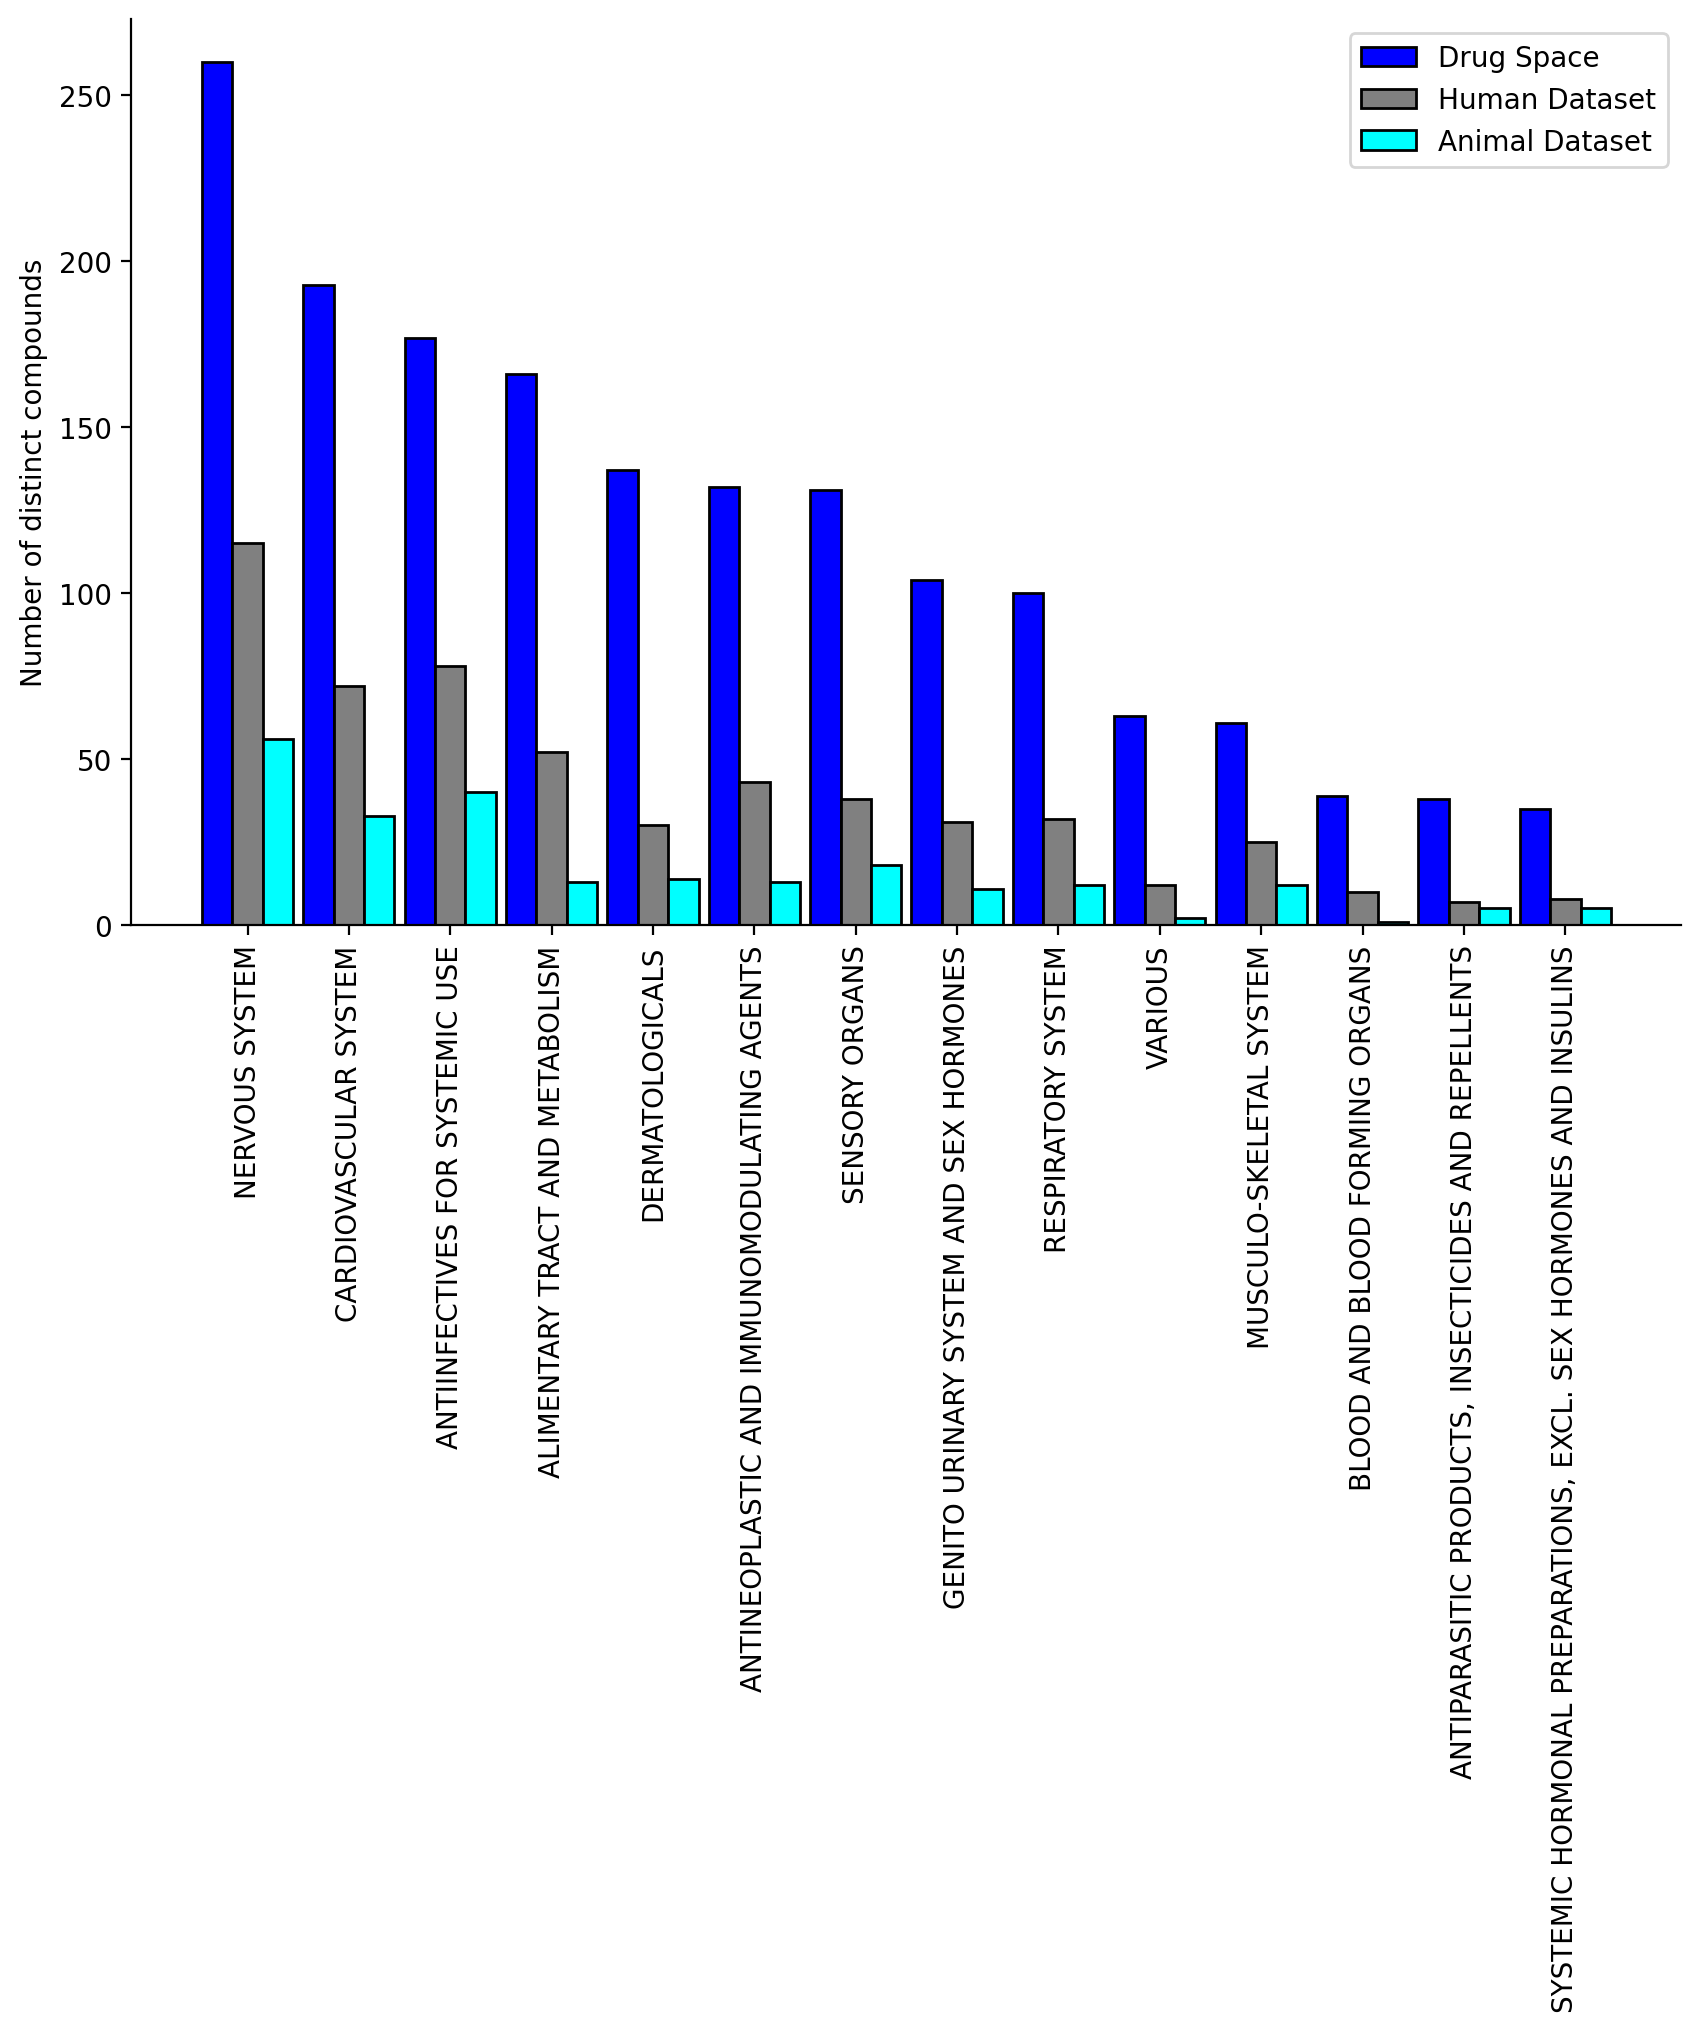

In [47]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi=200) 
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = final.BigGroup_ATC_class_drugspace
 
# Choose the height of the cyan bars
bars2 = final.BigGroup_ATC_class_human
bars3 = final.BigGroup_ATC_class_animal
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black',  capsize=7, label='Drug Space')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'grey', edgecolor = 'black', capsize=7, label='Human Dataset')
plt.bar(r3, bars3, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='Animal Dataset') 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], final["index"])
plt.xticks(rotation=90)
plt.ylabel('Number of distinct compounds')
plt.legend()
 
# Show graphic
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [48]:
#Plot Chemical space

In [49]:
identifiers

,Drug Groups,InChI,KEGG Drug ID
0,approved; investigational,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,D03136
1,approved; investigational,InChI=1S/C59H84N16O12/c1-6-63-57(86)48-14-10-2...,D08113
2,approved,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...,D00573
3,approved,InChI=1S/C96H135N19O16/c1-50(2)36-71(105-79(11...,D04369
4,approved,InChI=1S/C46H64N14O12S2/c47-35(62)15-14-29-40(...,D00291
...,...,...,...
2606,approved; withdrawn,InChI=1S/C24H30Cl2FN3O3/c1-2-33-24(32)22(16-18...,NaN
2607,approved,InChI=1S/C10H14N5O8P/c11-9-14-6-3(7(16)15-9)12...,NaN
2608,approved,InChI=1S/C25H29N3O8/c1-35-24(33)21(17-8-3-2-4-...,NaN
2609,approved; investigational,InChI=1S/C26H24N6O2/c1-16(2)28-24(33)15-34-20-...,D11815


In [50]:
from molvs import standardize_smiles
import pandas as pd
from rdkit.Chem import inchi
from rdkit import Chem

def standardized_smiles_from_inchi(value):
    #print(value)
    try: return Chem.MolToSmiles(Chem.MolFromInchi(value))
    except: return "Cannot_do"
    

from pandarallel import pandarallel
pandarallel.initialize()
identifiers['smiles']=identifiers['InChI'].parallel_apply(standardized_smiles_from_inchi)  

INFO: Pandarallel will run on 76 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [51]:
identifiers = identifiers[identifiers['smiles']!="Cannot_do"]

In [52]:
identifiers["smiles_r"] = identifiers["smiles"].parallel_apply(standardize)    
identifiers

/tmp/ipykernel_4094595/1244689641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  identifiers["smiles_r"] = identifiers["smiles"].parallel_apply(standardize)


,Drug Groups,InChI,KEGG Drug ID,smiles,smiles_r
0,approved; investigational,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,D03136,CC[C@H](C)[C@H](N=C(O)[C@H](CCC(=O)O)N=C(O)[C@...,CC[C@H](C)C(N=C(O)[C@H](CCC(=O)[O-])N=C(O)[C@H...
1,approved; investigational,InChI=1S/C59H84N16O12/c1-6-63-57(86)48-14-10-2...,D08113,CCN=C(O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)N=C(...,CCN=C(O)[C@@H]1CCC[NH+]1C(=O)C(CCCNC(N)=[NH2+]...
2,approved,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...,D00573,CC(C)C[C@H](N=C(O)[C@@H](COC(C)(C)C)N=C(O)[C@H...,CC(C)CC(N=C(O)[C@@H](COC(C)(C)C)N=C(O)C(Cc1ccc...
3,approved,InChI=1S/C96H135N19O16/c1-50(2)36-71(105-79(11...,D04369,CC(C)C[C@@H](N=C(O)CN=C(O)[C@@H](N=CO)C(C)C)C(...,CC(C)CC(N=C(O)[C@H](Cc1c[nH]c2ccccc12)N=C(O)C(...
4,approved,InChI=1S/C46H64N14O12S2/c47-35(62)15-14-29-40(...,D00291,N=C(O)CC[C@@H]1N=C(O)[C@H](Cc2ccccc2)N=C(O)[C@...,N=C(O)CC1N=C(O)C(CCC(N)=O)N=C(O)C(Cc2ccccc2)N=...
...,...,...,...,...,...
2606,approved; withdrawn,InChI=1S/C24H30Cl2FN3O3/c1-2-33-24(32)22(16-18...,NaN,CCOC(=O)[C@H](Cc1ccc(F)cc1)N=C(O)[C@@H](N)Cc1c...,CCOC(=O)C(Cc1ccc(F)cc1)NC(=O)C([NH3+])Cc1ccc(N...
2607,approved,InChI=1S/C10H14N5O8P/c11-9-14-6-3(7(16)15-9)12...,NaN,N=c1nc(O)c2c([nH]1)N[C@@H]1O[C@@H]3COP(=O)(O)O...,N=c1nc([O-])c2c([n-]1)[NH2+][C@@H]1O[C@@H]3COP...
2608,approved,InChI=1S/C25H29N3O8/c1-35-24(33)21(17-8-3-2-4-...,NaN,COC(=O)[C@H](c1ccccc1)[C@H]1CCCCN1C(=O)OC[n+]1...,COC(=O)C(c1ccccc1)[C@H]1CCCC[NH+]1C(=O)OC[n+]1...
2609,approved; investigational,InChI=1S/C26H24N6O2/c1-16(2)28-24(33)15-34-20-...,D11815,CC(C)N=C(O)COc1cccc(-c2nc(Nc3ccc4n[nH]cc4c3)c3...,CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4n[n-]cc4c3)c3...


In [53]:
identifiers= identifiers[identifiers["smiles_r"]!="Cannot_do"]

In [54]:
identifiers

,Drug Groups,InChI,KEGG Drug ID,smiles,smiles_r
0,approved; investigational,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,D03136,CC[C@H](C)[C@H](N=C(O)[C@H](CCC(=O)O)N=C(O)[C@...,CC[C@H](C)C(N=C(O)[C@H](CCC(=O)[O-])N=C(O)[C@H...
1,approved; investigational,InChI=1S/C59H84N16O12/c1-6-63-57(86)48-14-10-2...,D08113,CCN=C(O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)N=C(...,CCN=C(O)[C@@H]1CCC[NH+]1C(=O)C(CCCNC(N)=[NH2+]...
2,approved,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...,D00573,CC(C)C[C@H](N=C(O)[C@@H](COC(C)(C)C)N=C(O)[C@H...,CC(C)CC(N=C(O)[C@@H](COC(C)(C)C)N=C(O)C(Cc1ccc...
3,approved,InChI=1S/C96H135N19O16/c1-50(2)36-71(105-79(11...,D04369,CC(C)C[C@@H](N=C(O)CN=C(O)[C@@H](N=CO)C(C)C)C(...,CC(C)CC(N=C(O)[C@H](Cc1c[nH]c2ccccc12)N=C(O)C(...
4,approved,InChI=1S/C46H64N14O12S2/c47-35(62)15-14-29-40(...,D00291,N=C(O)CC[C@@H]1N=C(O)[C@H](Cc2ccccc2)N=C(O)[C@...,N=C(O)CC1N=C(O)C(CCC(N)=O)N=C(O)C(Cc2ccccc2)N=...
...,...,...,...,...,...
2606,approved; withdrawn,InChI=1S/C24H30Cl2FN3O3/c1-2-33-24(32)22(16-18...,NaN,CCOC(=O)[C@H](Cc1ccc(F)cc1)N=C(O)[C@@H](N)Cc1c...,CCOC(=O)C(Cc1ccc(F)cc1)NC(=O)C([NH3+])Cc1ccc(N...
2607,approved,InChI=1S/C10H14N5O8P/c11-9-14-6-3(7(16)15-9)12...,NaN,N=c1nc(O)c2c([nH]1)N[C@@H]1O[C@@H]3COP(=O)(O)O...,N=c1nc([O-])c2c([n-]1)[NH2+][C@@H]1O[C@@H]3COP...
2608,approved,InChI=1S/C25H29N3O8/c1-35-24(33)21(17-8-3-2-4-...,NaN,COC(=O)[C@H](c1ccccc1)[C@H]1CCCCN1C(=O)OC[n+]1...,COC(=O)C(c1ccccc1)[C@H]1CCCC[NH+]1C(=O)OC[n+]1...
2609,approved; investigational,InChI=1S/C26H24N6O2/c1-16(2)28-24(33)15-34-20-...,D11815,CC(C)N=C(O)COc1cccc(-c2nc(Nc3ccc4n[nH]cc4c3)c3...,CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4n[n-]cc4c3)c3...


In [55]:
from rdkit.Chem import Descriptors

def mol_wt(smiles_r):
    
    try: 
        
        m = Descriptors.ExactMolWt(Chem.MolFromSmiles(smiles_r))
        return(m)
    
    except:
        
        return("failed")

In [56]:
identifiers["molecular_weight_smiles_r"] = identifiers["smiles_r"].apply(mol_wt)
identifiers

,Drug Groups,InChI,KEGG Drug ID,smiles,smiles_r,molecular_weight_smiles_r
0,approved; investigational,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,D03136,CC[C@H](C)[C@H](N=C(O)[C@H](CCC(=O)O)N=C(O)[C@...,CC[C@H](C)C(N=C(O)[C@H](CCC(=O)[O-])N=C(O)[C@H...,2176.971260
1,approved; investigational,InChI=1S/C59H84N16O12/c1-6-63-57(86)48-14-10-2...,D08113,CCN=C(O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)N=C(...,CCN=C(O)[C@@H]1CCC[NH+]1C(=O)C(CCCNC(N)=[NH2+]...,1208.645462
2,approved,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...,D00573,CC(C)C[C@H](N=C(O)[C@@H](COC(C)(C)C)N=C(O)[C@H...,CC(C)CC(N=C(O)[C@@H](COC(C)(C)C)N=C(O)C(Cc1ccc...,1269.648716
3,approved,InChI=1S/C96H135N19O16/c1-50(2)36-71(105-79(11...,D04369,CC(C)C[C@@H](N=C(O)CN=C(O)[C@@H](N=CO)C(C)C)C(...,CC(C)CC(N=C(O)[C@H](Cc1c[nH]c2ccccc12)N=C(O)C(...,1810.033419
4,approved,InChI=1S/C46H64N14O12S2/c47-35(62)15-14-29-40(...,D00291,N=C(O)CC[C@@H]1N=C(O)[C@H](Cc2ccccc2)N=C(O)[C@...,N=C(O)CC1N=C(O)C(CCC(N)=O)N=C(O)C(Cc2ccccc2)N=...,1069.434232
...,...,...,...,...,...,...
2606,approved; withdrawn,InChI=1S/C24H30Cl2FN3O3/c1-2-33-24(32)22(16-18...,NaN,CCOC(=O)[C@H](Cc1ccc(F)cc1)N=C(O)[C@@H](N)Cc1c...,CCOC(=O)C(Cc1ccc(F)cc1)NC(=O)C([NH3+])Cc1ccc(N...,498.172102
2607,approved,InChI=1S/C10H14N5O8P/c11-9-14-6-3(7(16)15-9)12...,NaN,N=c1nc(O)c2c([nH]1)N[C@@H]1O[C@@H]3COP(=O)(O)O...,N=c1nc([O-])c2c([n-]1)[NH2+][C@@H]1O[C@@H]3COP...,362.050723
2608,approved,InChI=1S/C25H29N3O8/c1-35-24(33)21(17-8-3-2-4-...,NaN,COC(=O)[C@H](c1ccccc1)[C@H]1CCCCN1C(=O)OC[n+]1...,COC(=O)C(c1ccccc1)[C@H]1CCCC[NH+]1C(=O)OC[n+]1...,500.202741
2609,approved; investigational,InChI=1S/C26H24N6O2/c1-16(2)28-24(33)15-34-20-...,D11815,CC(C)N=C(O)COc1cccc(-c2nc(Nc3ccc4n[nH]cc4c3)c3...,CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4n[n-]cc4c3)c3...,451.188798


In [57]:
identifiers[identifiers["molecular_weight_smiles_r"]=="failed"]

,Drug Groups,InChI,KEGG Drug ID,smiles,smiles_r,molecular_weight_smiles_r


In [58]:
print(identifiers["molecular_weight_smiles_r"].mean())
print(identifiers["molecular_weight_smiles_r"].std())

378.46829717739234
359.9669464750786


In [59]:
limit = identifiers["molecular_weight_smiles_r"].mean() + 1.5*identifiers["molecular_weight_smiles_r"].std()
limit

918.4187168900103

In [60]:
identifiers_filtered= identifiers[identifiers["molecular_weight_smiles_r"]<limit].reset_index(drop=True)
identifiers_filtered

,Drug Groups,InChI,KEGG Drug ID,smiles,smiles_r,molecular_weight_smiles_r
0,approved; investigational; nutraceutical,InChI=1S/C8H10NO6P/c1-5-8(11)7(3-10)6(2-9-5)4-...,D00006,Cc1ncc(COP(=O)(O)O)c(C=O)c1O,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-],244.002744
1,approved; investigational; nutraceutical,InChI=1S/C15H22N6O5S/c1-27(3-2-7(16)15(24)25)4...,NaN,C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...,399.144515
2,approved; investigational; nutraceutical,"InChI=1S/C3H4O3/c1-2(4)3(5)6/h1H3,(H,5,6)",NaN,CC(=O)C(=O)O,CC(=O)C(=O)[O-],87.008768
3,approved; investigational; nutraceutical,InChI=1S/C9H11NO2/c10-8(9(11)12)6-7-4-2-1-3-5-...,D00021,N[C@@H](Cc1ccccc1)C(=O)O,[NH3+]C(Cc1ccccc1)C(=O)[O-],165.078979
4,approved; investigational; nutraceutical,InChI=1S/C10H16N2O3S/c13-8(14)4-2-1-3-7-9-6(5-...,D00029,O=C(O)CCCC[C@@H]1SC[C@@H]2N=C(O)N[C@@H]21,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21,244.088163
...,...,...,...,...,...,...
2465,approved; withdrawn,InChI=1S/C24H30Cl2FN3O3/c1-2-33-24(32)22(16-18...,NaN,CCOC(=O)[C@H](Cc1ccc(F)cc1)N=C(O)[C@@H](N)Cc1c...,CCOC(=O)C(Cc1ccc(F)cc1)NC(=O)C([NH3+])Cc1ccc(N...,498.172102
2466,approved,InChI=1S/C10H14N5O8P/c11-9-14-6-3(7(16)15-9)12...,NaN,N=c1nc(O)c2c([nH]1)N[C@@H]1O[C@@H]3COP(=O)(O)O...,N=c1nc([O-])c2c([n-]1)[NH2+][C@@H]1O[C@@H]3COP...,362.050723
2467,approved,InChI=1S/C25H29N3O8/c1-35-24(33)21(17-8-3-2-4-...,NaN,COC(=O)[C@H](c1ccccc1)[C@H]1CCCCN1C(=O)OC[n+]1...,COC(=O)C(c1ccccc1)[C@H]1CCCC[NH+]1C(=O)OC[n+]1...,500.202741
2468,approved; investigational,InChI=1S/C26H24N6O2/c1-16(2)28-24(33)15-34-20-...,D11815,CC(C)N=C(O)COc1cccc(-c2nc(Nc3ccc4n[nH]cc4c3)c3...,CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4n[n-]cc4c3)c3...,451.188798


In [61]:
identifiers_filtered = identifiers_filtered[["smiles_r"]]
identifiers_filtered = identifiers_filtered.drop_duplicates(keep="first").reset_index(drop=True)
identifiers_filtered

,smiles_r
0,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-]
1,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...
2,CC(=O)C(=O)[O-]
3,[NH3+]C(Cc1ccccc1)C(=O)[O-]
4,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21
...,...
2299,CCOC(=O)C(Cc1ccc(F)cc1)NC(=O)C([NH3+])Cc1ccc(N...
2300,N=c1nc([O-])c2c([n-]1)[NH2+][C@@H]1O[C@@H]3COP...
2301,COC(=O)C(c1ccccc1)[C@H]1CCCC[NH+]1C(=O)OC[n+]1...
2302,CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4n[n-]cc4c3)c3...


In [62]:
from rdkit import Chem
from mordred import Calculator, descriptors

# create descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=True)

print(len(calc.descriptors))

Ser_Mol = identifiers_filtered['smiles_r'].apply(Chem.MolFromSmiles)

# as pandas
Mordred_table=  calc.pandas(Ser_Mol)

1613


 30%|███████████▋                           | 691/2304 [00:07<00:13, 122.24it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 63%|████████████████████████              | 1462/2304 [00:13<00:05, 149.17it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 67%|█████████████████████████▉             | 1534/2304 [00:14<00:08, 86.28it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 72%|███████████████████████████▍          | 1666/2304 [00:15<00:04, 154.48it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 74%|███████████████████████████▉          | 1697/2304 [00:15<00:04, 138.11it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 79%|██████████████████████████████▏       | 1831/2304 [00:16<00:03, 138.95it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 81%|███████████████████████████████▋       | 1870/2304 [00:17<00:05, 82.08it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 96%|████████████████████████████████████▎ | 2205/2304 [00:20<00:00, 168.92it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████████████████████████████████| 2304/2304 [00:21<00:00, 108.86it/s]


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [63]:
Mordred_table = Mordred_table.astype('float')
Mordred_table['smiles_r'] = identifiers_filtered['smiles_r']
Mordred_table

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,smiles_r
0,11.887924,11.063273,3.0,0.0,18.719493,2.365837,4.731673,18.719493,1.169968,3.664229,...,48.167542,244.002744,10.608815,447.0,22.0,78.0,87.0,7.756944,3.541667,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-]
1,20.948304,17.680284,1.0,2.0,34.049364,2.514721,4.847757,34.049364,1.261088,4.222748,...,78.369416,399.144515,7.982890,1993.0,43.0,142.0,169.0,10.472222,5.888889,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...
2,3.932653,4.244375,1.0,0.0,6.000000,2.000000,4.000000,6.000000,1.000000,2.610845,...,30.698690,87.008768,9.667641,29.0,4.0,22.0,21.0,4.222222,1.444444,CC(=O)C(=O)[O-]
3,8.773011,8.182021,1.0,1.0,14.565903,2.211610,4.423220,14.565903,1.213825,3.368107,...,41.714016,165.078979,7.177347,212.0,13.0,54.0,58.0,4.833333,2.777778,[NH3+]C(Cc1ccccc1)C(=O)[O-]
4,12.268104,10.973622,1.0,2.0,19.797350,2.441279,4.583949,19.797350,1.237334,3.695836,...,63.896265,244.088163,7.627755,500.0,18.0,80.0,91.0,5.555556,3.555556,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,24.357869,19.470430,0.0,1.0,41.138106,2.326181,4.652362,41.138106,1.246609,4.378856,...,68.244462,498.172102,7.783939,3756.0,47.0,156.0,175.0,12.250000,7.750000,CCOC(=O)C(Cc1ccc(F)cc1)NC(=O)C([NH3+])Cc1ccc(N...
2300,19.661358,14.992931,3.0,2.0,29.894108,2.577503,5.155007,29.894108,1.245588,4.149331,...,59.886337,362.050723,9.785155,1191.0,47.0,142.0,174.0,9.013889,4.777778,N=c1nc([O-])c2c([n-]1)[NH2+][C@@H]1O[C@@H]3COP...
2301,27.133926,21.793707,1.0,2.0,46.210470,2.427548,4.855095,46.210470,1.283624,4.483747,...,72.180397,500.202741,7.578829,4448.0,57.0,178.0,206.0,12.722222,8.277778,COC(=O)C(c1ccccc1)[C@H]1CCCC[NH+]1C(=O)OC[n+]1...
2302,27.036467,19.421555,1.0,0.0,44.728259,2.456011,4.906728,44.728259,1.315537,4.466930,...,83.961121,451.188798,7.915593,3749.0,52.0,182.0,213.0,9.222222,7.361111,CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4n[n-]cc4c3)c3...


In [64]:
file = open("features_mordred_columns_human.txt", "r")
file_lines = file.read()
features_mordred_columns = file_lines.split("\n")
features_mordred_columns = features_mordred_columns[:-1]
features_mordred_columns

['nAcid',
 'nBase',
 'SpDiam_A',
 'VE1_A',
 'VR1_A',
 'VR3_A',
 'nBridgehead',
 'nHetero',
 'nH',
 'nN',
 'nO',
 'nS',
 'nP',
 'nF',
 'nX',
 'ATS0dv',
 'ATS4dv',
 'ATS2s',
 'ATS4s',
 'ATS4m',
 'ATS5i',
 'ATS8i',
 'AATS1dv',
 'AATS2dv',
 'AATS3dv',
 'AATS0d',
 'AATS2d',
 'AATS3d',
 'AATS0s',
 'AATS1s',
 'AATS2s',
 'AATS3s',
 'AATS1m',
 'AATS3m',
 'AATS1v',
 'AATS3v',
 'AATS1are',
 'AATS2are',
 'AATS3are',
 'AATS0p',
 'AATS0i',
 'AATS1i',
 'AATS2i',
 'AATS3i',
 'ATSC0c',
 'ATSC1c',
 'ATSC2c',
 'ATSC3c',
 'ATSC4c',
 'ATSC5c',
 'ATSC6c',
 'ATSC7c',
 'ATSC8c',
 'ATSC1dv',
 'ATSC2dv',
 'ATSC3dv',
 'ATSC4dv',
 'ATSC5dv',
 'ATSC6dv',
 'ATSC7dv',
 'ATSC8dv',
 'ATSC1d',
 'ATSC2d',
 'ATSC3d',
 'ATSC4d',
 'ATSC5d',
 'ATSC6d',
 'ATSC7d',
 'ATSC8d',
 'ATSC1s',
 'ATSC2s',
 'ATSC3s',
 'ATSC4s',
 'ATSC5s',
 'ATSC6s',
 'ATSC7s',
 'ATSC8s',
 'ATSC1Z',
 'ATSC2Z',
 'ATSC5Z',
 'ATSC6Z',
 'ATSC0m',
 'ATSC3m',
 'ATSC4m',
 'ATSC7m',
 'ATSC8m',
 'ATSC1v',
 'ATSC2v',
 'ATSC3v',
 'ATSC4v',
 'ATSC5v',
 'ATSC6v',
 

In [65]:
Mordred_table = Mordred_table[features_mordred_columns]
Mordred_table['smiles_r'] = identifiers_filtered['smiles_r']
Mordred_table['Data'] = "Drugspace"
Mordred_table = Mordred_table.reset_index(drop=True)
Mordred_table

/tmp/ipykernel_4094595/1459020535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mordred_table['smiles_r'] = identifiers_filtered['smiles_r']
/tmp/ipykernel_4094595/1459020535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mordred_table['Data'] = "Drugspace"


,nAcid,nBase,SpDiam_A,VE1_A,VR1_A,VR3_A,nBridgehead,nHetero,nH,nN,...,GGI5,GGI10,Diameter,MWC10,SRW09,TSRW10,WPath,mZagreb1,smiles_r,Data
0,3.0,0.0,4.731673,3.494959,81.225056,4.867227,0.0,8.0,7.0,1.0,...,0.597222,0.000000,8.0,11.154664,0.000000,48.167542,447.0,7.756944,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-],Drugspace
1,1.0,2.0,4.847757,4.124873,805.871952,7.685177,0.0,12.0,23.0,6.0,...,1.049167,0.115600,14.0,12.126223,7.627057,78.369416,1993.0,10.472222,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...,Drugspace
2,1.0,0.0,4.000000,2.309401,11.530010,1.934128,0.0,3.0,3.0,0.0,...,0.000000,0.000000,3.0,8.605753,0.000000,30.698690,29.0,4.222222,CC(=O)C(=O)[O-],Drugspace
3,1.0,1.0,4.423220,3.259828,43.589648,3.957141,0.0,3.0,11.0,1.0,...,0.229167,0.000000,7.0,10.303303,0.000000,41.714016,212.0,4.833333,[NH3+]C(Cc1ccccc1)C(=O)[O-],Drugspace
4,1.0,2.0,4.583949,3.215932,296.531924,6.162159,0.0,6.0,16.0,2.0,...,0.278056,0.000000,10.0,11.304831,7.496097,63.896265,500.0,5.555556,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21,Drugspace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,0.0,1.0,4.652362,5.083770,268.544646,6.786940,0.0,9.0,31.0,3.0,...,1.138889,0.140292,18.0,11.726382,0.000000,68.244462,3756.0,12.250000,CCOC(=O)C(Cc1ccc(F)cc1)NC(=O)C([NH3+])Cc1ccc(N...,Drugspace
2300,3.0,2.0,5.155007,4.372221,162.311461,5.964986,0.0,14.0,13.0,5.0,...,1.229167,0.070095,11.0,12.442113,0.000000,59.886337,1191.0,9.013889,N=c1nc([O-])c2c([n-]1)[NH2+][C@@H]1O[C@@H]3COP...,Drugspace
2301,1.0,2.0,4.855095,4.394403,1113.177047,8.295907,0.0,11.0,30.0,3.0,...,1.368056,0.215080,17.0,12.096308,0.000000,72.180397,4448.0,12.722222,COC(=O)C(c1ccccc1)[C@H]1CCCC[NH+]1C(=O)OC[n+]1...,Drugspace
2302,1.0,0.0,4.906728,4.780600,892.693064,8.018018,0.0,8.0,23.0,6.0,...,0.885556,0.156007,17.0,12.218757,6.580639,83.961121,3749.0,9.222222,CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4n[n-]cc4c3)c3...,Drugspace


In [66]:
human_lombardo

,smiles_r,human_VDss_L_kg,human_CL_mL_min_kg,human_fup,human_mrt,human_thalf,log_human_VDss_L_kg,log_human_CL_mL_min_kg,log_human_mrt,log_human_thalf,molecular_weight_smiles_r,clogP,TPSA
0,C#CCC(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(...,1.015,4.35,0.33,3.70,15.00,0.006466,0.638489,0.568202,1.176091,475.161514,-1.68780,212.96
1,C#CCCCC(=O)c1cc(C(C)(C)C)c([O-])c(C(C)(C)C)c1,12.000,8.90,NaN,22.30,50.70,1.079181,0.949390,1.348305,1.705008,299.201654,4.34140,40.13
2,C#CCN(Cc1cc2c(=O)nc(C)[n-]c2cc1C)c1ccc(C(=O)NC...,0.530,0.29,0.01,30.38,78.50,-0.275724,-0.537602,1.482588,1.894870,529.176450,-0.42876,169.30
3,C#CC[NH+](C)C(C)Cc1ccccc1,1.900,20.00,0.13,1.60,1.30,0.278754,1.301030,0.204120,0.113943,188.143376,0.76550,4.44
4,C#C[C@@]1(O)[C@@H](CO)O[C@H](n2ccc(N)nc2=O)[C@...,1.100,1.60,NaN,11.70,10.90,0.041393,0.204120,1.068186,1.037426,267.085521,-2.55960,130.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,c1cc2c(c(N3CC[NH2+]CC3)c1)OCCO2,3.600,8.00,NaN,10.50,8.20,0.556303,0.903090,1.021189,0.913814,221.128454,-0.15880,38.31
1279,c1ccc(C2([NH+]3CCCCC3)CCCCC2)cc1,6.900,5.10,0.35,23.00,16.00,0.838849,0.707570,1.361728,1.204120,244.205976,2.91480,4.44
1280,c1ccc(C2(c3ccccc3)CC2C2=[NH+]CCN2)cc1,4.100,8.60,0.50,7.80,7.30,0.612784,0.934498,0.892095,0.863323,263.154275,1.07490,26.00
1281,c1ccc(CN(CC2=[NH+]CCN2)c2ccccc2)cc1,3.900,19.67,NaN,3.45,2.29,0.591065,1.293804,0.537819,0.359835,266.165174,0.77550,29.24


In [67]:
# create descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=False)

print(len(calc.descriptors))

Ser_Mol = human_lombardo['smiles_r'].apply(Chem.MolFromSmiles)

# as pandas
Mordred_table_human=  calc.pandas(Ser_Mol)

1826


  1%|▌                                        | 18/1283 [00:02<03:00,  7.03it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 16%|██████▏                                | 203/1283 [00:04<00:10, 104.15it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 19%|███████▋                                | 248/1283 [00:05<00:19, 51.87it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 27%|██████████▋                             | 341/1283 [00:06<00:09, 95.85it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 28%|███████████▏                            | 359/1283 [00:06<00:09, 95.85it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 31%|████████████▎                           | 396/1283 [00:07<00:10, 84.26it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 32%|████████████▋                           | 407/1283 [00:07<00:10, 84.26it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 41%|███████████████▊                       | 521/1283 [00:08<00:05, 128.08it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 46%|██████████████████▍                     | 590/1283 [00:09<00:07, 93.53it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 48%|███████████████████▎                    | 619/1283 [00:10<00:10, 62.45it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 60%|███████████████████████▎               | 767/1283 [00:11<00:03, 144.94it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 78%|██████████████████████████████▎        | 998/1283 [00:14<00:02, 133.29it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|█████████████████████████████████████▊| 1277/1283 [00:16<00:00, 149.26it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|███████████████████████████████████████| 1283/1283 [00:16<00:00, 75.69it/s]


In [68]:
Mordred_table_human = Mordred_table_human[features_mordred_columns]
Mordred_table_human['smiles_r'] = human_lombardo['smiles_r']
Mordred_table_human['Data'] = "Human Data"
Mordred_table_human

,nAcid,nBase,SpDiam_A,VE1_A,VR1_A,VR3_A,nBridgehead,nHetero,nH,nN,...,GGI5,GGI10,Diameter,MWC10,SRW09,TSRW10,WPath,mZagreb1,smiles_r,Data
0,2,0,4.841033,4.403578,1234.924831,8.371528,0,12,21,7,...,1.236111,0.276400,19,12.065505,0.000000,71.132315,4344,13.083333,C#CCC(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCC(...,Human Data
1,1,0,4.952581,3.888933,315.969458,6.544103,0,2,27,0,...,1.861111,0.000000,10,11.807615,0.000000,56.111877,1036,11.180556,C#CCCCC(=O)c1cc(C(C)(C)C)c([O-])c(C(C)(C)C)c1,Human Data
2,4,0,4.898018,4.662066,1678.281927,8.786502,0,13,22,8,...,1.628333,0.295078,20,12.301215,6.259581,89.010877,5657,13.805556,C#CCN(Cc1cc2c(=O)nc(C)[n-]c2cc1C)c1ccc(C(=O)NC...,Human Data
3,0,1,4.453621,3.435097,62.887280,4.477816,0,1,18,1,...,0.229167,0.000000,9,10.478217,0.000000,44.372474,337,5.333333,C#CC[NH+](C)C(C)Cc1ccccc1,Human Data
4,0,0,4.897943,3.720015,118.815845,5.419429,0,8,13,3,...,0.837222,0.000000,9,11.940602,7.208600,67.418049,654,8.229167,C#C[C@@]1(O)[C@@H](CO)O[C@H](n2ccc(N)nc2=O)[C@...,Human Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,0,1,4.825894,3.671875,88.167036,4.949237,0,4,17,2,...,0.173611,0.000000,8,11.416536,0.000000,48.647579,412,3.444444,c1cc2c(c(N3CC[NH2+]CC3)c1)OCCO2,Human Data
1279,0,1,4.956344,3.727444,111.594288,5.302657,0,1,26,1,...,0.291667,0.000000,8,11.710045,0.000000,51.418286,549,4.034722,c1ccc(C2([NH+]3CCCCC3)CCCCC2)cc1,Human Data
1280,0,2,5.024986,3.573443,179.009256,5.880585,0,2,19,2,...,0.242778,0.000000,8,12.334901,8.464003,75.593926,751,4.256944,c1ccc(C2(c3ccccc3)CC2C2=[NH+]CCN2)cc1,Human Data
1281,0,2,4.635214,4.106193,119.951796,5.480237,0,3,20,3,...,0.409722,0.000000,9,11.281510,6.259581,66.060685,829,4.444444,c1ccc(CN(CC2=[NH+]CCN2)c2ccccc2)cc1,Human Data


In [69]:
# create descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=True)

print(len(calc.descriptors))

Ser_Mol = animal['smiles_r'].apply(Chem.MolFromSmiles)

# as pandas
Mordred_table_animal=  calc.pandas(Ser_Mol)

1613


100%|█████████████████████████████████████████| 371/371 [00:04<00:00, 87.97it/s]


In [70]:
Mordred_table_animal = Mordred_table_animal[features_mordred_columns]
Mordred_table_animal['smiles_r'] = animal['smiles_r']
Mordred_table_animal['Data'] = "Animal Data"
Mordred_table_animal

,nAcid,nBase,SpDiam_A,VE1_A,VR1_A,VR3_A,nBridgehead,nHetero,nH,nN,...,GGI5,GGI10,Diameter,MWC10,SRW09,TSRW10,WPath,mZagreb1,smiles_r,Data
0,2,0,4.491654,2.862787,26.534691,3.173092,0,5,1,2,...,0.000000,0.000000,5,10.196940,0.000000,37.839725,84,4.083333,O=c1[n-]cc(F)c(=O)[n-]1,Animal Data
1,2,0,4.633950,3.026081,35.990740,3.583262,0,5,2,4,...,0.000000,0.000000,4,10.844217,6.605298,53.745115,105,2.833333,S=c1nc[n-]c2nc[n-]c12,Animal Data
2,0,1,5.278455,5.157714,376.960424,7.213074,2,8,27,4,...,2.897222,0.024691,10,13.421850,8.367068,92.219041,2937,10.201389,C[NH2+][C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3c...,Animal Data
3,0,0,5.142591,4.614531,210.922280,6.344741,0,7,17,3,...,1.424167,0.110807,11,12.651242,7.065613,77.805249,1645,8.784722,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(N)cccc...,Animal Data
4,0,1,4.874805,4.086273,150.220232,5.754040,0,7,19,6,...,0.649444,0.020000,11,12.027191,7.967973,75.482901,910,5.638889,Nc1nc([NH2+]C2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)...,Animal Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,1,3,4.882421,4.000485,154.784112,5.874940,0,11,20,4,...,1.486111,0.000000,9,11.703223,0.000000,56.816959,1114,11.250000,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,Animal Data
367,1,0,4.799979,3.877327,112.045114,5.360755,0,9,12,5,...,0.778333,0.000000,10,11.629668,6.823286,66.192889,701,7.527778,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,Animal Data
368,4,0,4.990917,3.446580,83.815007,4.898616,0,11,6,2,...,0.586667,0.000000,6,11.659888,6.259581,62.228722,397,8.548611,O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-],Animal Data
369,0,1,4.749030,3.836703,187.453826,5.975470,0,5,22,3,...,0.559444,0.049587,12,11.654086,7.379632,70.447397,1005,6.527778,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,Animal Data


In [71]:
final_mordred = pd.concat([Mordred_table, Mordred_table_human, Mordred_table_animal]).reset_index(drop=True)
final_mordred

,nAcid,nBase,SpDiam_A,VE1_A,VR1_A,VR3_A,nBridgehead,nHetero,nH,nN,...,GGI5,GGI10,Diameter,MWC10,SRW09,TSRW10,WPath,mZagreb1,smiles_r,Data
0,3.0,0.0,4.731673,3.494959,81.225056,4.867227,0.0,8.0,7.0,1.0,...,0.597222,0.000000,8.0,11.154664,0.000000,48.167542,447.0,7.756944,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-],Drugspace
1,1.0,2.0,4.847757,4.124873,805.871952,7.685177,0.0,12.0,23.0,6.0,...,1.049167,0.115600,14.0,12.126223,7.627057,78.369416,1993.0,10.472222,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...,Drugspace
2,1.0,0.0,4.000000,2.309401,11.530010,1.934128,0.0,3.0,3.0,0.0,...,0.000000,0.000000,3.0,8.605753,0.000000,30.698690,29.0,4.222222,CC(=O)C(=O)[O-],Drugspace
3,1.0,1.0,4.423220,3.259828,43.589648,3.957141,0.0,3.0,11.0,1.0,...,0.229167,0.000000,7.0,10.303303,0.000000,41.714016,212.0,4.833333,[NH3+]C(Cc1ccccc1)C(=O)[O-],Drugspace
4,1.0,2.0,4.583949,3.215932,296.531924,6.162159,0.0,6.0,16.0,2.0,...,0.278056,0.000000,10.0,11.304831,7.496097,63.896265,500.0,5.555556,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21,Drugspace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,1.0,3.0,4.882421,4.000485,154.784112,5.874940,0.0,11.0,20.0,4.0,...,1.486111,0.000000,9.0,11.703223,0.000000,56.816959,1114.0,11.250000,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,Animal Data
3954,1.0,0.0,4.799979,3.877327,112.045114,5.360755,0.0,9.0,12.0,5.0,...,0.778333,0.000000,10.0,11.629668,6.823286,66.192889,701.0,7.527778,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,Animal Data
3955,4.0,0.0,4.990917,3.446580,83.815007,4.898616,0.0,11.0,6.0,2.0,...,0.586667,0.000000,6.0,11.659888,6.259581,62.228722,397.0,8.548611,O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-],Animal Data
3956,0.0,1.0,4.749030,3.836703,187.453826,5.975470,0.0,5.0,22.0,3.0,...,0.559444,0.049587,12.0,11.654086,7.379632,70.447397,1005.0,6.527778,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,Animal Data


In [72]:
final_mordred.columns[final_mordred.isna().any()].tolist()

['VR3_A',
 'ATS2s',
 'ATS4s',
 'AATS1dv',
 'AATS2dv',
 'AATS3dv',
 'AATS2d',
 'AATS3d',
 'AATS0s',
 'AATS1s',
 'AATS2s',
 'AATS3s',
 'AATS1m',
 'AATS3m',
 'AATS1v',
 'AATS3v',
 'AATS1are',
 'AATS2are',
 'AATS3are',
 'AATS1i',
 'AATS2i',
 'AATS3i',
 'ATSC0c',
 'ATSC1c',
 'ATSC2c',
 'ATSC3c',
 'ATSC4c',
 'ATSC5c',
 'ATSC6c',
 'ATSC7c',
 'ATSC8c',
 'ATSC1s',
 'ATSC2s',
 'ATSC3s',
 'ATSC4s',
 'ATSC5s',
 'ATSC6s',
 'ATSC7s',
 'ATSC8s',
 'ATSC1se',
 'ATSC2se',
 'ATSC1pe',
 'ATSC3pe',
 'ATSC4pe',
 'ATSC5pe',
 'ATSC6pe',
 'ATSC7pe',
 'ATSC8pe',
 'AATSC1dv',
 'AATSC2dv',
 'AATSC3dv',
 'AATSC0s',
 'AATSC1s',
 'AATSC2s',
 'AATSC3s',
 'AATSC1Z',
 'AATSC2Z',
 'AATSC3m',
 'AATSC1v',
 'AATSC2v',
 'AATSC3v',
 'AATSC1i',
 'AATSC2i',
 'GATS1c',
 'GATS2c',
 'GATS2d',
 'GATS2se',
 'GATS1p',
 'GATS1i',
 'BCUTs-1h',
 'BCUTs-1l',
 'AETA_eta',
 'ETA_eta_FL',
 'ETA_eta_B',
 'ETA_dBeta',
 'Kier2',
 'mZagreb1']

In [73]:
for i in final_mordred.columns[final_mordred.isna().any()].tolist():
        final_mordred[i].fillna(final_mordred[i].median(),inplace=True)
final_mordred        

,nAcid,nBase,SpDiam_A,VE1_A,VR1_A,VR3_A,nBridgehead,nHetero,nH,nN,...,GGI5,GGI10,Diameter,MWC10,SRW09,TSRW10,WPath,mZagreb1,smiles_r,Data
0,3.0,0.0,4.731673,3.494959,81.225056,4.867227,0.0,8.0,7.0,1.0,...,0.597222,0.000000,8.0,11.154664,0.000000,48.167542,447.0,7.756944,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-],Drugspace
1,1.0,2.0,4.847757,4.124873,805.871952,7.685177,0.0,12.0,23.0,6.0,...,1.049167,0.115600,14.0,12.126223,7.627057,78.369416,1993.0,10.472222,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...,Drugspace
2,1.0,0.0,4.000000,2.309401,11.530010,1.934128,0.0,3.0,3.0,0.0,...,0.000000,0.000000,3.0,8.605753,0.000000,30.698690,29.0,4.222222,CC(=O)C(=O)[O-],Drugspace
3,1.0,1.0,4.423220,3.259828,43.589648,3.957141,0.0,3.0,11.0,1.0,...,0.229167,0.000000,7.0,10.303303,0.000000,41.714016,212.0,4.833333,[NH3+]C(Cc1ccccc1)C(=O)[O-],Drugspace
4,1.0,2.0,4.583949,3.215932,296.531924,6.162159,0.0,6.0,16.0,2.0,...,0.278056,0.000000,10.0,11.304831,7.496097,63.896265,500.0,5.555556,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21,Drugspace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,1.0,3.0,4.882421,4.000485,154.784112,5.874940,0.0,11.0,20.0,4.0,...,1.486111,0.000000,9.0,11.703223,0.000000,56.816959,1114.0,11.250000,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,Animal Data
3954,1.0,0.0,4.799979,3.877327,112.045114,5.360755,0.0,9.0,12.0,5.0,...,0.778333,0.000000,10.0,11.629668,6.823286,66.192889,701.0,7.527778,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,Animal Data
3955,4.0,0.0,4.990917,3.446580,83.815007,4.898616,0.0,11.0,6.0,2.0,...,0.586667,0.000000,6.0,11.659888,6.259581,62.228722,397.0,8.548611,O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-],Animal Data
3956,0.0,1.0,4.749030,3.836703,187.453826,5.975470,0.0,5.0,22.0,3.0,...,0.559444,0.049587,12.0,11.654086,7.379632,70.447397,1005.0,6.527778,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,Animal Data


In [74]:
compoundspca= final_mordred.drop_duplicates(keep="first").reset_index(drop=True)
compoundspca

,nAcid,nBase,SpDiam_A,VE1_A,VR1_A,VR3_A,nBridgehead,nHetero,nH,nN,...,GGI5,GGI10,Diameter,MWC10,SRW09,TSRW10,WPath,mZagreb1,smiles_r,Data
0,3.0,0.0,4.731673,3.494959,81.225056,4.867227,0.0,8.0,7.0,1.0,...,0.597222,0.000000,8.0,11.154664,0.000000,48.167542,447.0,7.756944,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-],Drugspace
1,1.0,2.0,4.847757,4.124873,805.871952,7.685177,0.0,12.0,23.0,6.0,...,1.049167,0.115600,14.0,12.126223,7.627057,78.369416,1993.0,10.472222,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...,Drugspace
2,1.0,0.0,4.000000,2.309401,11.530010,1.934128,0.0,3.0,3.0,0.0,...,0.000000,0.000000,3.0,8.605753,0.000000,30.698690,29.0,4.222222,CC(=O)C(=O)[O-],Drugspace
3,1.0,1.0,4.423220,3.259828,43.589648,3.957141,0.0,3.0,11.0,1.0,...,0.229167,0.000000,7.0,10.303303,0.000000,41.714016,212.0,4.833333,[NH3+]C(Cc1ccccc1)C(=O)[O-],Drugspace
4,1.0,2.0,4.583949,3.215932,296.531924,6.162159,0.0,6.0,16.0,2.0,...,0.278056,0.000000,10.0,11.304831,7.496097,63.896265,500.0,5.555556,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21,Drugspace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,1.0,3.0,4.882421,4.000485,154.784112,5.874940,0.0,11.0,20.0,4.0,...,1.486111,0.000000,9.0,11.703223,0.000000,56.816959,1114.0,11.250000,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,Animal Data
3954,1.0,0.0,4.799979,3.877327,112.045114,5.360755,0.0,9.0,12.0,5.0,...,0.778333,0.000000,10.0,11.629668,6.823286,66.192889,701.0,7.527778,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,Animal Data
3955,4.0,0.0,4.990917,3.446580,83.815007,4.898616,0.0,11.0,6.0,2.0,...,0.586667,0.000000,6.0,11.659888,6.259581,62.228722,397.0,8.548611,O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-],Animal Data
3956,0.0,1.0,4.749030,3.836703,187.453826,5.975470,0.0,5.0,22.0,3.0,...,0.559444,0.049587,12.0,11.654086,7.379632,70.447397,1005.0,6.527778,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,Animal Data


In [75]:
compoundspca.dtypes

nAcid       float64
nBase       float64
SpDiam_A    float64
VE1_A       float64
VR1_A       float64
             ...   
TSRW10      float64
WPath       float64
mZagreb1    float64
smiles_r     object
Data         object
Length: 354, dtype: object

In [76]:
def filter_non_numerical_columns(df, threshold=3):
    """
    Filters out binary or categorical columns based on a threshold of unique values.
    
    :param df: DataFrame to filter.
    :param threshold: Maximum number of unique values for a column to be considered numerical.
    :return: DataFrame without binary or categorical columns.
    """
    non_numerical_columns = [col for col in df.columns if df[col].nunique() <= threshold]
    return df.drop(columns=non_numerical_columns)

def filter_integer_majority_columns(df, threshold=0.5):
    """Filters out columns where the majority of numbers are integers."""
    to_drop = []
    for col in df.columns[:-2]:
        # Count integer values
        integer_count = sum(df[col].apply(lambda x: x.is_integer()))
        # Check if proportion exceeds threshold
        if integer_count / len(df[col]) > threshold:
            to_drop.append(col)
    
    return df.drop(columns=to_drop)

filtered_compoundspca = filter_integer_majority_columns(compoundspca)

filtered_compoundspca

,SpDiam_A,VE1_A,VR1_A,VR3_A,ATS2s,ATS4s,ATS4m,ATS5i,ATS8i,AATS1dv,...,SLogP,TopoPSA,GGI5,GGI10,MWC10,SRW09,TSRW10,mZagreb1,smiles_r,Data
0,4.731673,3.494959,81.225056,4.867227,377.523148,317.476337,4148.168595,6435.093373,887.837954,8.323671,...,-1.37858,135.25,0.597222,0.000000,11.154664,0.000000,48.167542,7.756944,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-],Drugspace
1,4.847757,4.124873,805.871952,7.685177,324.753772,448.596365,8859.570589,22028.443304,16612.253233,7.264957,...,-3.97370,187.08,1.049167,0.115600,12.126223,7.627057,78.369416,10.472222,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...,Drugspace
2,4.000000,2.309401,11.530010,1.934128,118.000000,45.000000,96.761952,0.000000,0.000000,12.000000,...,-1.67470,57.20,0.000000,0.000000,8.605753,0.000000,30.698690,4.222222,CC(=O)C(=O)[O-],Drugspace
3,4.423220,3.259828,43.589648,3.957141,154.222222,169.333333,1835.547137,5492.534727,925.121509,6.130435,...,-1.41050,67.77,0.229167,0.000000,10.303303,0.000000,41.714016,4.833333,[NH3+]C(Cc1ccccc1)C(=O)[O-],Drugspace
4,4.583949,3.215932,296.531924,6.162159,200.867284,182.978395,3389.778284,11146.517037,6033.033099,5.282828,...,-2.25290,111.66,0.278056,0.000000,11.304831,7.496097,63.896265,5.555556,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21,Drugspace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,4.882421,4.000485,154.784112,5.874940,327.888889,445.250000,7463.482974,21205.146022,16843.715665,7.302326,...,-7.03960,205.16,1.486111,0.000000,11.703223,0.000000,56.816959,11.250000,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,Animal Data
3954,4.799979,3.877327,112.045114,5.360755,240.388889,372.166667,5294.728214,10988.232974,5621.259656,9.687500,...,-0.56718,131.39,0.778333,0.000000,11.629668,6.823286,66.192889,7.527778,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,Animal Data
3955,4.990917,3.446580,83.815007,4.898616,478.523101,815.743827,6234.540541,4502.367248,0.000000,6.075758,...,-3.64340,184.05,0.586667,0.000000,11.659888,6.259581,62.228722,8.548611,O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-],Animal Data
3956,4.749030,3.836703,187.453826,5.975470,222.500000,244.138889,4435.646104,15714.607191,13045.090346,5.800000,...,0.50580,58.56,0.559444,0.049587,11.654086,7.379632,70.447397,6.527778,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,Animal Data


In [77]:
import sklearn
sklearn.__version__

'1.1.1'

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import numpy as np

data = filtered_compoundspca[filtered_compoundspca.columns[:-2]]

data = StandardScaler().fit_transform(data)

pca = PCA(n_components=2)
pca_res = pca.fit_transform(data)

pcv_1 = np.round(pca.explained_variance_ratio_[0], 4)*100
pcv_2 = np.round(pca.explained_variance_ratio_[1], 4)*100

In [79]:
pcv_1

17.79

In [80]:
pcv_2

9.24

In [81]:
data

array([[-0.05018089, -0.59769775, -0.0239615 , ..., -1.01031454,
        -0.91610843, -0.3616194 ],
       [ 0.12284931,  0.21973328, -0.02396113, ...,  1.13566363,
         0.62070293,  0.28034702],
       [-1.14079012, -2.13617822, -0.02396154, ..., -1.01031454,
        -1.80500462, -1.19732505],
       ...,
       [ 0.33623955, -0.66047794, -0.0239615 , ...,  0.75090534,
        -0.20061043, -0.17444761],
       [-0.02430946, -0.15422061, -0.02396145, ...,  1.0660471 ,
         0.21759388, -0.65222824],
       [ 0.11788211,  0.06186555, -0.02396145, ...,  0.97333501,
         0.28514649, -0.24504749]])

In [82]:
df = pd.DataFrame(pca_res, columns=["PCA1", "PCA2"])
df["smiles_r"]  = filtered_compoundspca["smiles_r"]
df

,PCA1,PCA2,smiles_r
0,-3.509803,9.009919,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-]
1,2.196006,4.446299,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...
2,-10.530487,7.574960,CC(=O)C(=O)[O-]
3,-6.805871,0.436340,[NH3+]C(Cc1ccccc1)C(=O)[O-]
4,-4.147853,1.215625,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21
...,...,...,...
3953,-0.053672,6.792693,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...
3954,-3.071835,3.433209,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...
3955,-1.254696,12.073281,O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-]
3956,-2.107746,-2.229701,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12


In [83]:
final_mordred[["smiles_r", "Data"]]

,smiles_r,Data
0,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-],Drugspace
1,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...,Drugspace
2,CC(=O)C(=O)[O-],Drugspace
3,[NH3+]C(Cc1ccccc1)C(=O)[O-],Drugspace
4,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21,Drugspace
...,...,...
3953,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,Animal Data
3954,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,Animal Data
3955,O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-],Animal Data
3956,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,Animal Data


In [84]:
df

,PCA1,PCA2,smiles_r
0,-3.509803,9.009919,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-]
1,2.196006,4.446299,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...
2,-10.530487,7.574960,CC(=O)C(=O)[O-]
3,-6.805871,0.436340,[NH3+]C(Cc1ccccc1)C(=O)[O-]
4,-4.147853,1.215625,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21
...,...,...,...
3953,-0.053672,6.792693,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...
3954,-3.071835,3.433209,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...
3955,-1.254696,12.073281,O=P([O-])([O-])C(O)(Cn1ccnc1)P(=O)([O-])[O-]
3956,-2.107746,-2.229701,C[NH+](C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12


In [85]:
final  = final_mordred[["smiles_r", "Data"]].merge(df, left_on='smiles_r', right_on='smiles_r').drop_duplicates().reset_index(drop=True)
final

,smiles_r,Data,PCA1,PCA2
0,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-],Drugspace,-3.509803,9.009919
1,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...,Drugspace,2.196006,4.446299
2,CC(=O)C(=O)[O-],Drugspace,-10.530487,7.574960
3,[NH3+]C(Cc1ccccc1)C(=O)[O-],Drugspace,-6.805871,0.436340
4,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21,Drugspace,-4.147853,1.215625
...,...,...,...,...
3953,Cn1c(=O)c2[n-]cnc2n(C)c1=O,Animal Data,-5.118189,4.350412
3954,C[C@@H](O)C1C(=O)[NH+]2C(C(=O)[O-])=C(S[C@H]3C...,Animal Data,8.320010,3.515664
3955,[NH3+]C1[C@H]2CN(c3nc4c(cc3F)c(=O)c(C(=O)[O-])...,Animal Data,2.952942,5.125270
3956,CCCCCCCCCCCCCCCCCCCC(=O)[O-],Animal Data,-3.712598,-7.669171


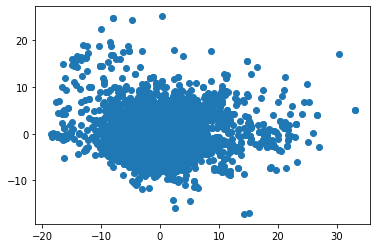

In [86]:
plt.scatter(pca_res[:, 0], pca_res[:, 1])

In [87]:
import seaborn as sns

In [88]:
final

,smiles_r,Data,PCA1,PCA2
0,Cc1ncc(COP(=O)([O-])[O-])c(C=O)c1[O-],Drugspace,-3.509803,9.009919
1,C[S+](CCC([NH3+])C(=O)[O-])C[C@H]1O[C@@H](n2cn...,Drugspace,2.196006,4.446299
2,CC(=O)C(=O)[O-],Drugspace,-10.530487,7.574960
3,[NH3+]C(Cc1ccccc1)C(=O)[O-],Drugspace,-6.805871,0.436340
4,O=C([O-])CCCC[C@@H]1SC[C@@H]2[NH+]=C(O)N[C@@H]21,Drugspace,-4.147853,1.215625
...,...,...,...,...
3953,Cn1c(=O)c2[n-]cnc2n(C)c1=O,Animal Data,-5.118189,4.350412
3954,C[C@@H](O)C1C(=O)[NH+]2C(C(=O)[O-])=C(S[C@H]3C...,Animal Data,8.320010,3.515664
3955,[NH3+]C1[C@H]2CN(c3nc4c(cc3F)c(=O)c(C(=O)[O-])...,Animal Data,2.952942,5.125270
3956,CCCCCCCCCCCCCCCCCCCC(=O)[O-],Animal Data,-3.712598,-7.669171


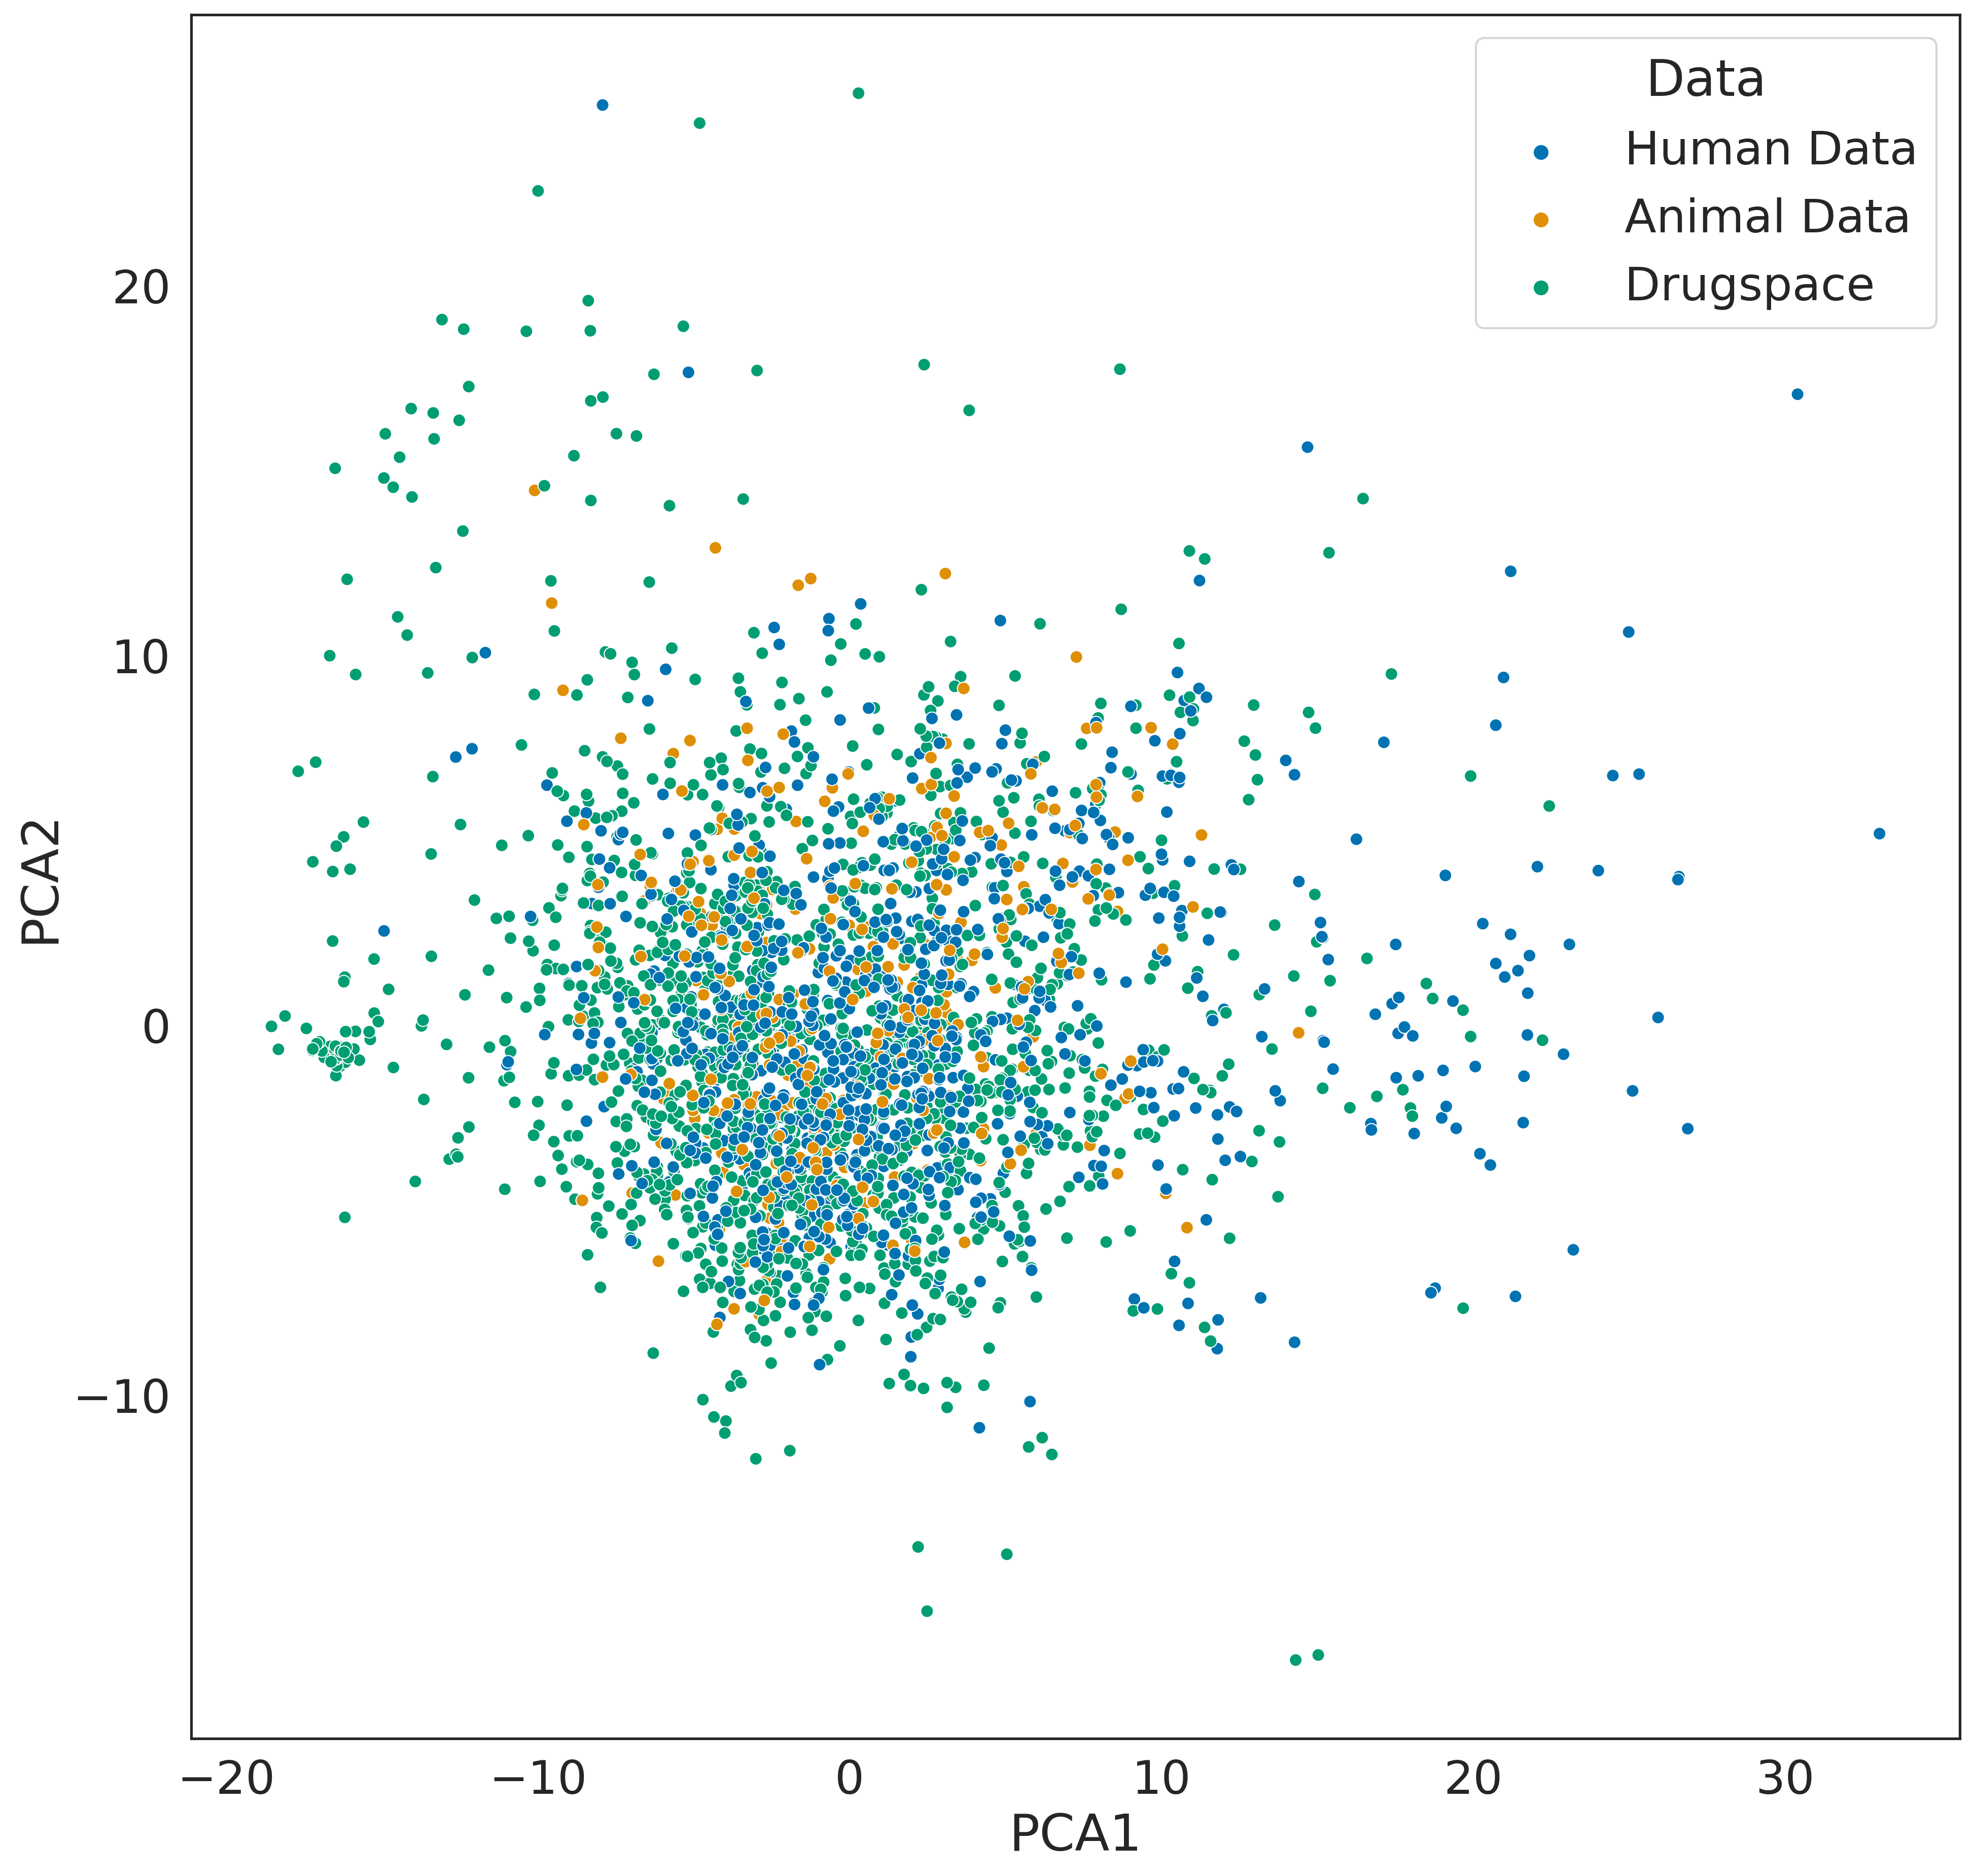

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and context for the plot
with sns.axes_style("white"), sns.plotting_context("notebook", font_scale=2):
    plt.figure(figsize=(15, 15), dpi=300)
    sns.scatterplot(
        data=final,
        x="PCA1",
        y="PCA2",
        hue="Data",
        hue_order=['Human Data', 'Animal Data', 'Drugspace'],
        palette="colorblind"  # Use colorblind-friendly palette
    )
    plt.show()

    

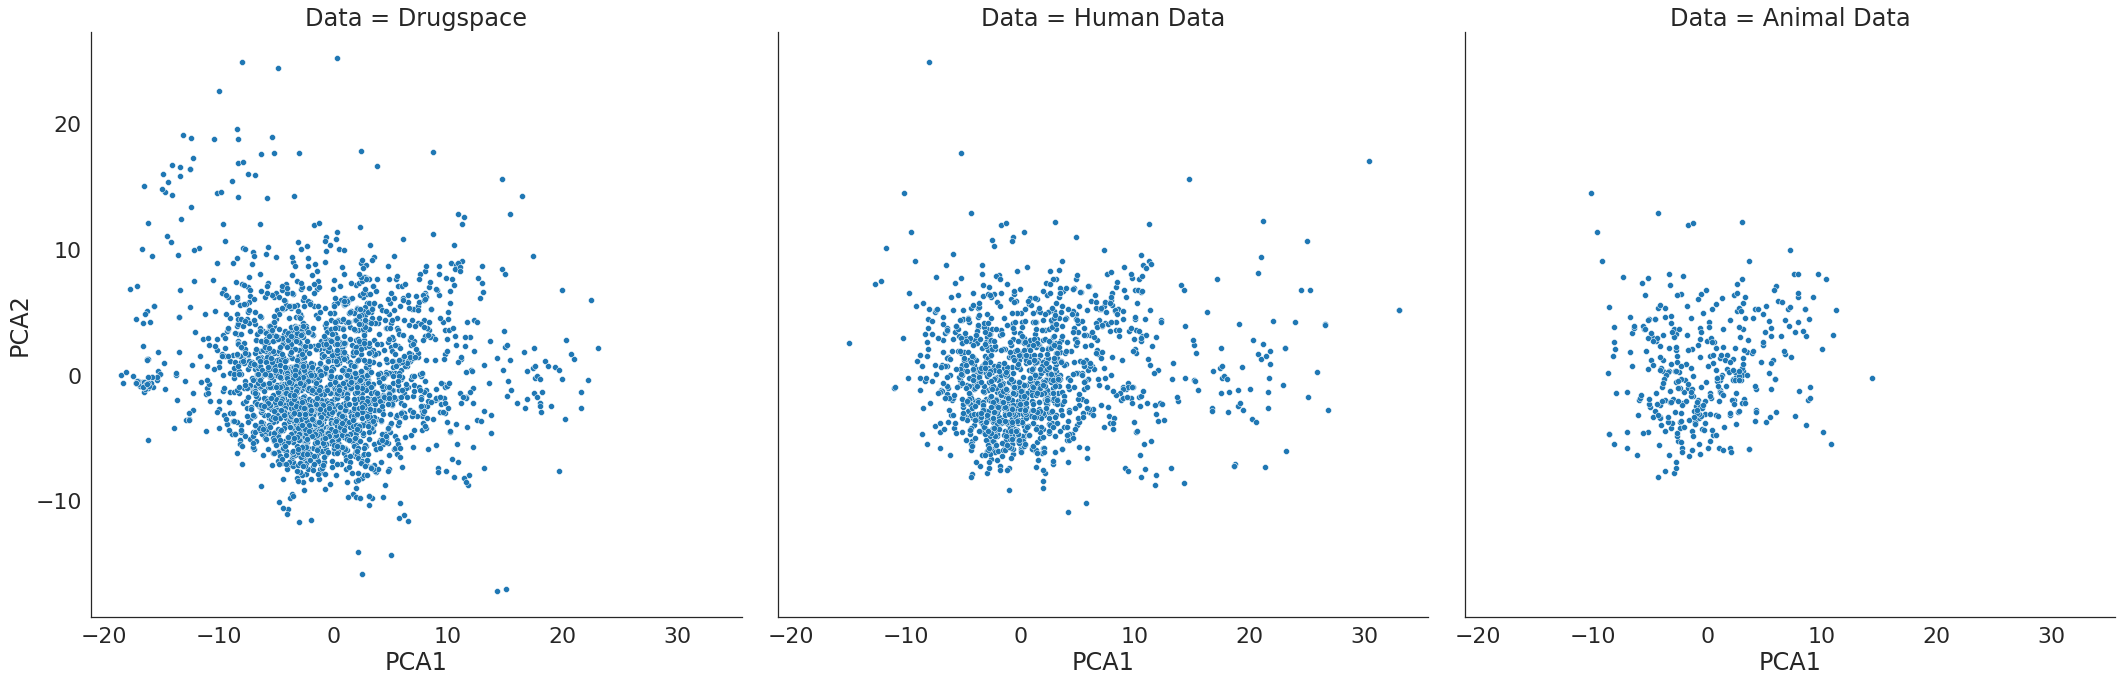

In [90]:
with sns.axes_style("white"), sns.plotting_context("notebook", font_scale=2):

    g = sns.FacetGrid(
        data=final,
        col="Data", height=10, aspect=1
    )

    g.map(sns.scatterplot, "PCA1", "PCA2")
    plt.show()